# Compare Scenarios

In [1]:
import io
from contextlib import redirect_stdout
import matplotlib.pyplot as plt
import os
import pandas as pd
import posixpath
from pprint import pprint

from postreise.plot.multi.plot_bar import plot_bar, plot_hbar
from postreise.plot.multi.plot_helpers import make_gen_cap_custom_data
from postreise.plot.multi.plot_pie import plot_pie
from postreise.plot.multi.plot_shortfall import plot_shortfall

We first set the time interval, the time zone and frequency 

In [2]:
time = ("2016-01-01-00", "2016-12-31-23", "utc", "H")

## Vertical Bar Plots
### Most basic plot

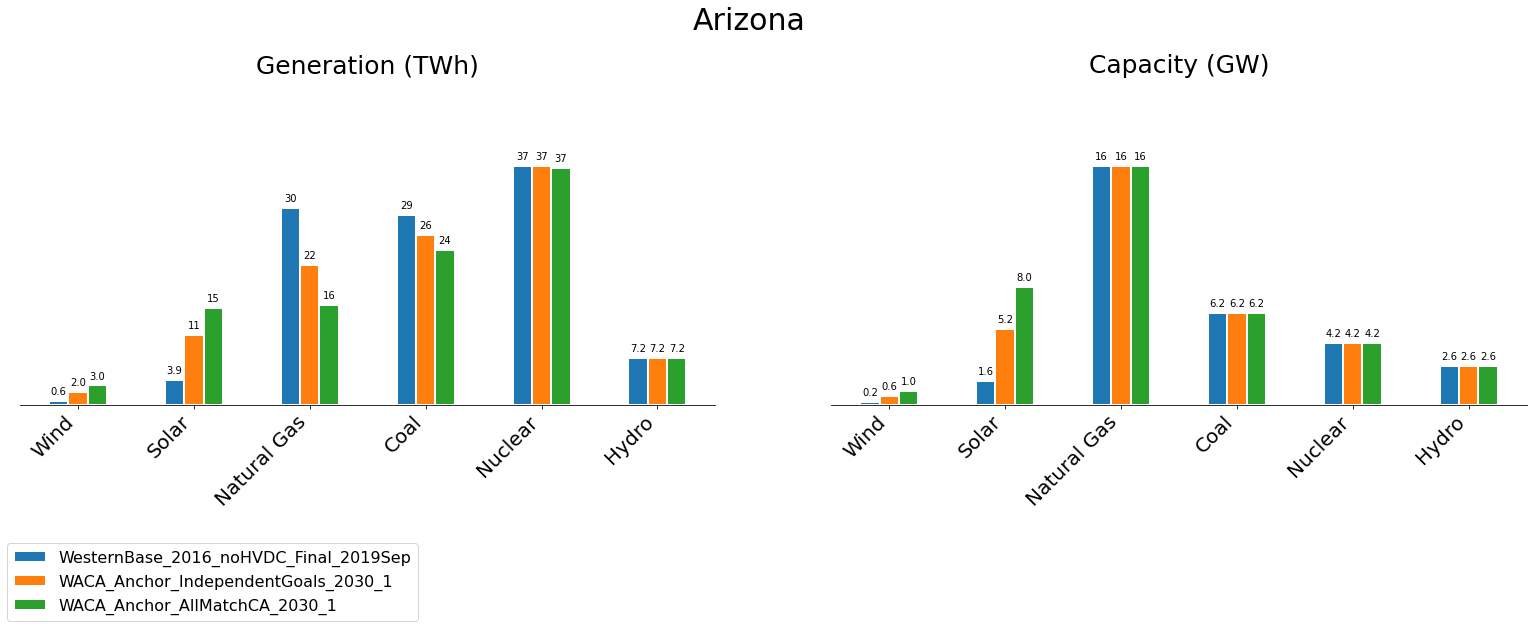

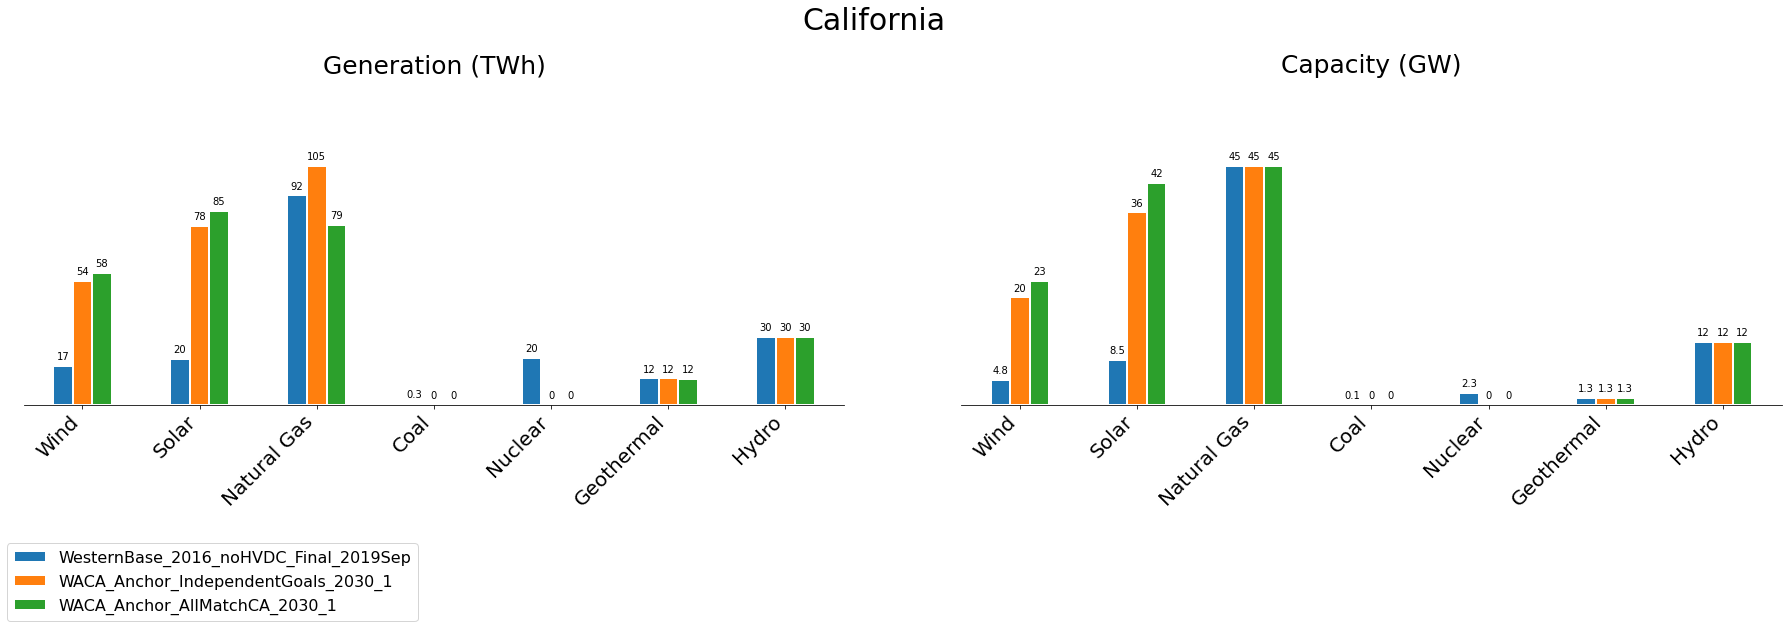

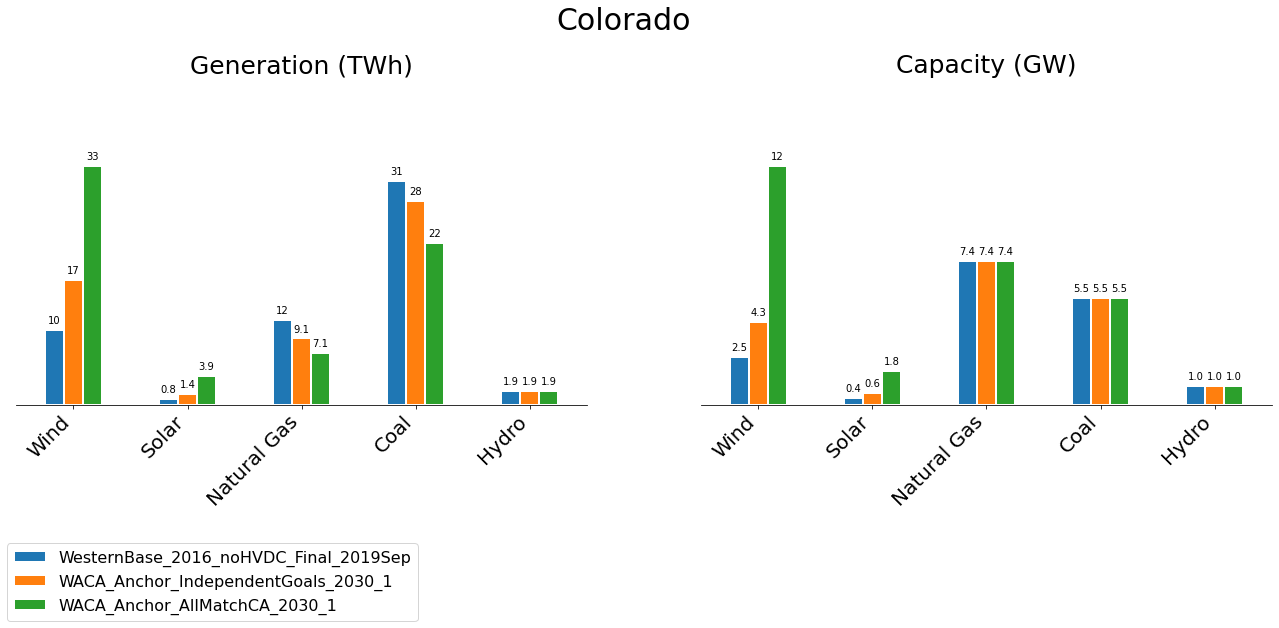

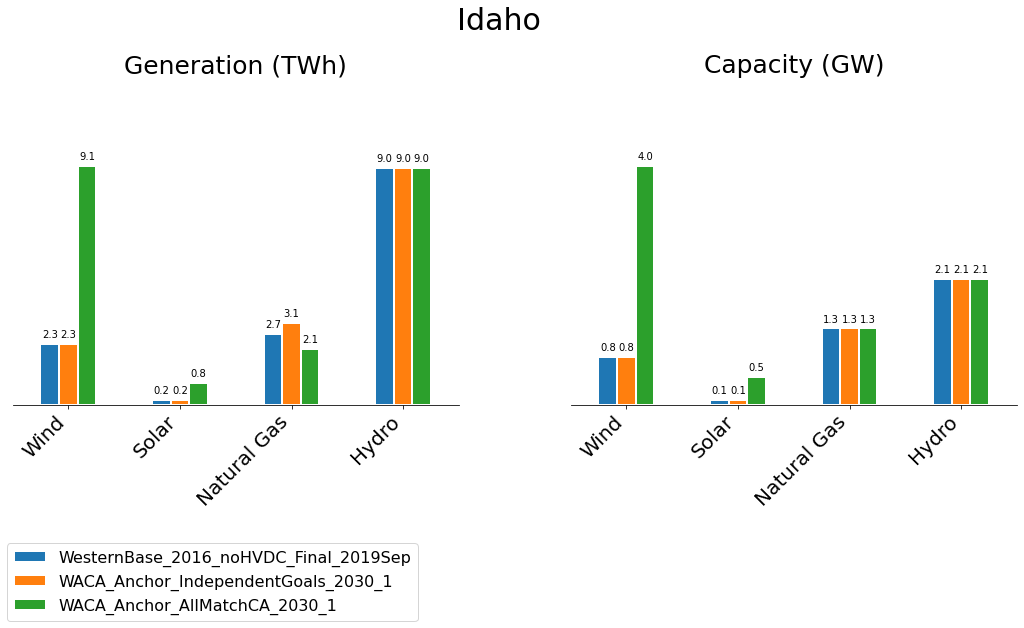

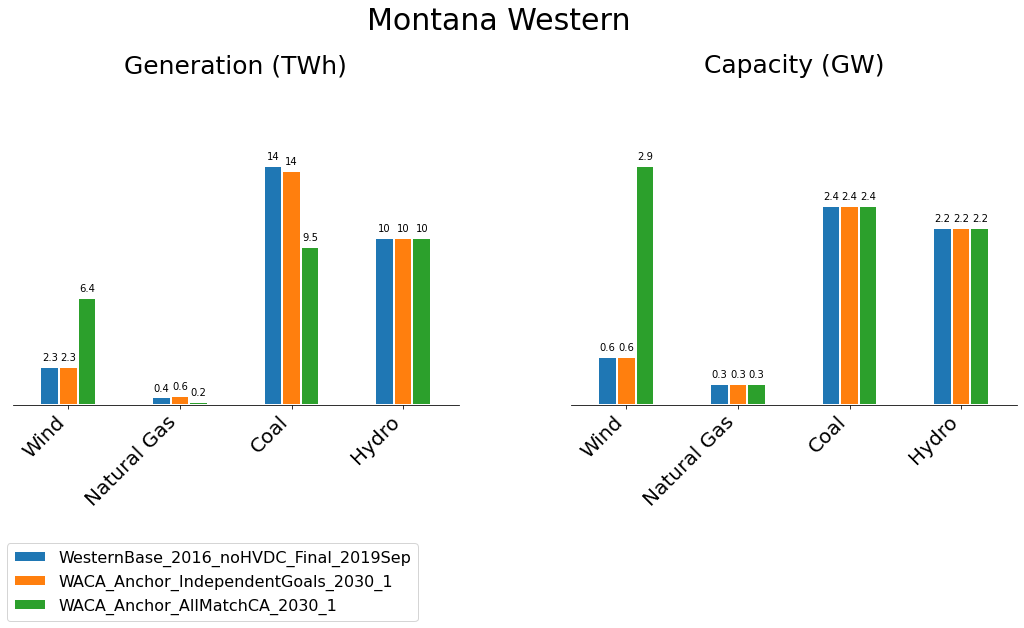

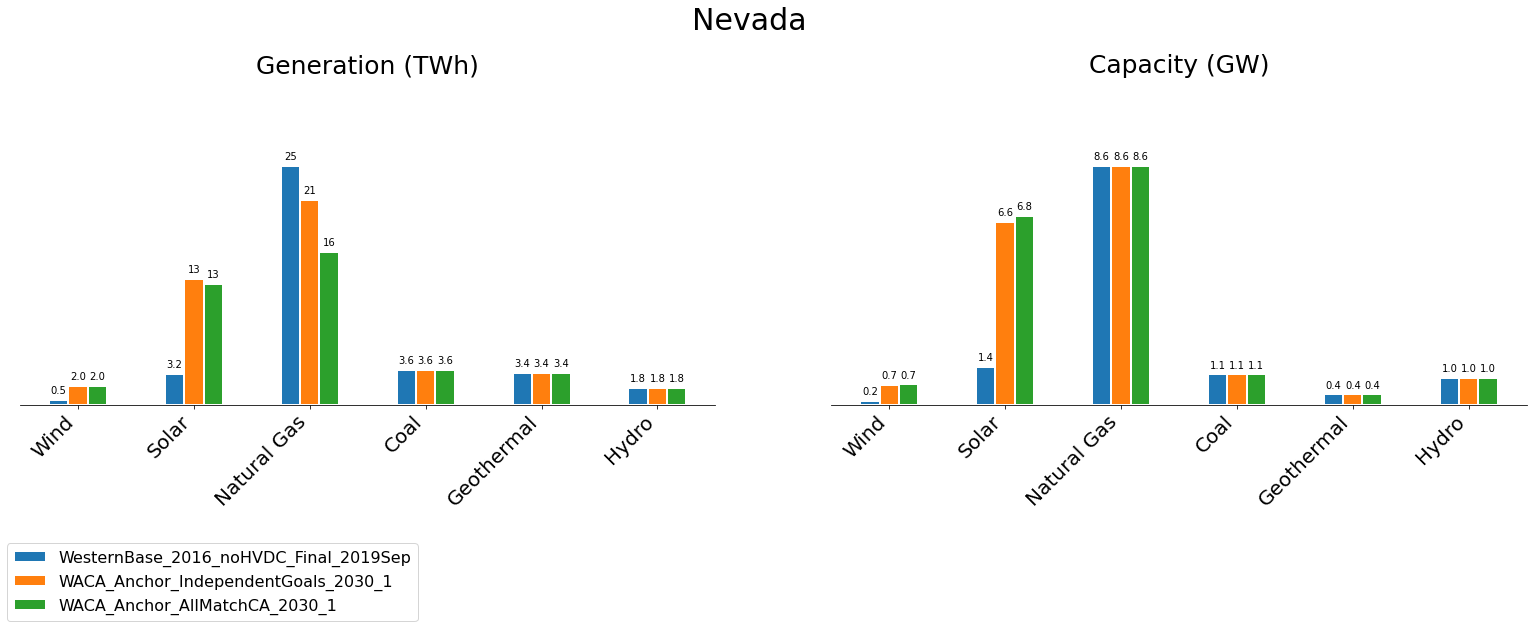

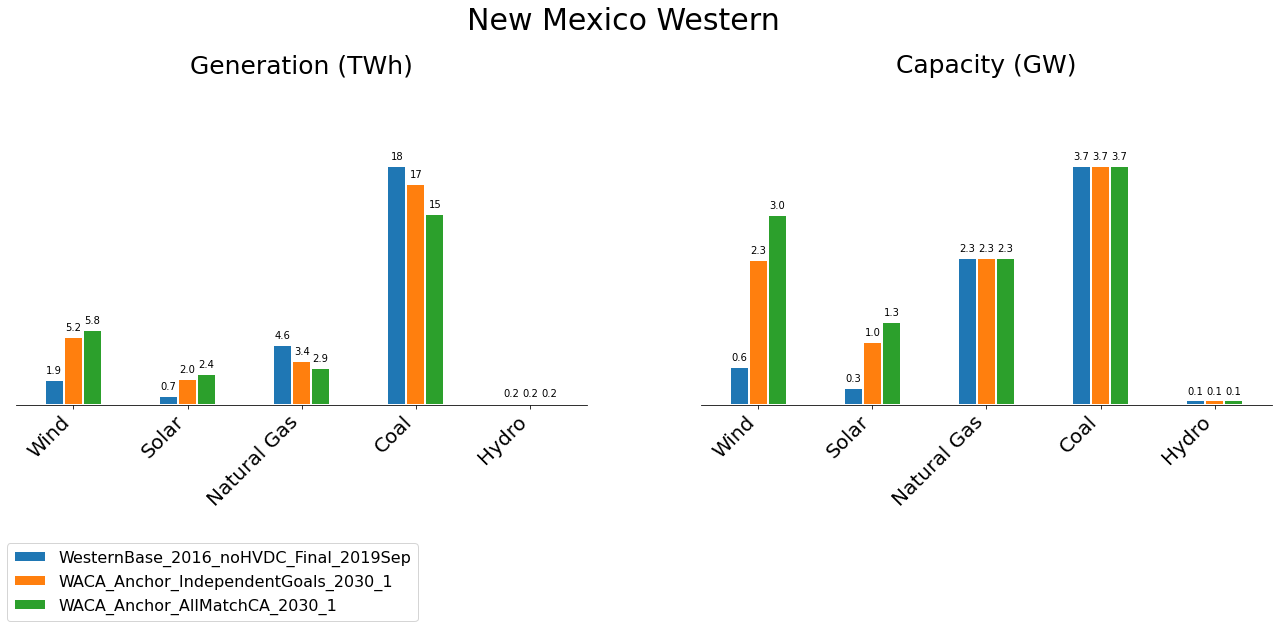

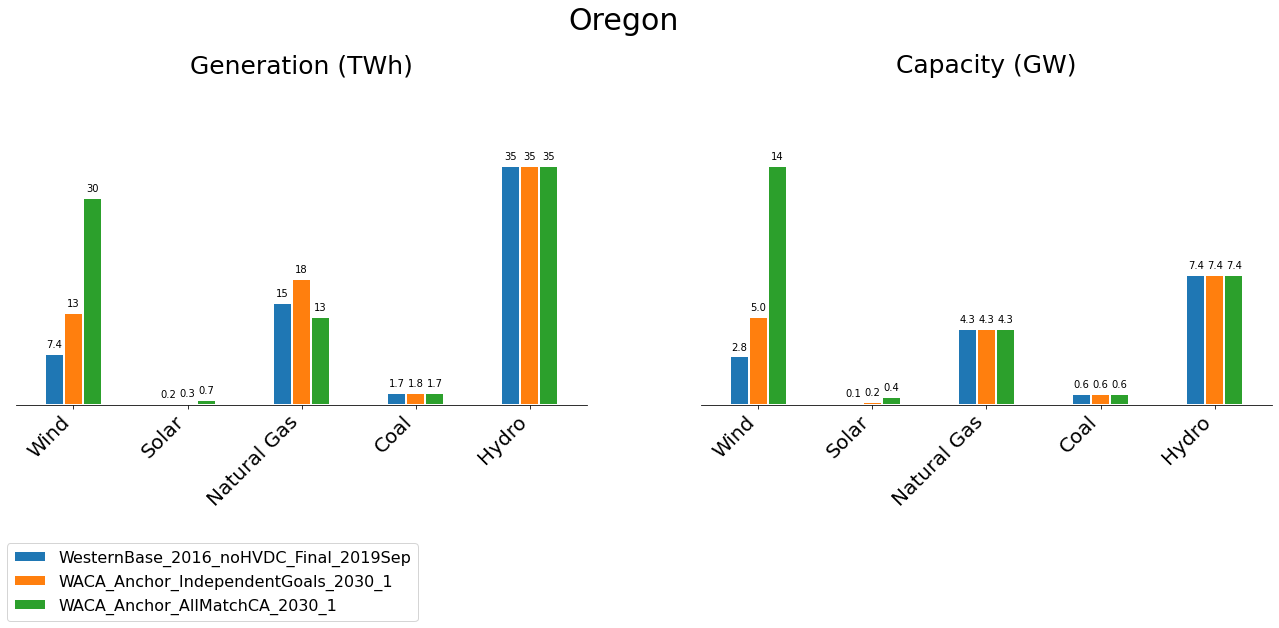

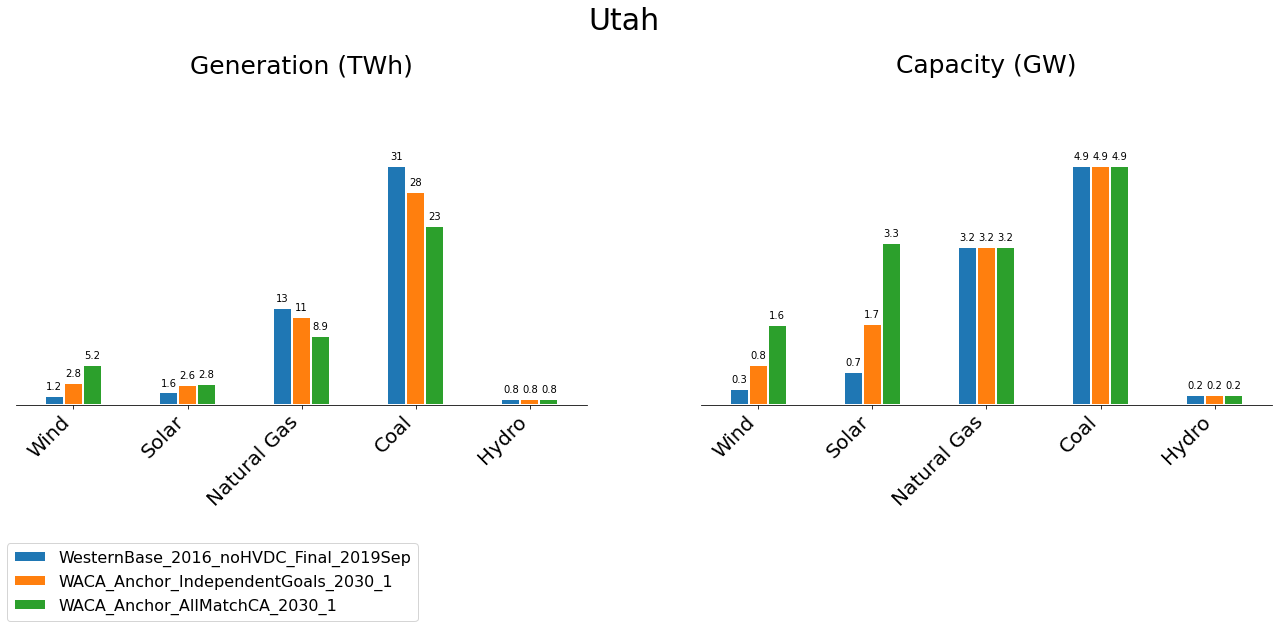

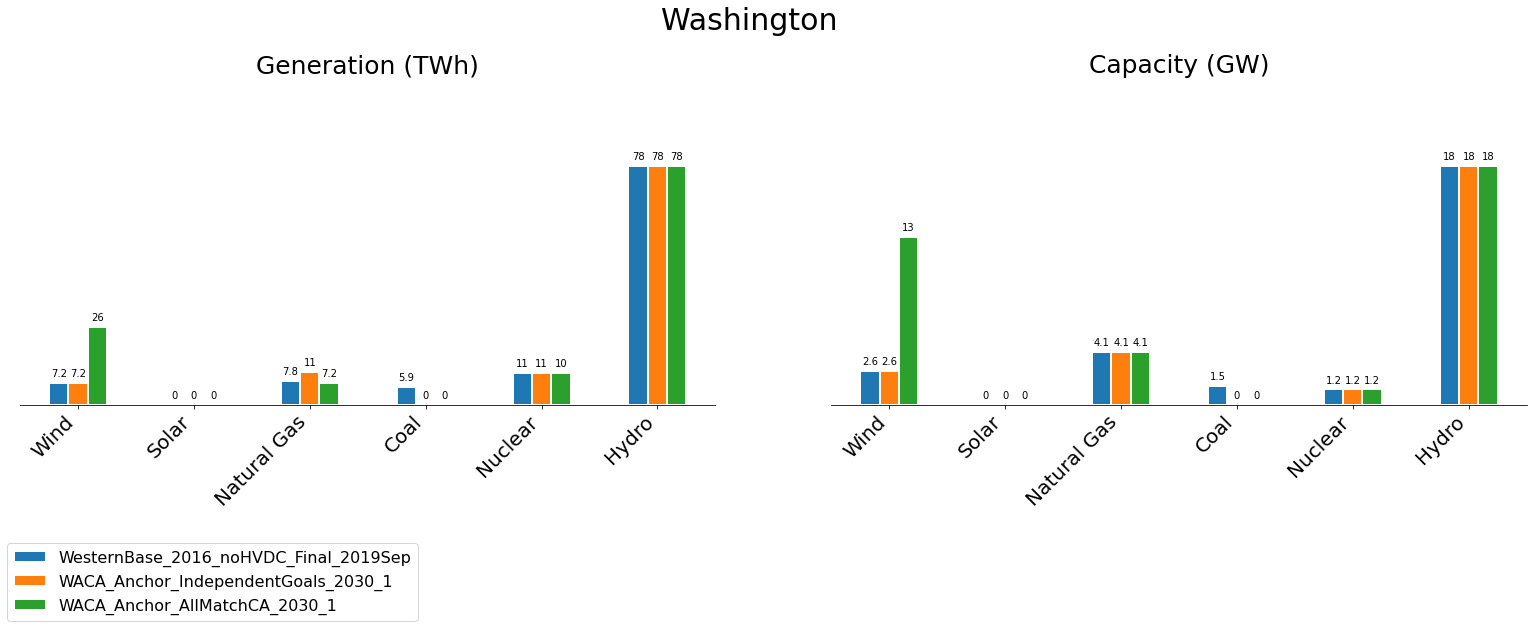

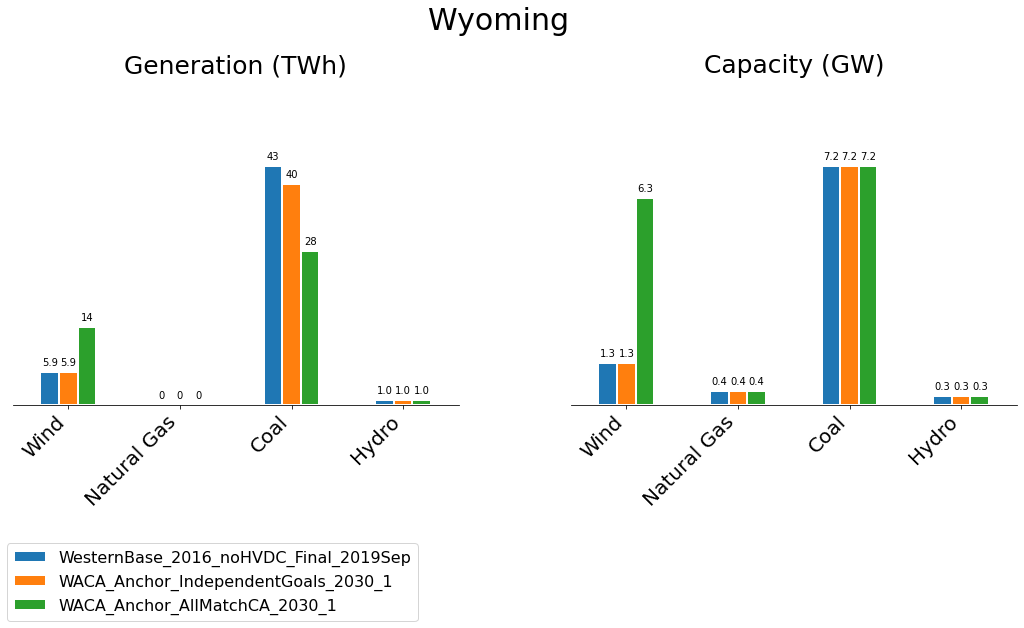

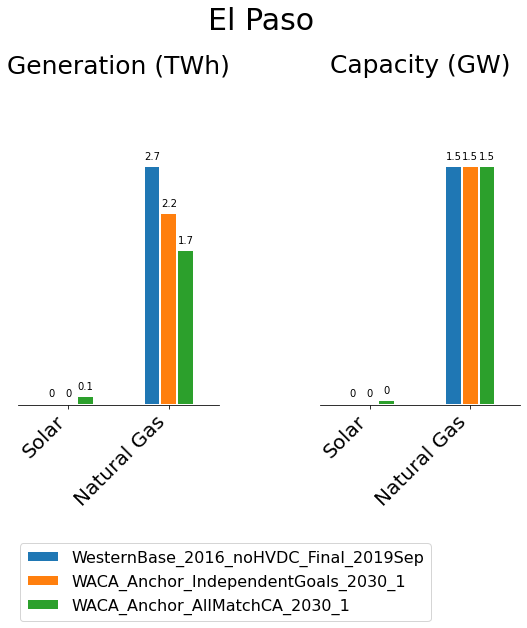

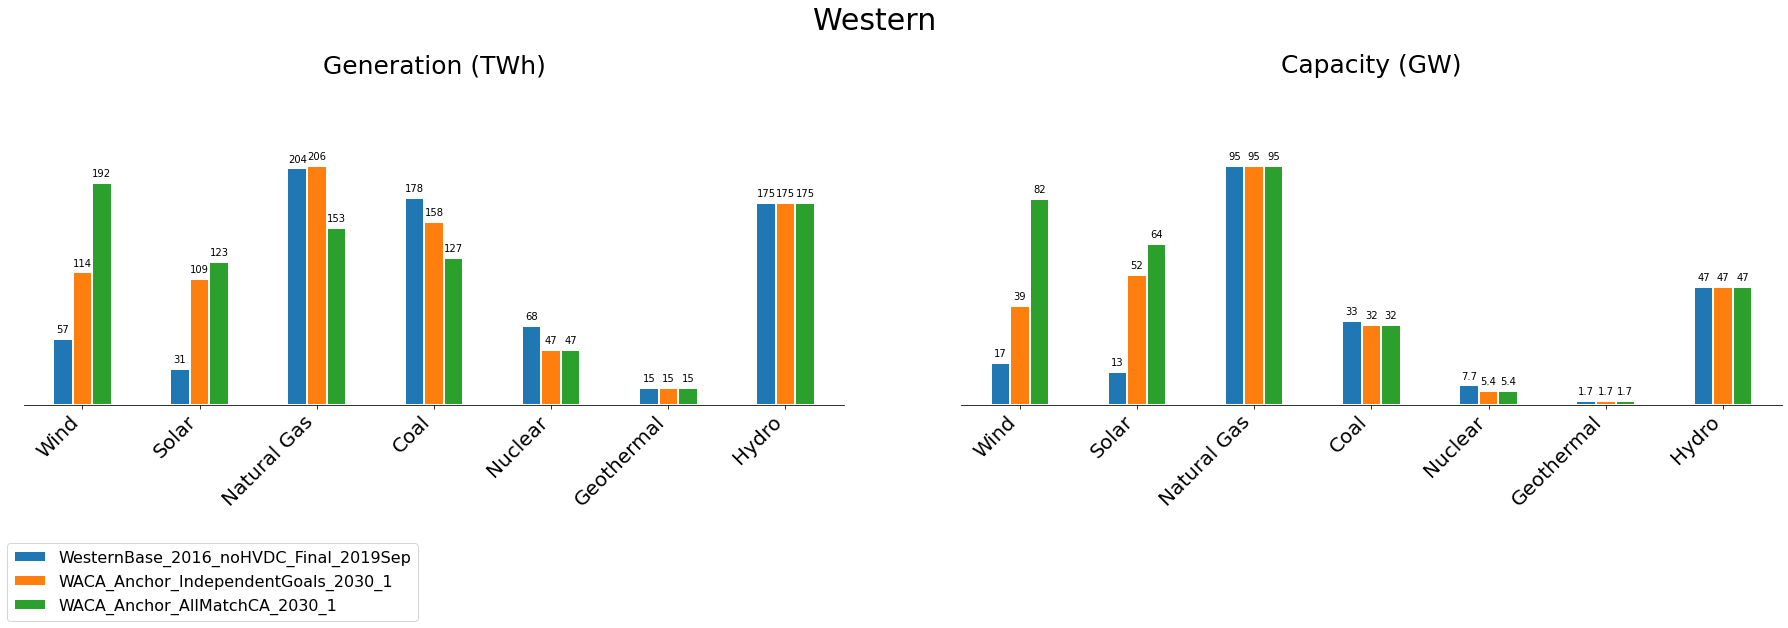

In [3]:
f = io.StringIO()
with redirect_stdout(f):
    plot_bar('Western', time, ['87', '91', '89'])
plt.show()

### Add scenario names and select specific fuel type

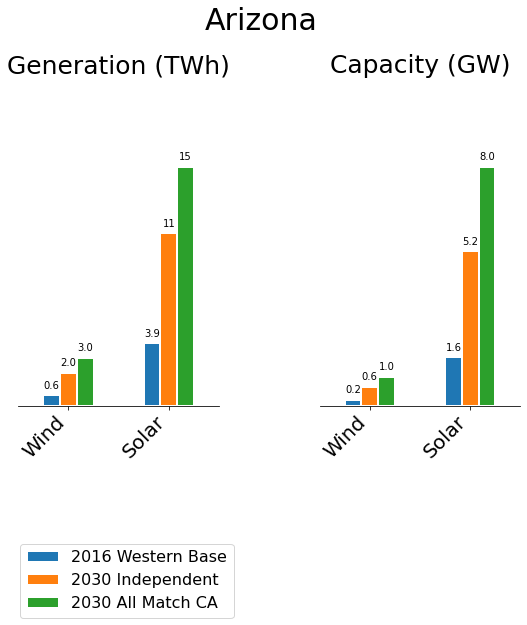

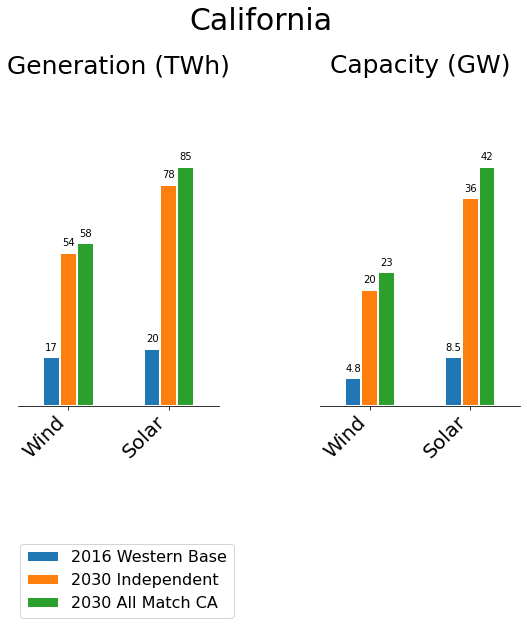

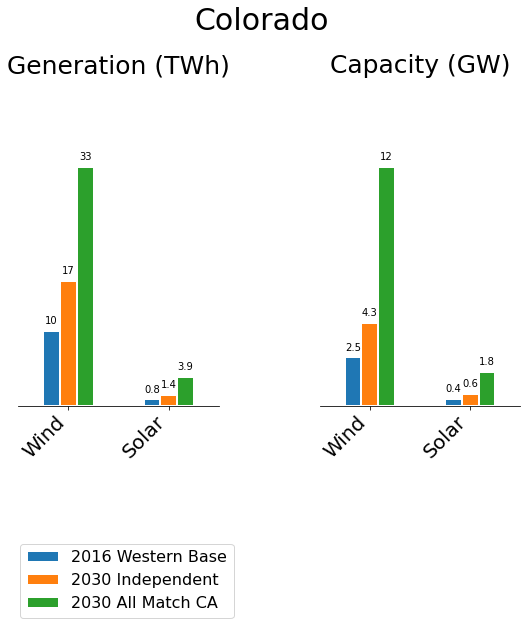

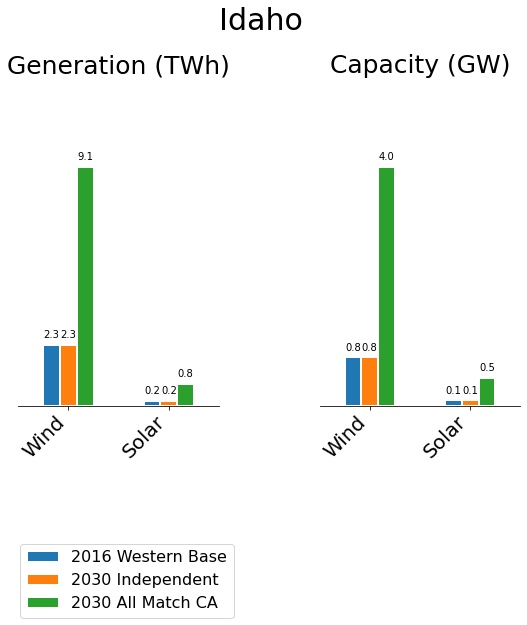

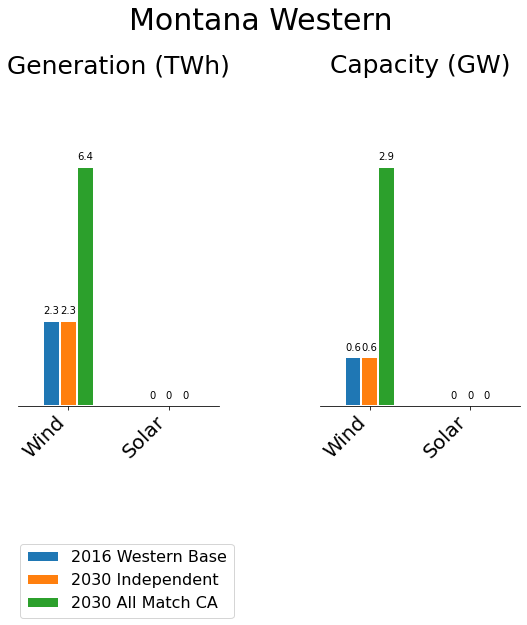

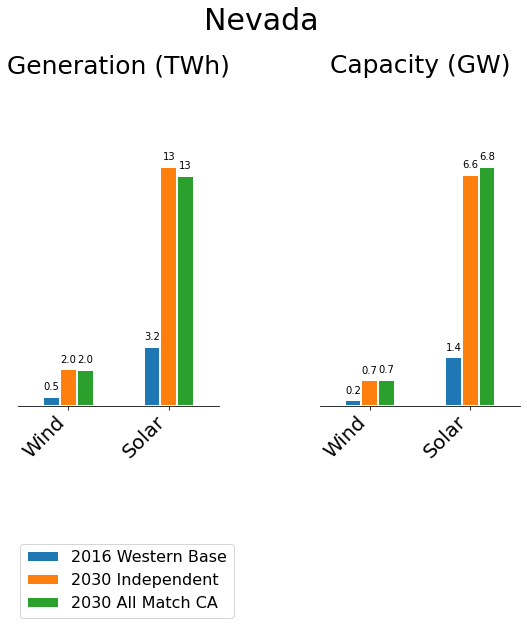

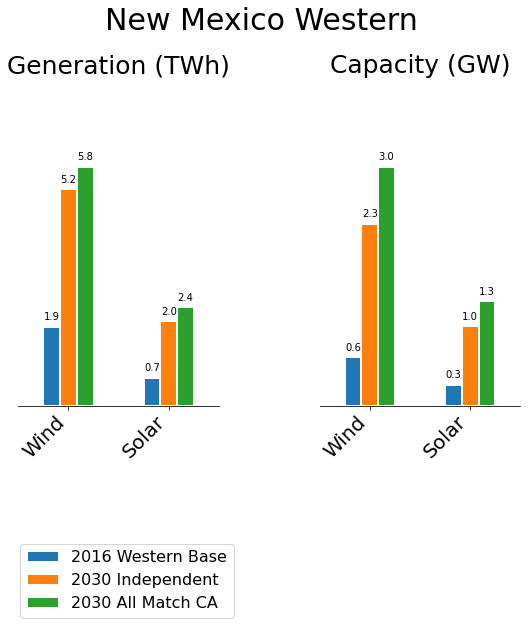

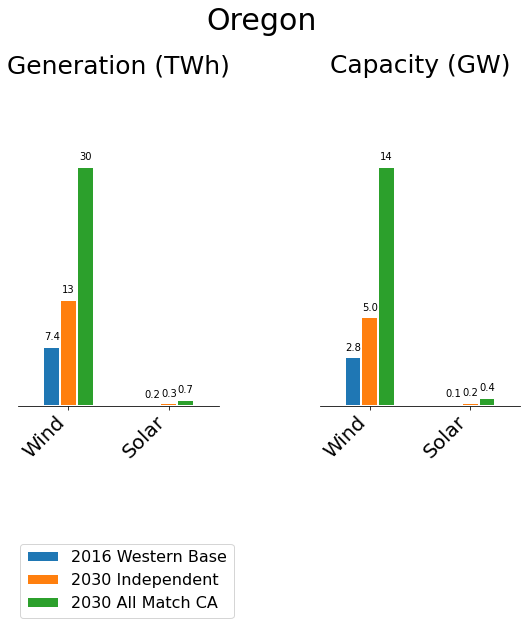

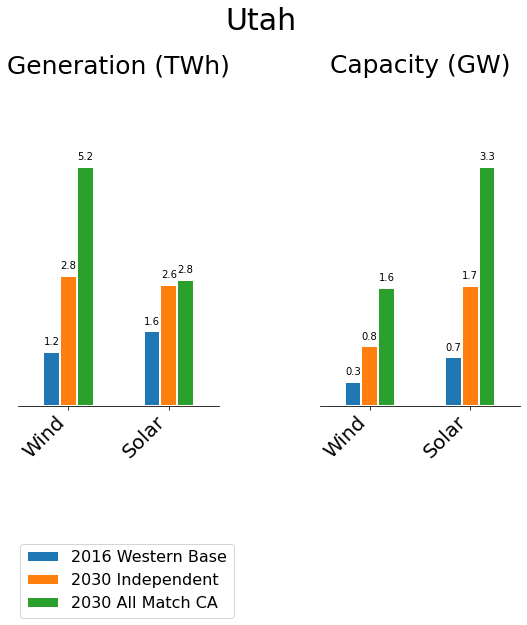

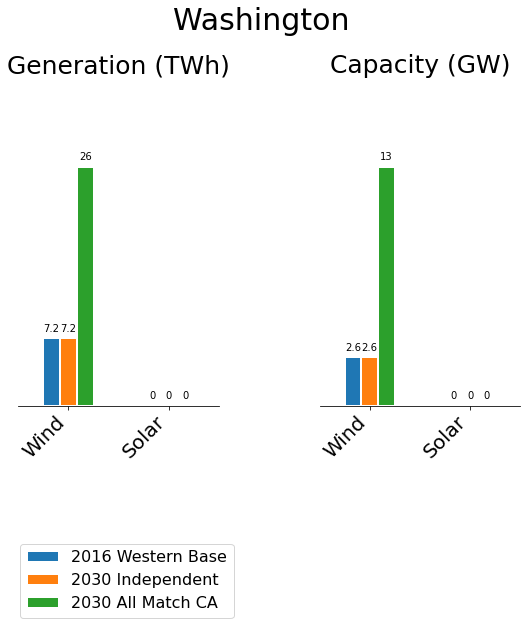

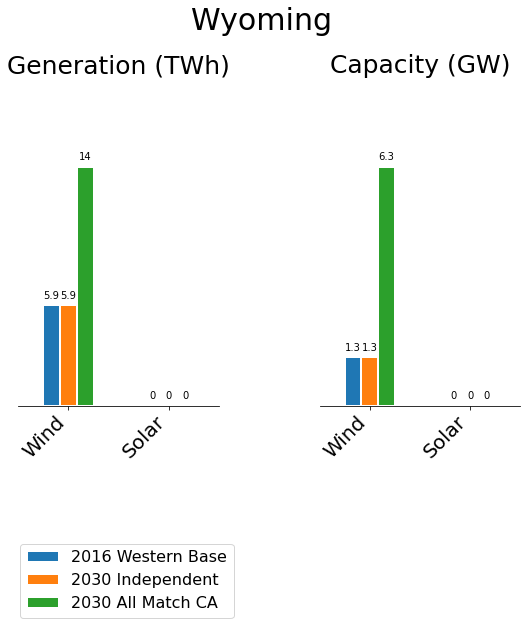

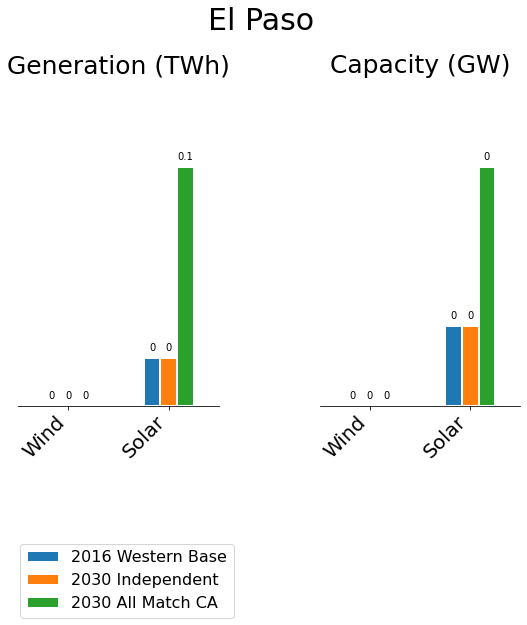

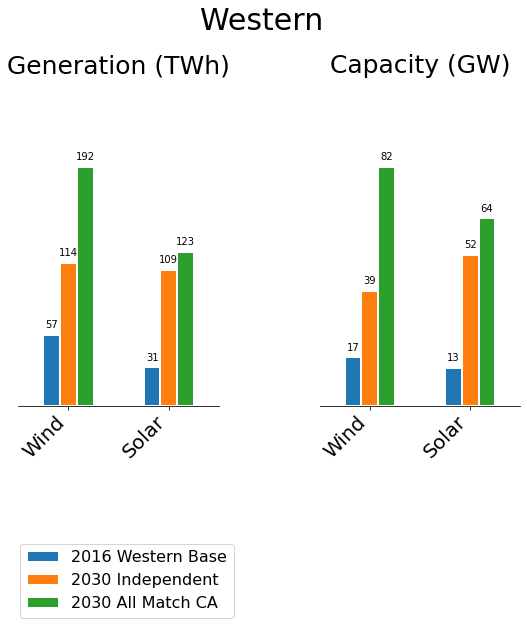

In [4]:
# You can add scenario names and selecting specific resources to show
f = io.StringIO()
with redirect_stdout(f):
    plot_bar('Western', 
             time,
             ['87', '91', '89'], ['2016 Western Base', '2030 Independent', '2030 All Match CA'],
             resource_types=['wind', 'solar'])
plt.show()

### Add Custom Data
You can plot custom data! Let's create some. Here we'll compare historical data for western vs. our simulation data and NREL's simulation data.

In [5]:
data_dir = posixpath.abspath(posixpath.join(os.getcwd(), '../../data'))
western_hist_gen = pd.read_csv(posixpath.join(data_dir, '2016_Historical_Western_Generation_TWh.csv'),
                                              index_col='Resource Type')
western_hist_cap = pd.read_csv(posixpath.join(data_dir, '2016_Historical_Western_Capacity_GW.csv'),
                                              index_col='Resource Type')
nrel_low_demand_gen = pd.read_csv(posixpath.join(data_dir, '2016_NREL_Low_Demand_Western_Generation_TWh.csv'),
                                                 index_col='Resource Type')
nrel_mid_case_gen = pd.read_csv(posixpath.join(data_dir, '2016_NREL_Mid_Case_Western_Generation_TWh.csv'),
                                               index_col='Resource Type')

print('Done')

Done


We print below some of the data hust read.

In [6]:
pprint(nrel_mid_case_gen)

                    Arizona  California  Colorado  El Paso  Idaho  Nevada  \
Resource Type                                                               
coal                  39.83        0.00     28.96      0.0   0.00    5.46   
geothermal             0.00       15.61      0.00      0.0   0.09    4.20   
hydro                  6.75       31.63      1.68      0.0   9.98    2.18   
ng                    25.32      125.63     16.62      0.0   2.13    9.65   
nuclear               31.12       18.18      0.00      0.0   0.00    0.00   
other inc. biomass     0.22        4.80      0.09      0.0   0.16    0.01   
solar                  5.45       25.87      1.04      0.0   0.14    3.28   
wind                   0.71       15.03      8.38      0.0   2.53    0.40   

                    Oregon   Utah  Washington  Western  Montana Western  \
Resource Type                                                             
coal                  0.00  33.26        4.73   164.56             5.59   
geot

Next, we'll format the data for our plot Here we're using a helper function called `make_gen_cap_custom_data`. This is useful ifyou want to plot both generation and capacity data -- a common use case.

In [7]:
western_hist = make_gen_cap_custom_data(
    'Western', 
    '2016 Historical Western Data',
    gen_data=western_hist_gen.to_dict(), 
    cap_data=western_hist_cap.to_dict())

nrel_low_demand = make_gen_cap_custom_data(
    'Western', 
    'NREL Low Demand Baseline',
    gen_data=nrel_low_demand_gen.to_dict(), 
    cap_data=None) # We don't have capacity data so leave it blank

nrel_mid_case = make_gen_cap_custom_data(
    'Western', 
    '2016 NREL Mid Case',
    gen_data=nrel_mid_case_gen.to_dict(), 
    cap_data=None) # We don't have capacity data so leave it blank

# Note that we put all our custom data into a dict. The names of the keys don't really matter here.
custom_data = {'historical': western_hist, 'nrel_mid': nrel_mid_case, 'nrel_low_demand': nrel_low_demand}

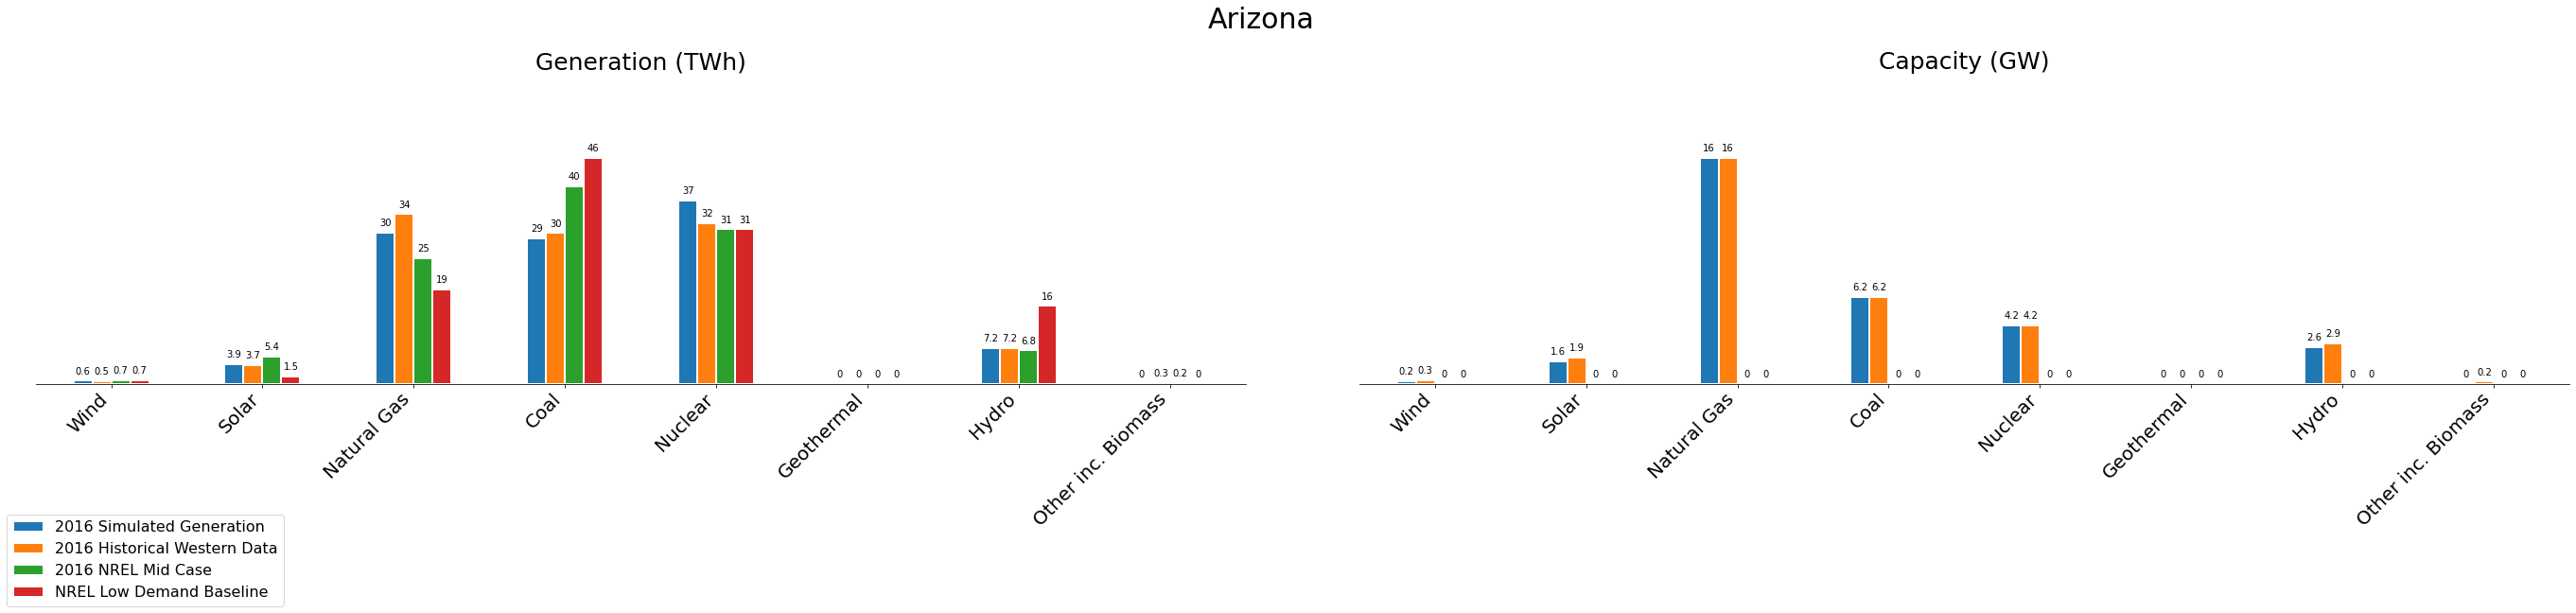

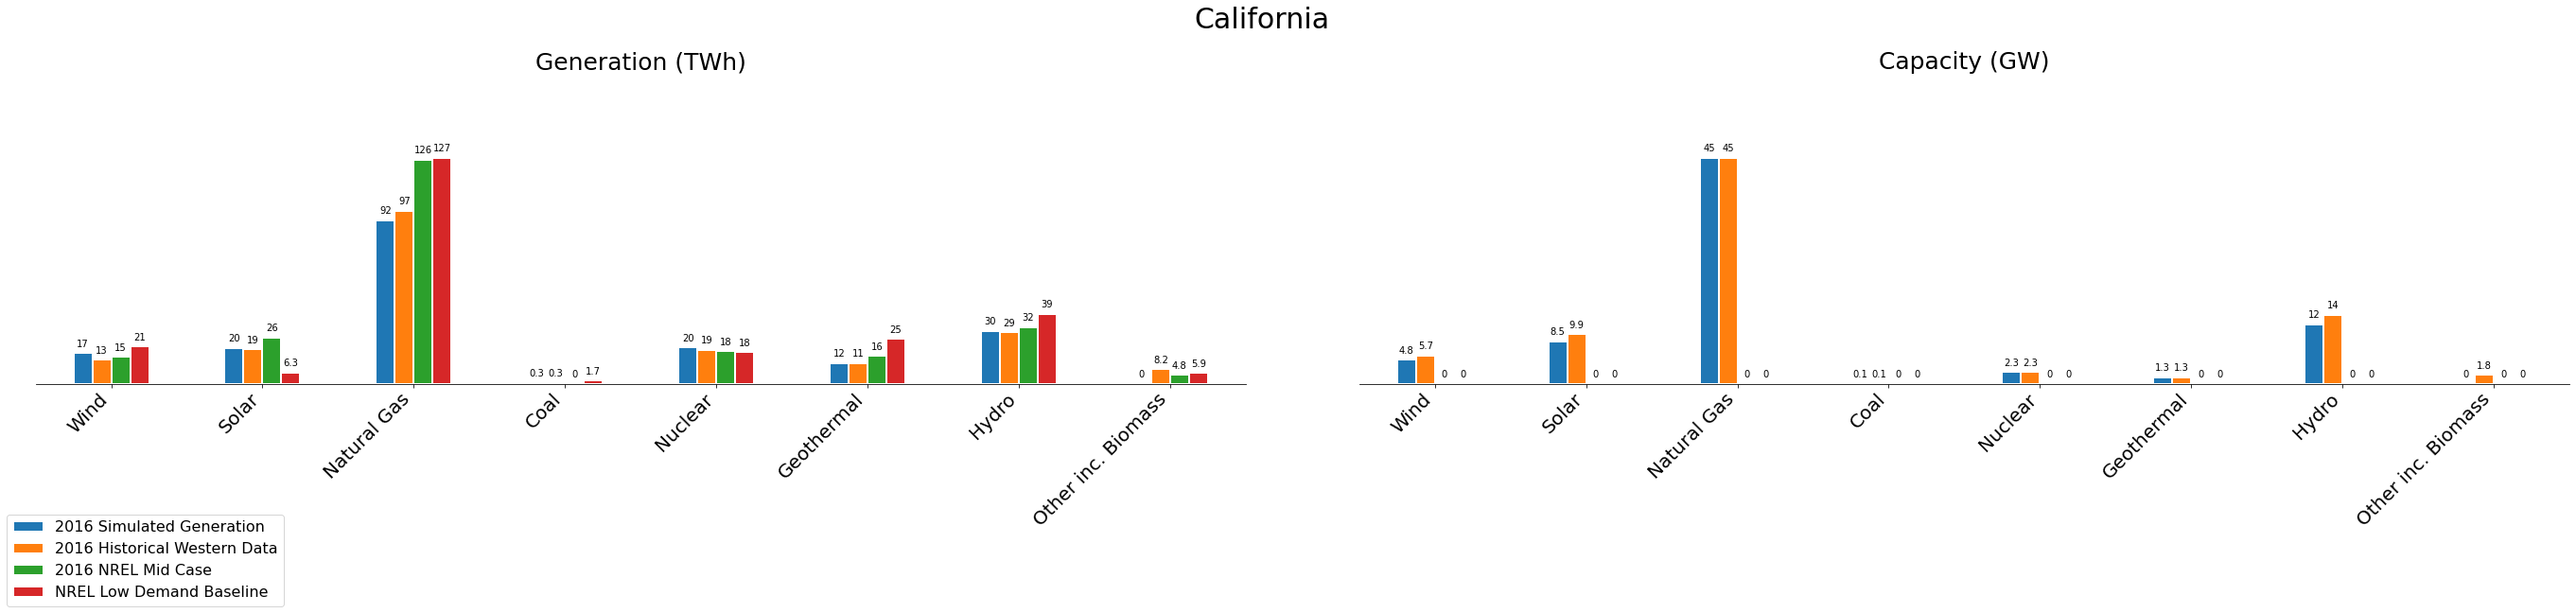

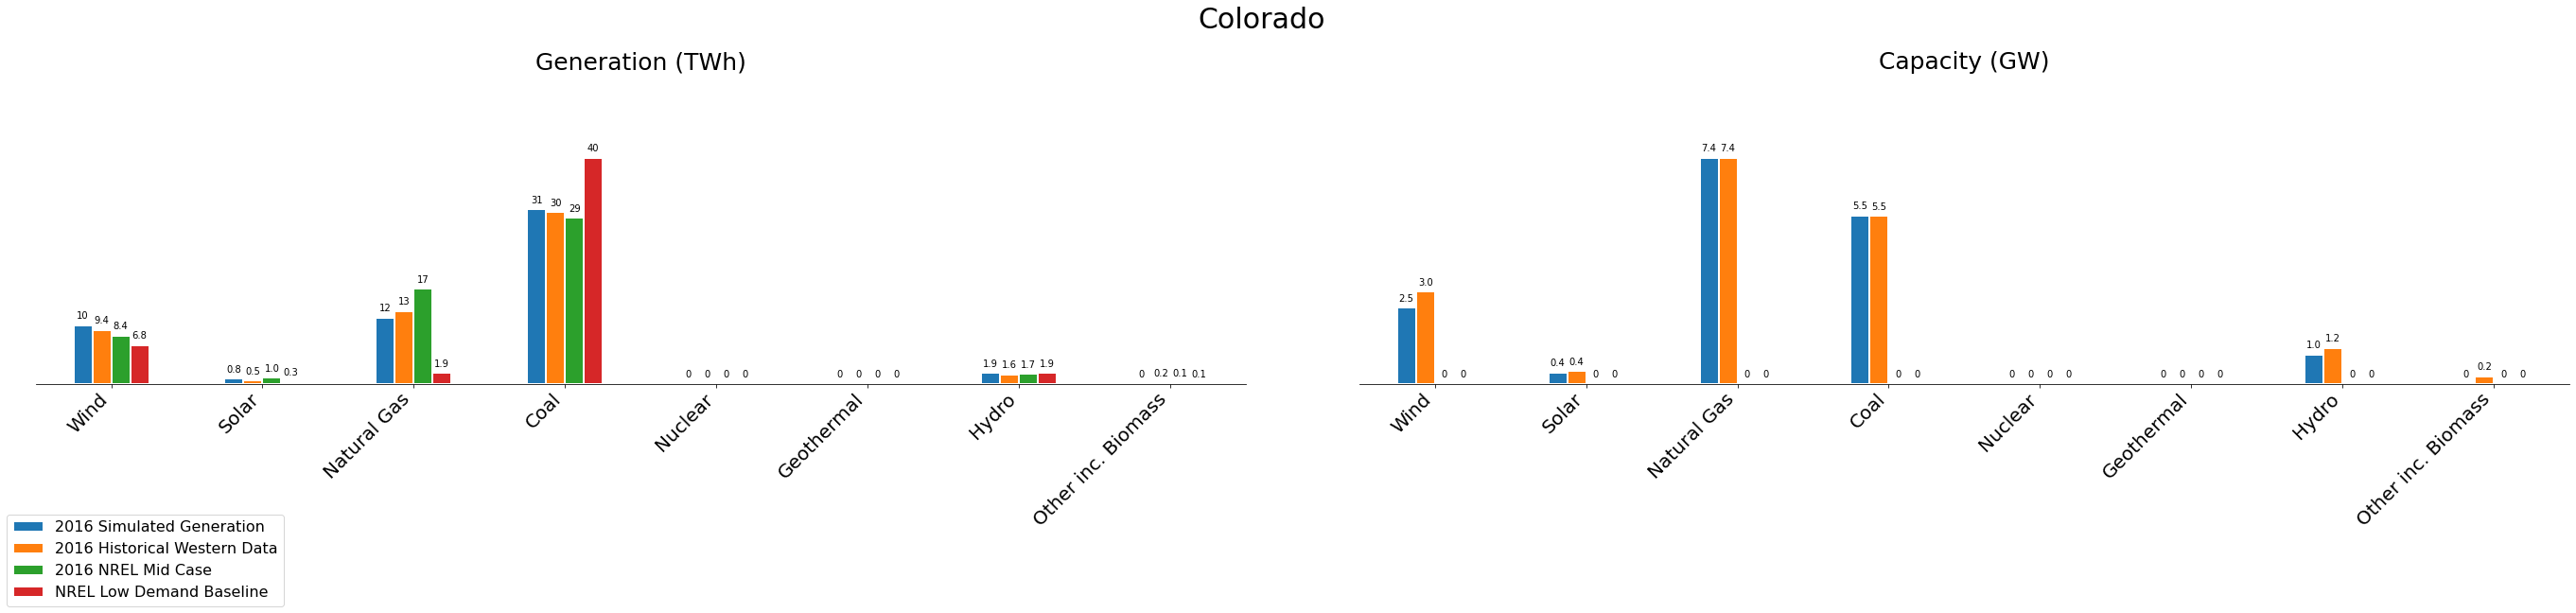

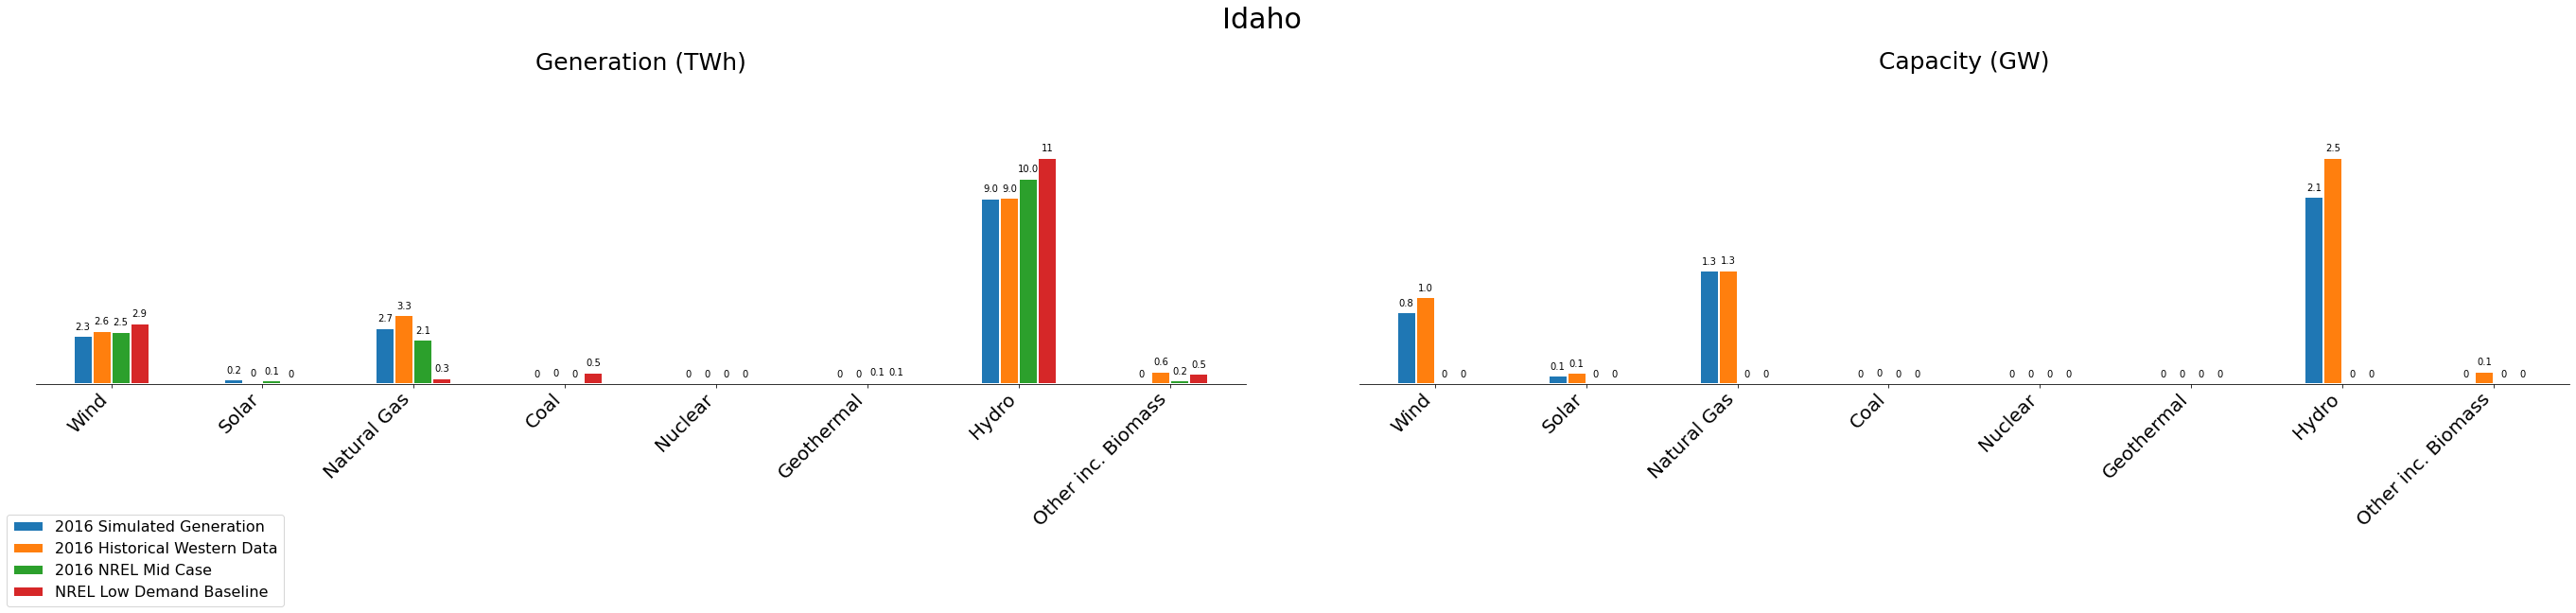

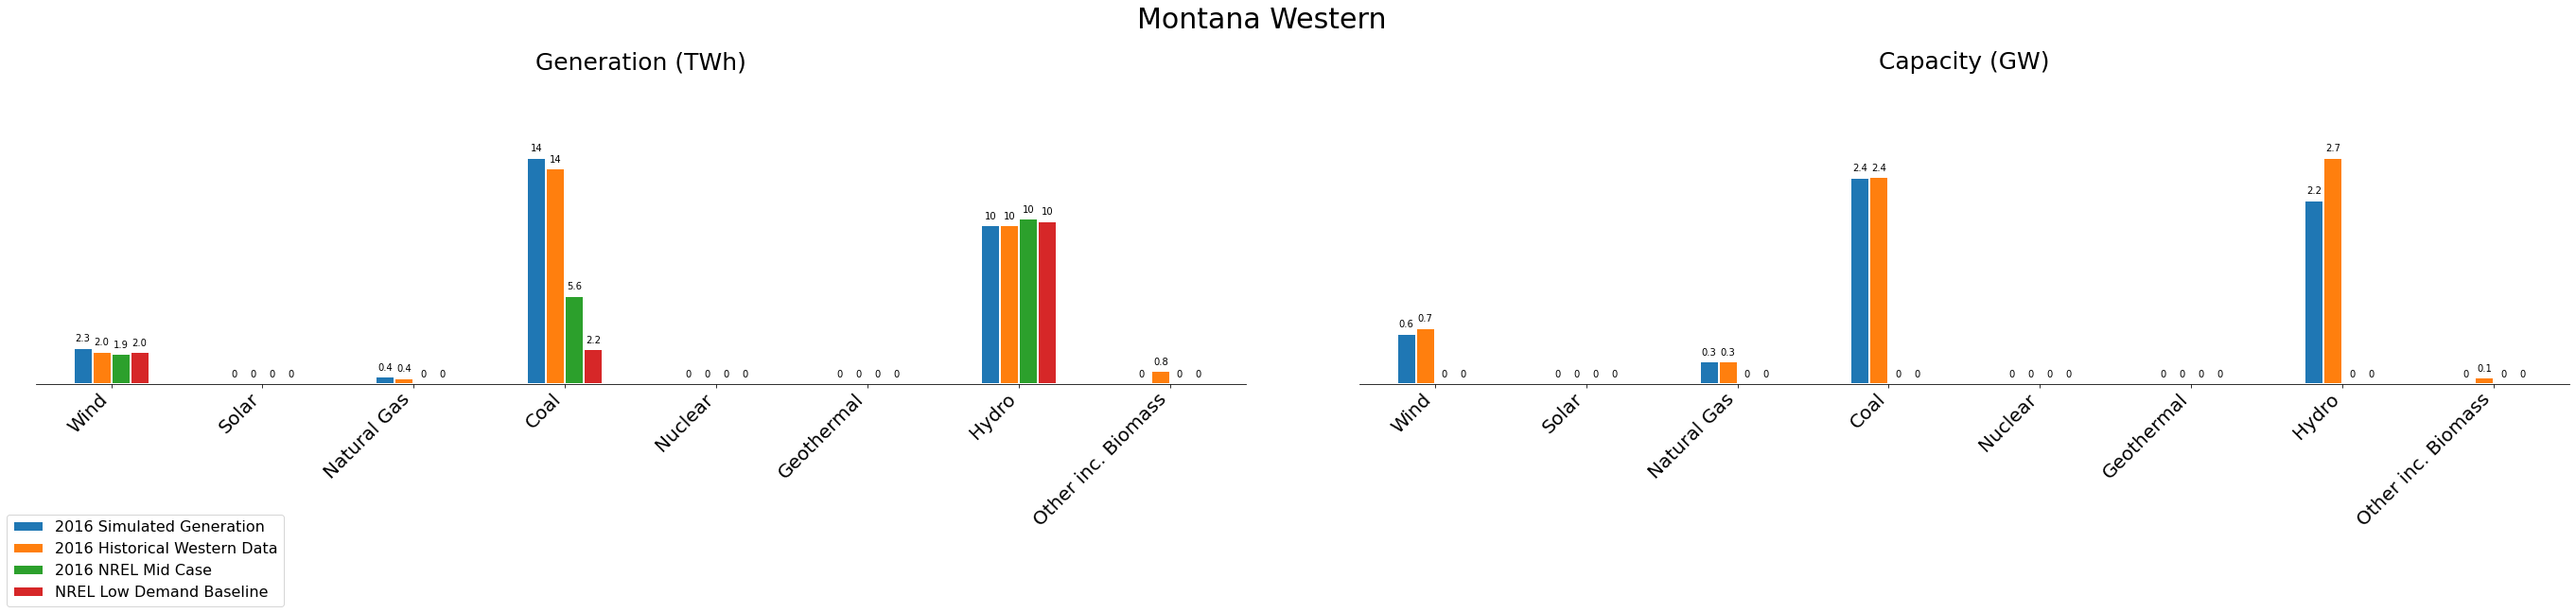

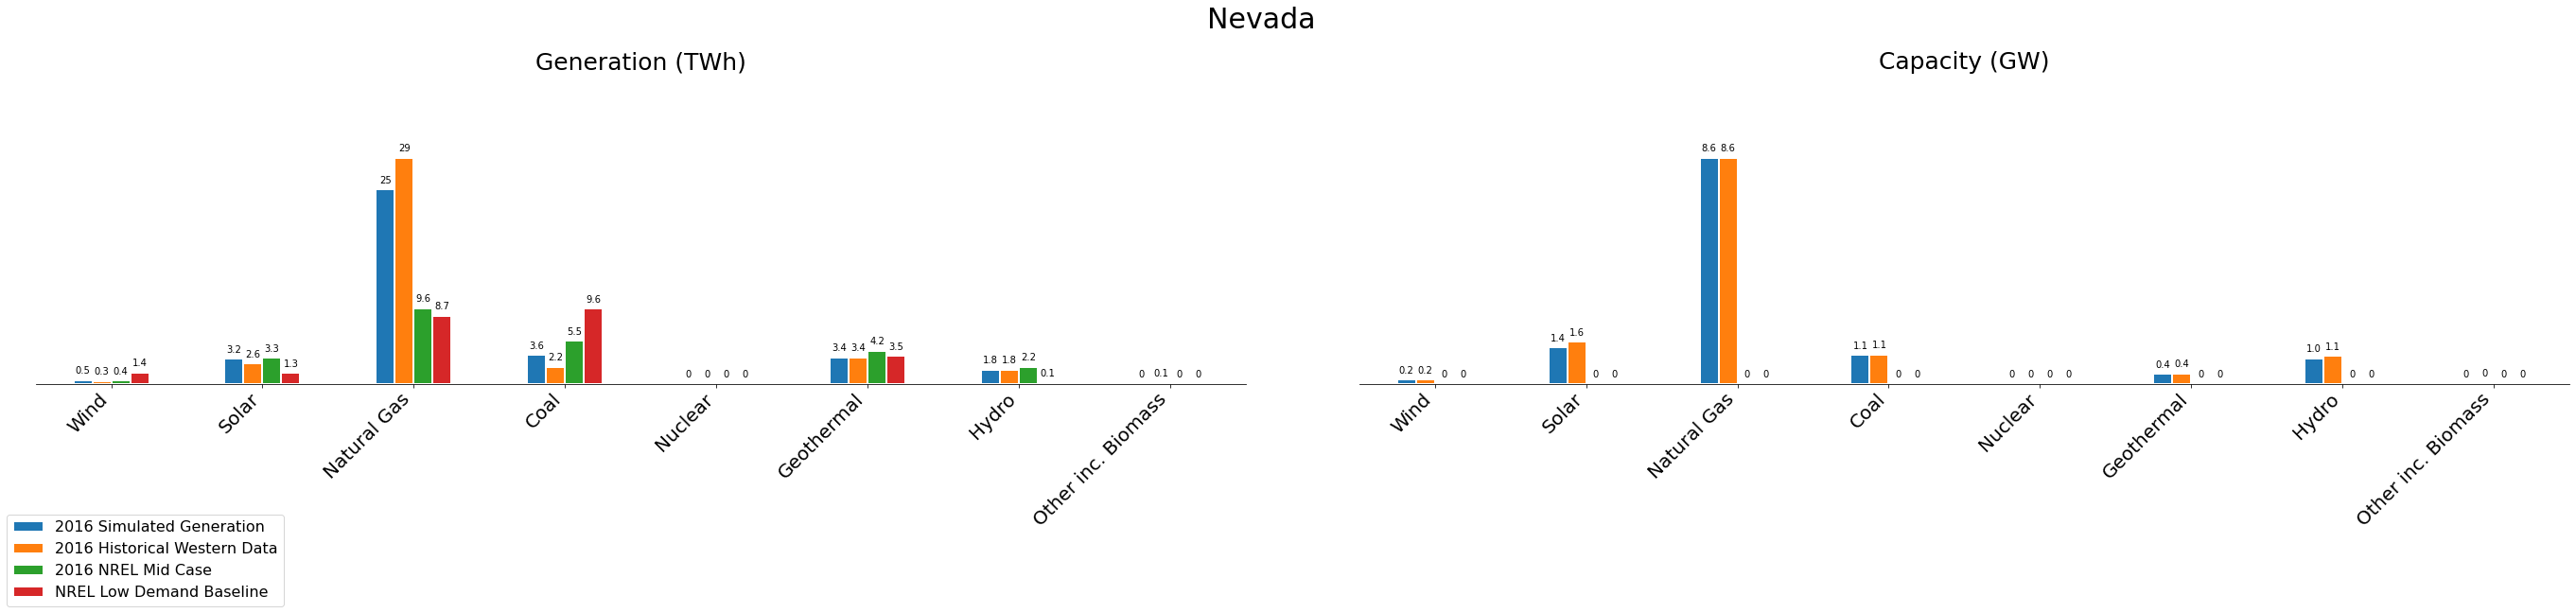

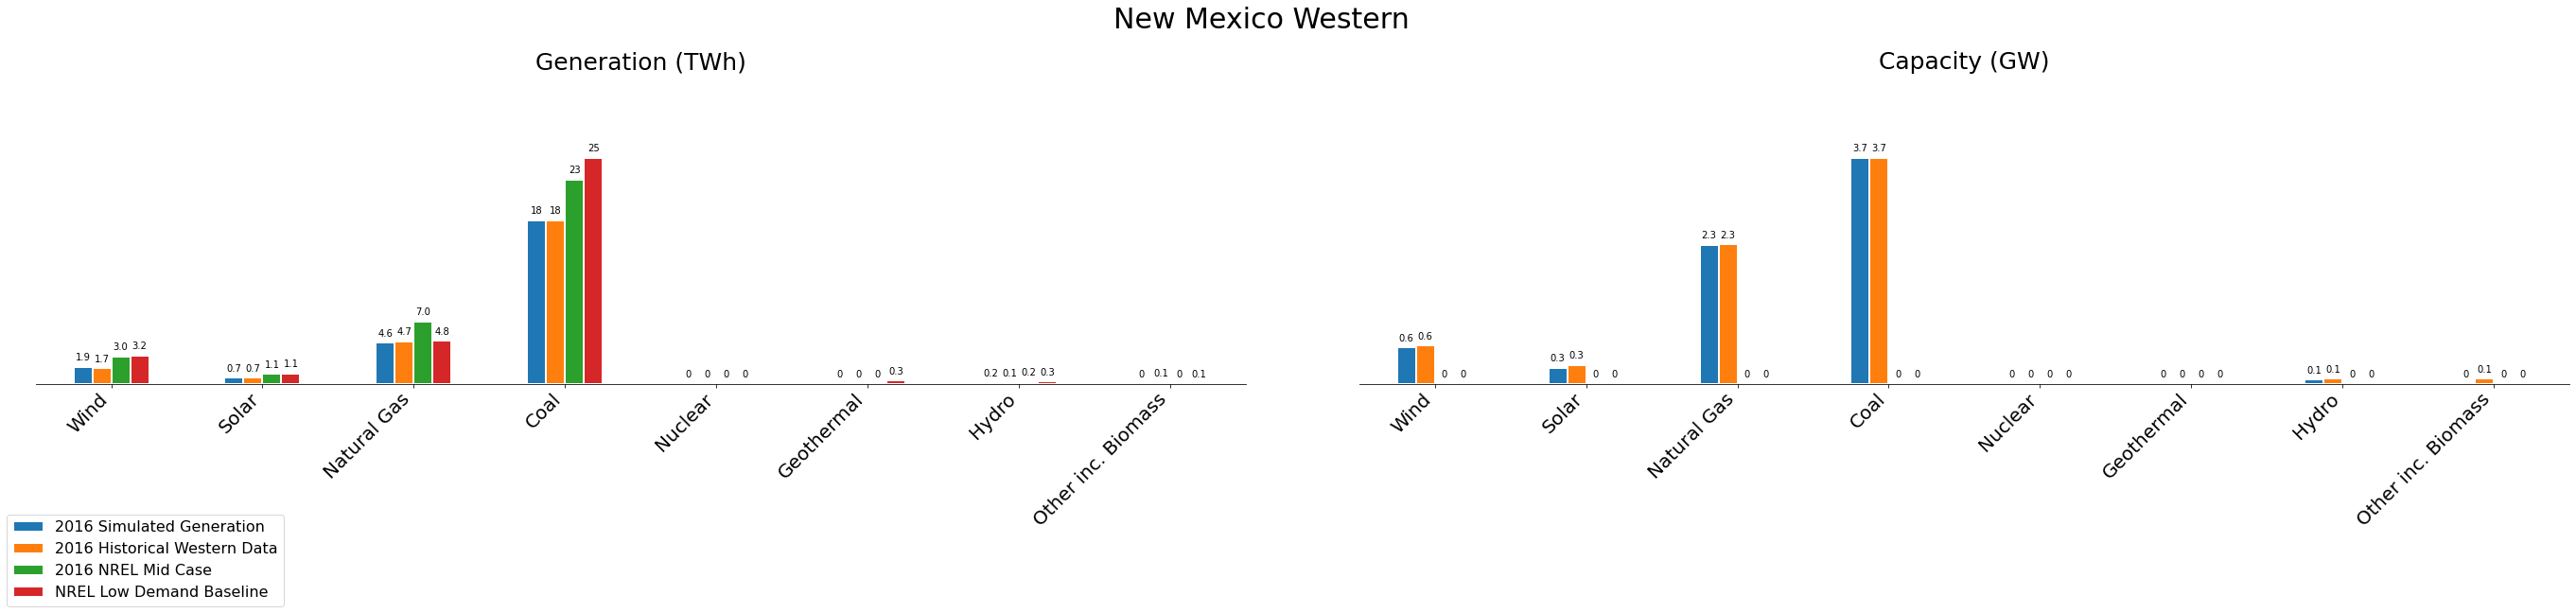

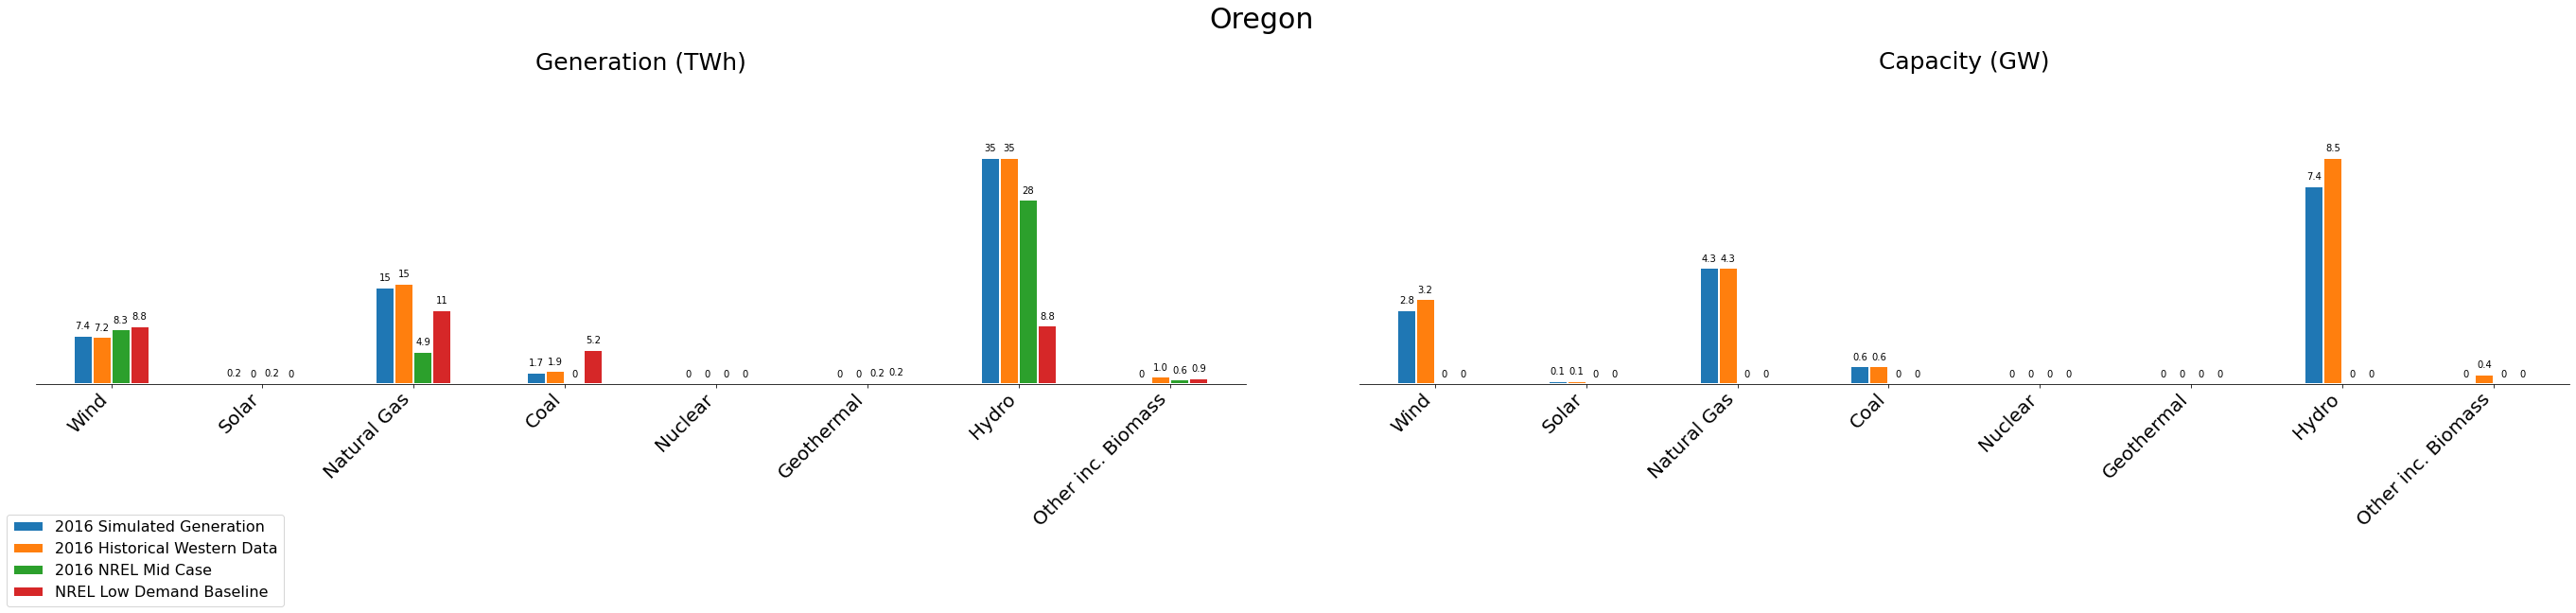

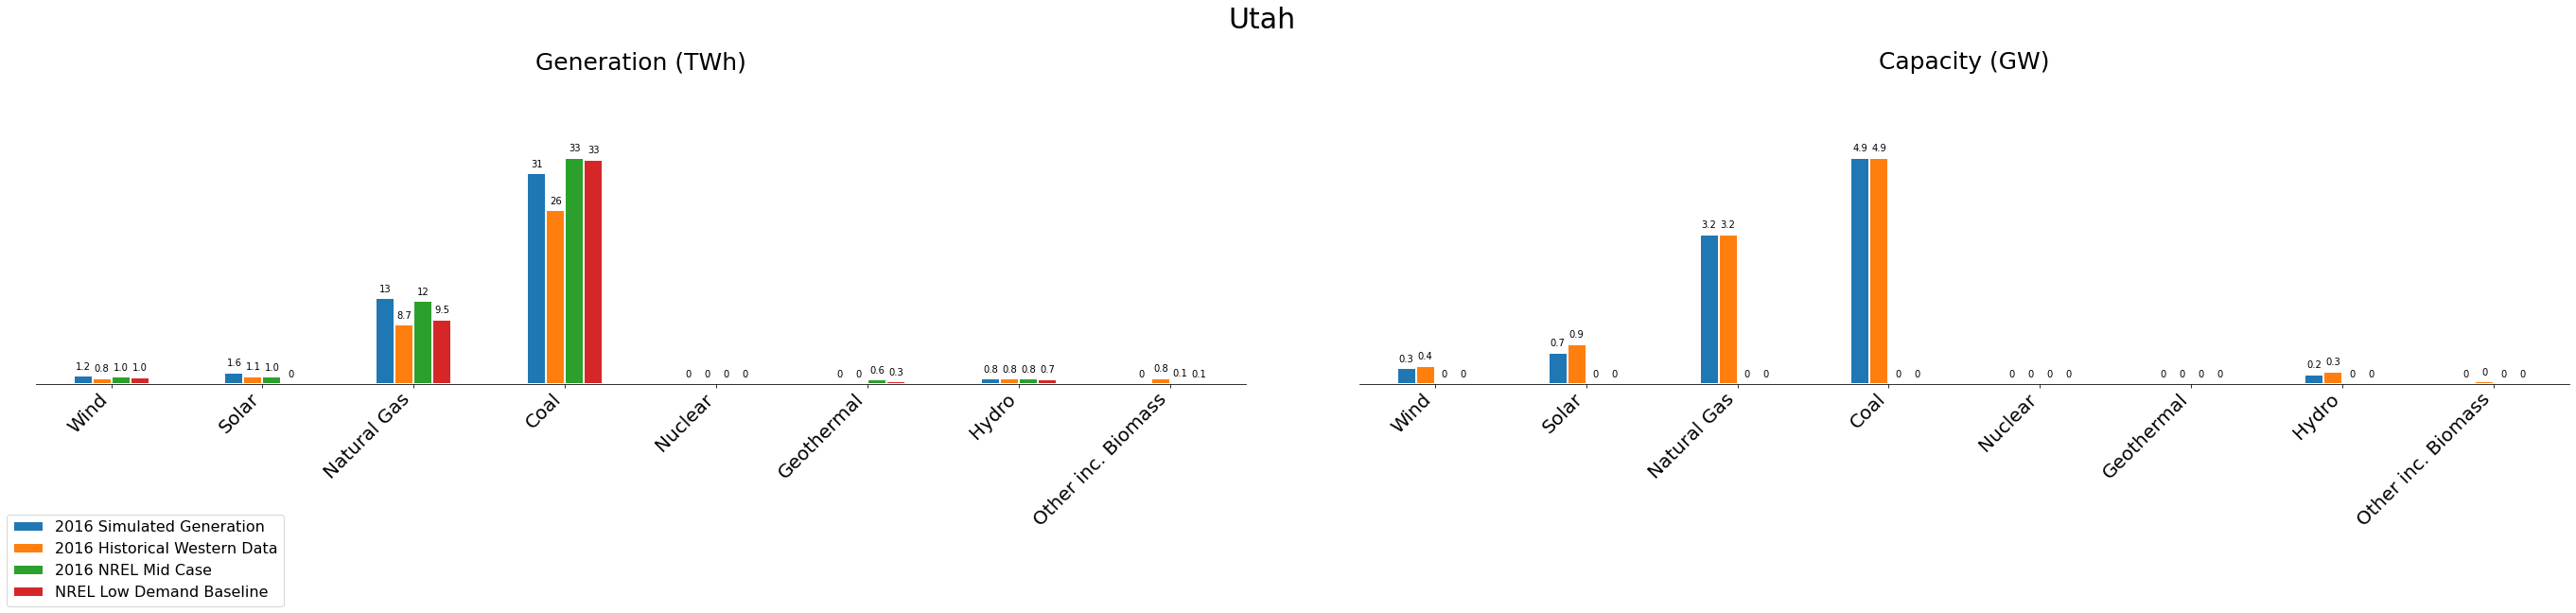

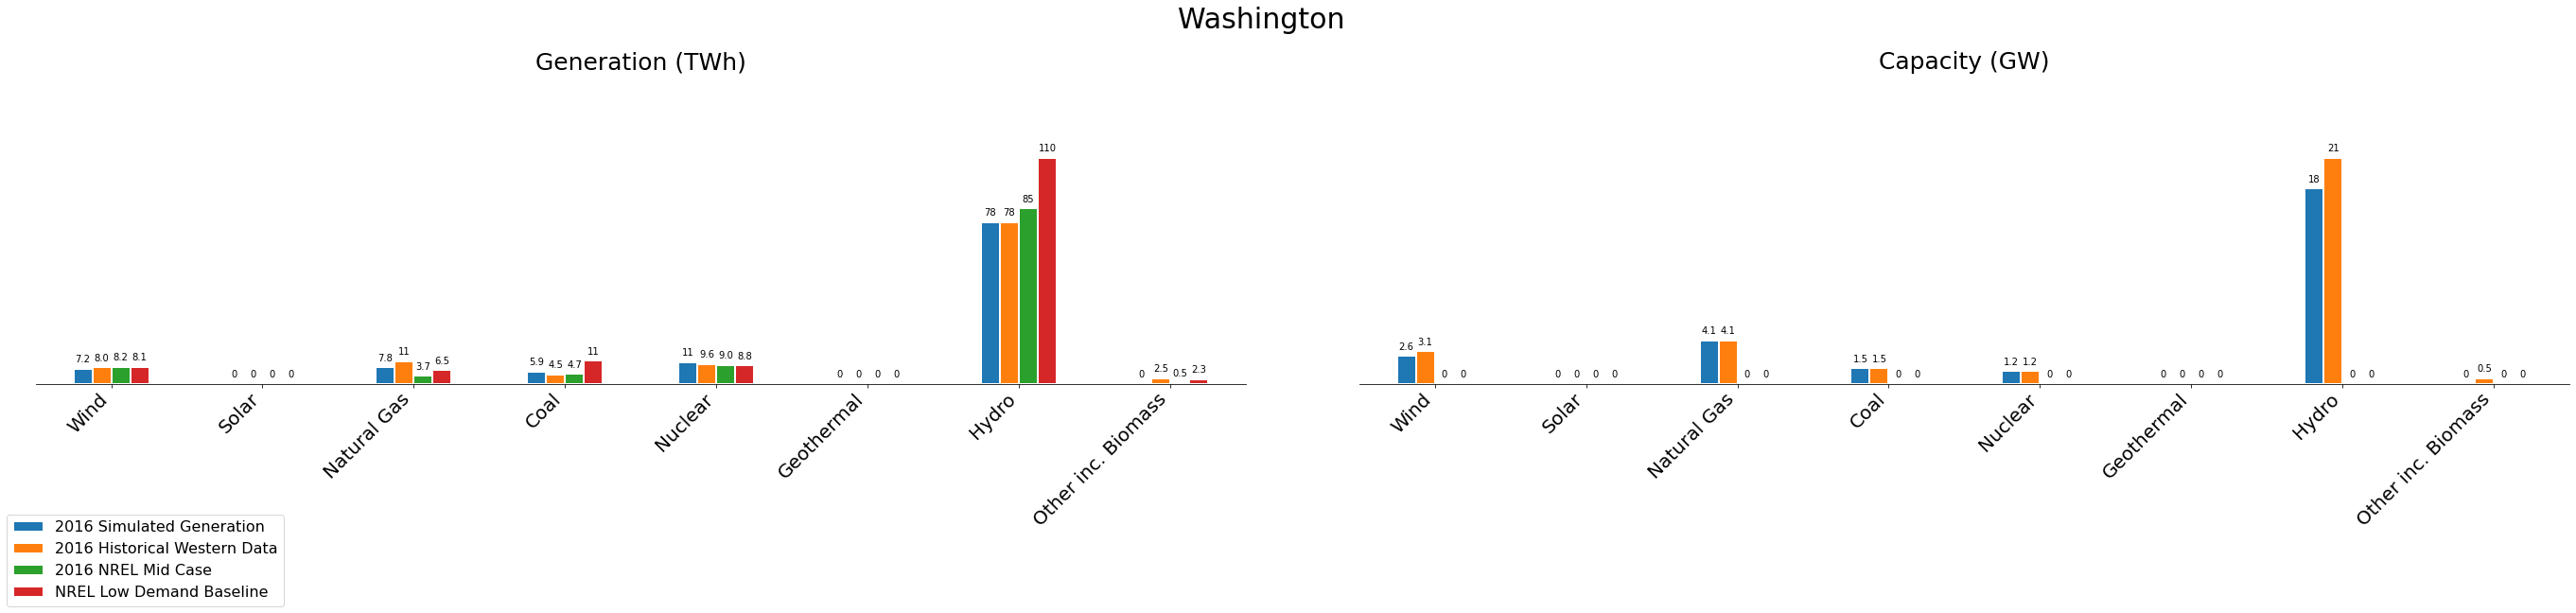

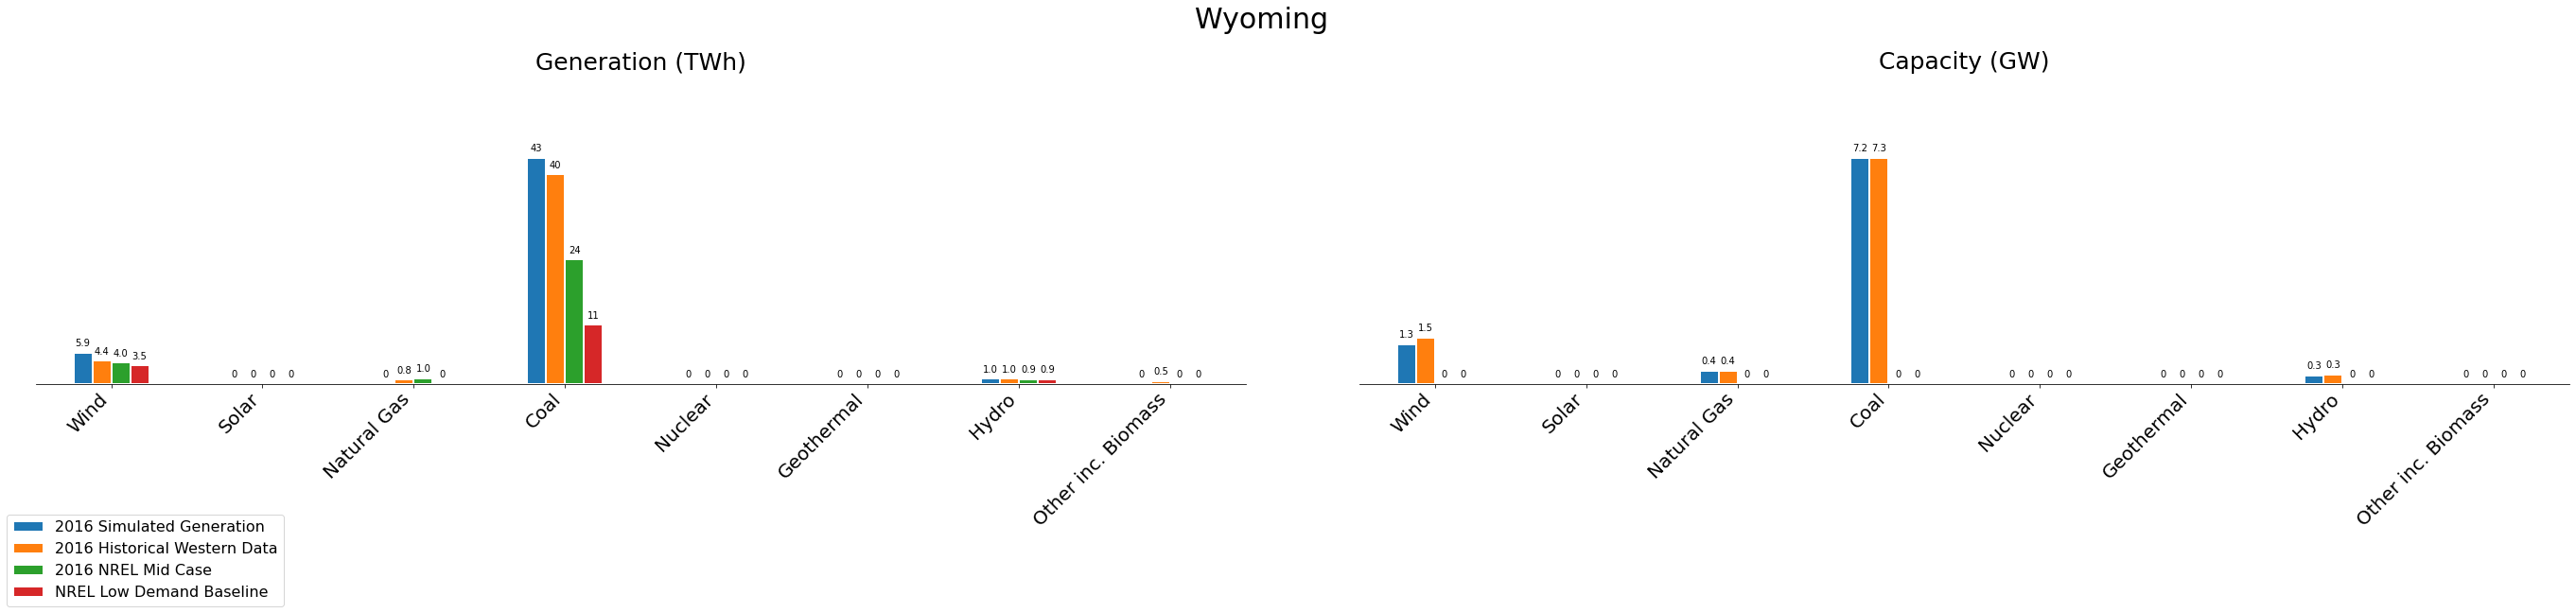

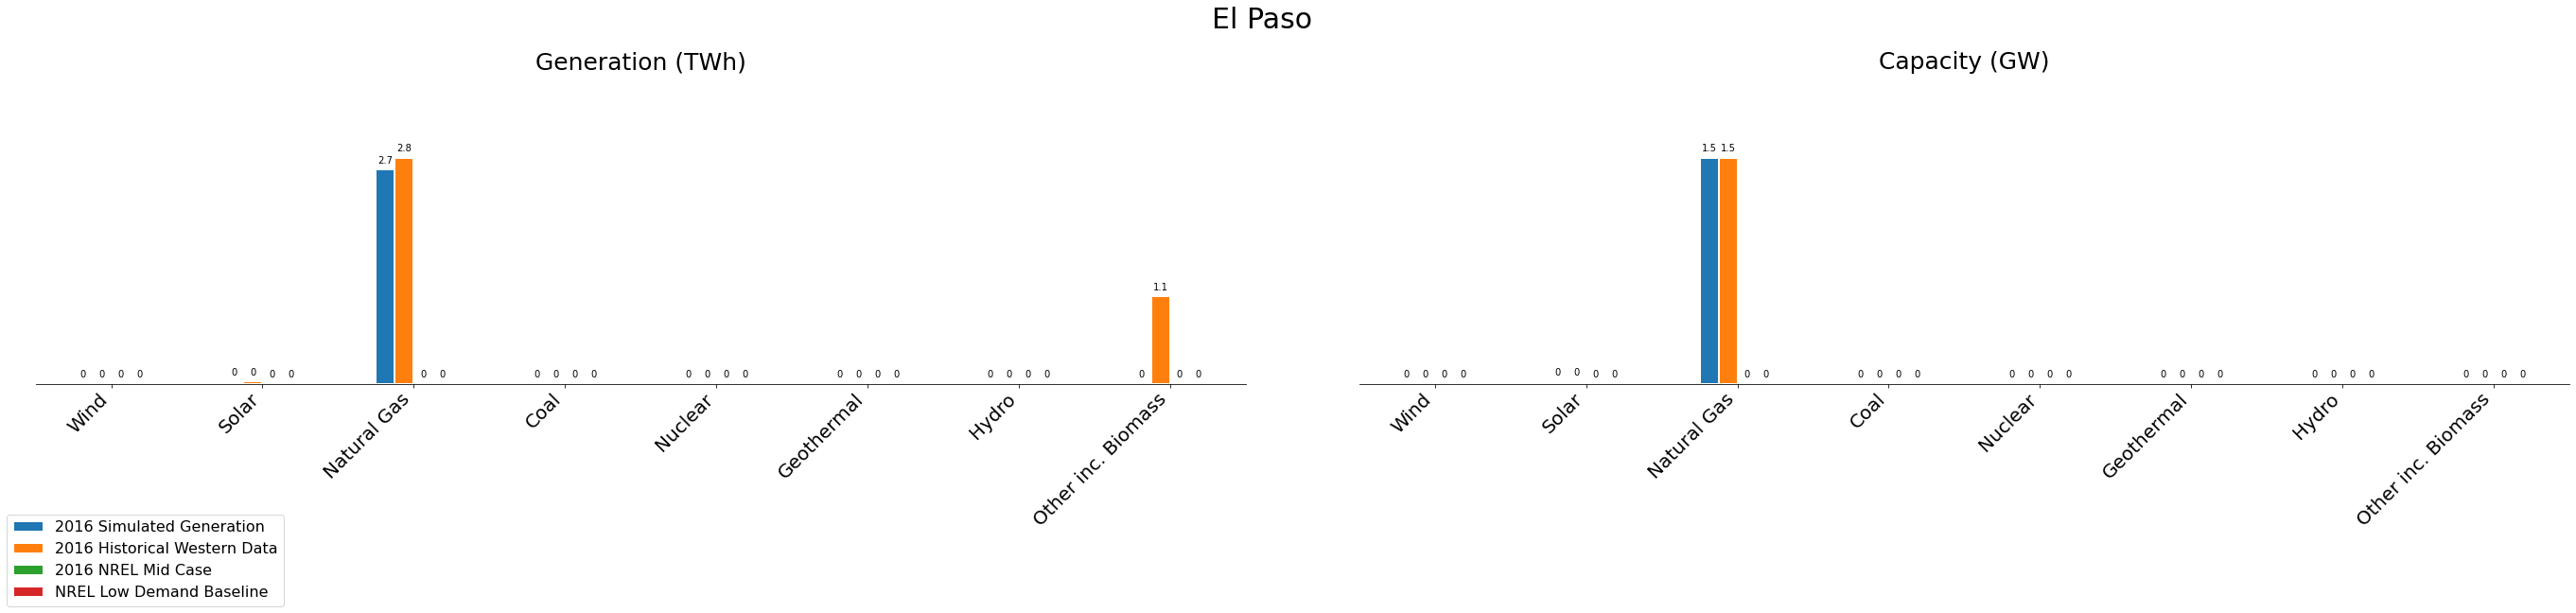

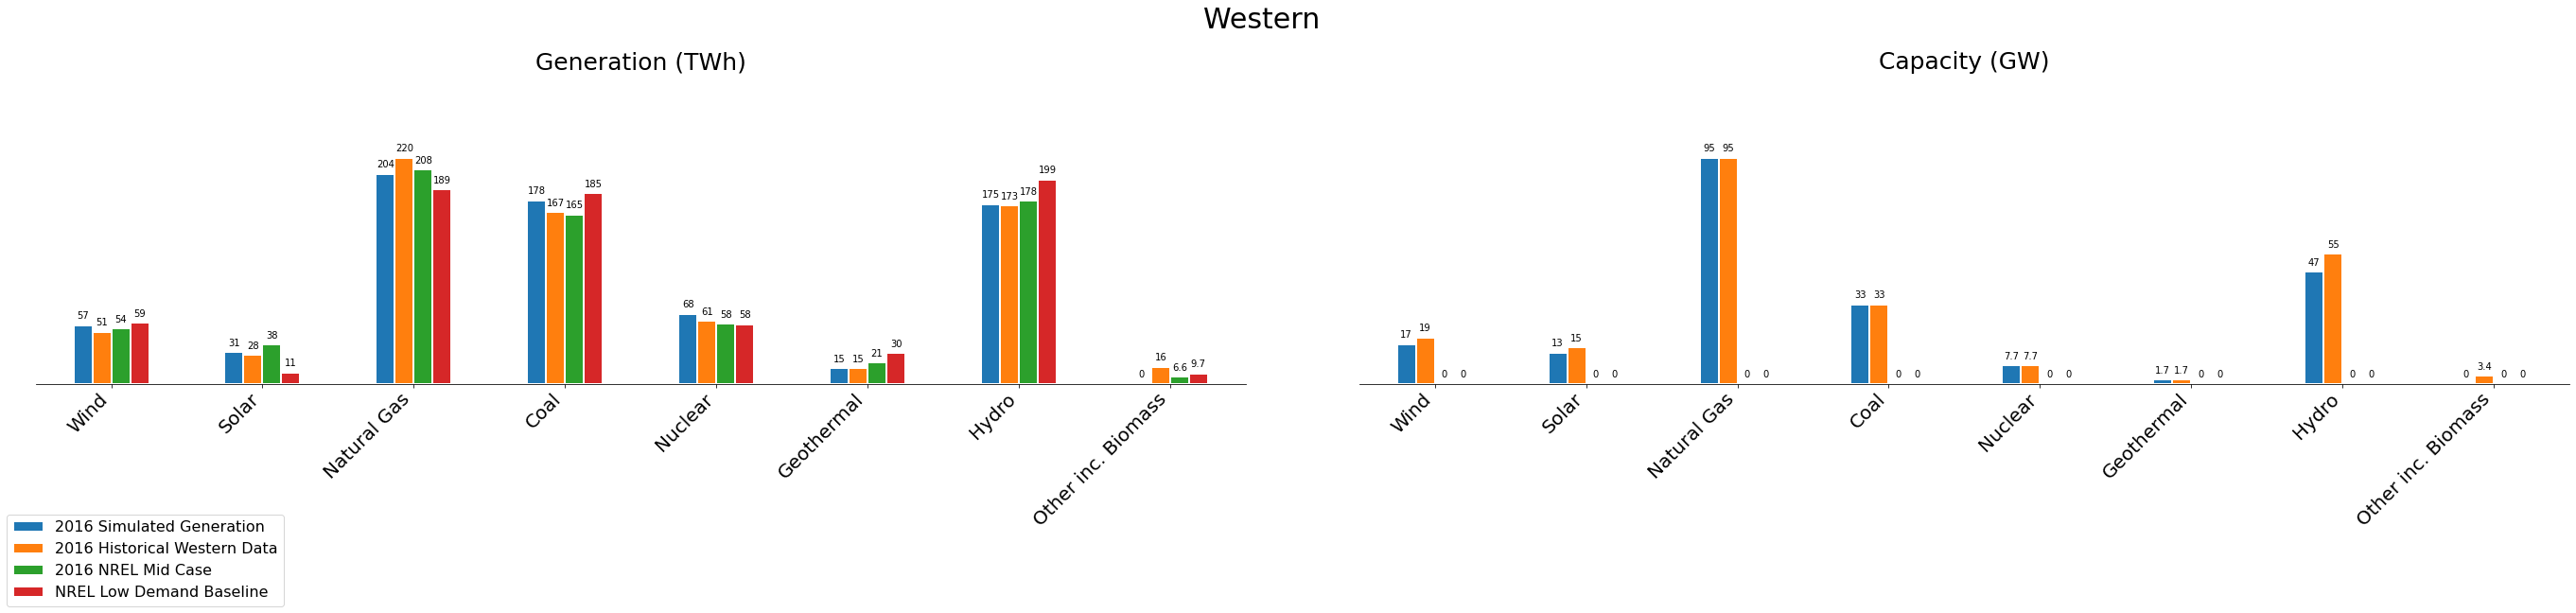

In [8]:
f = io.StringIO()
with redirect_stdout(f):
    plot_bar(interconnect = 'Western',
             time = time,
             scenario_ids = ['87'],
             scenario_names = ['2016 Simulated Generation'],
             custom_data = custom_data)
plt.show()

## Horizontal bar plot

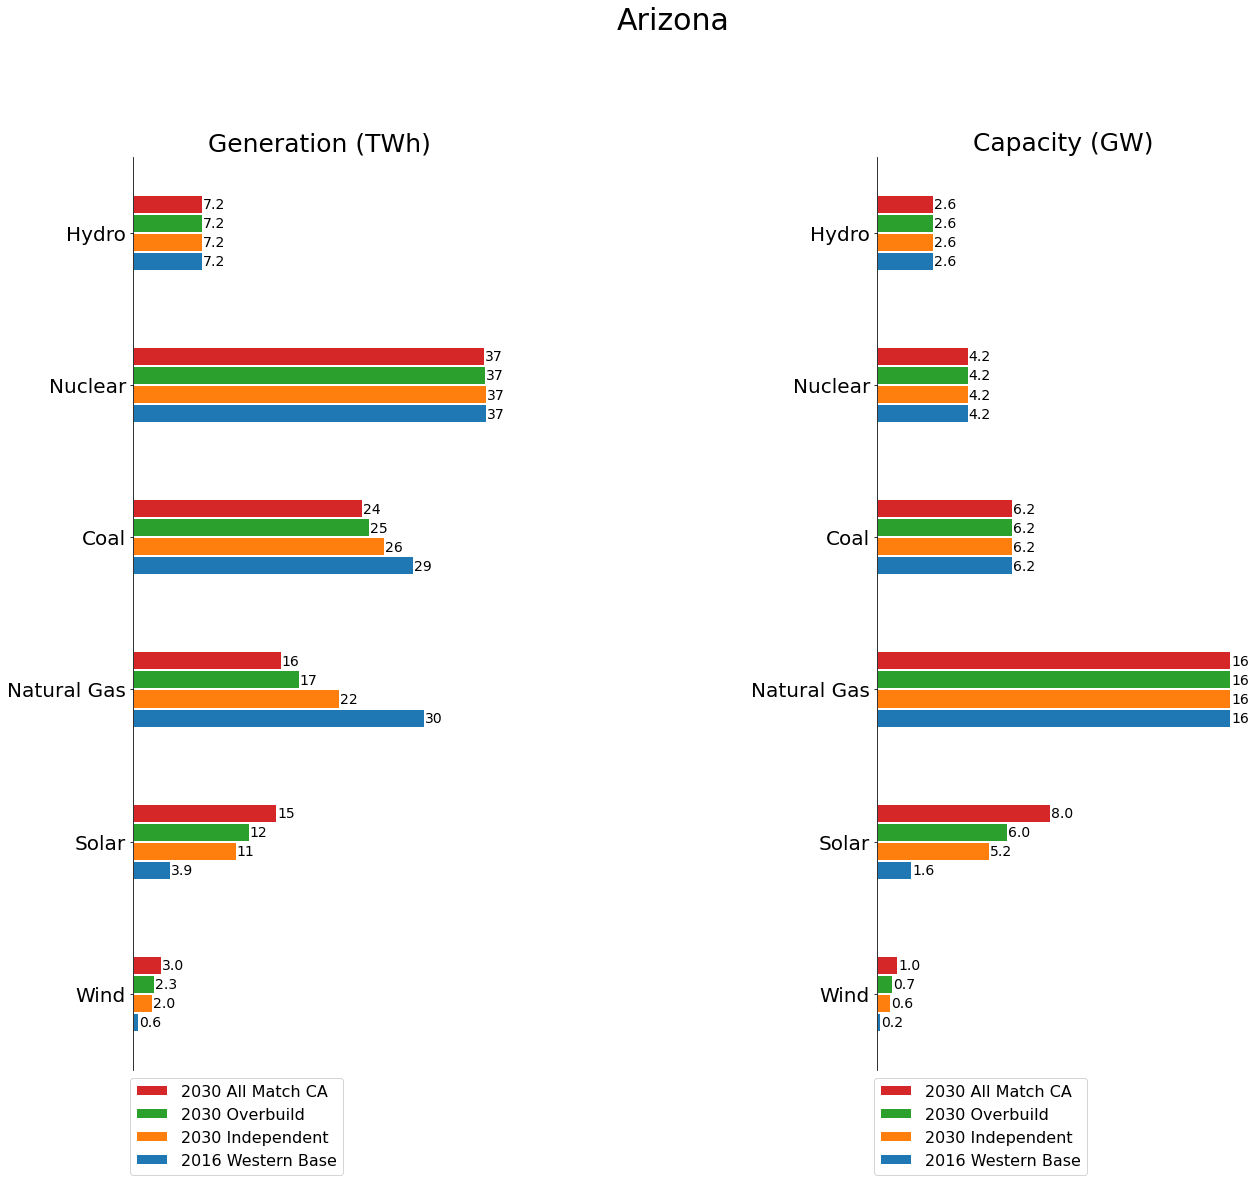

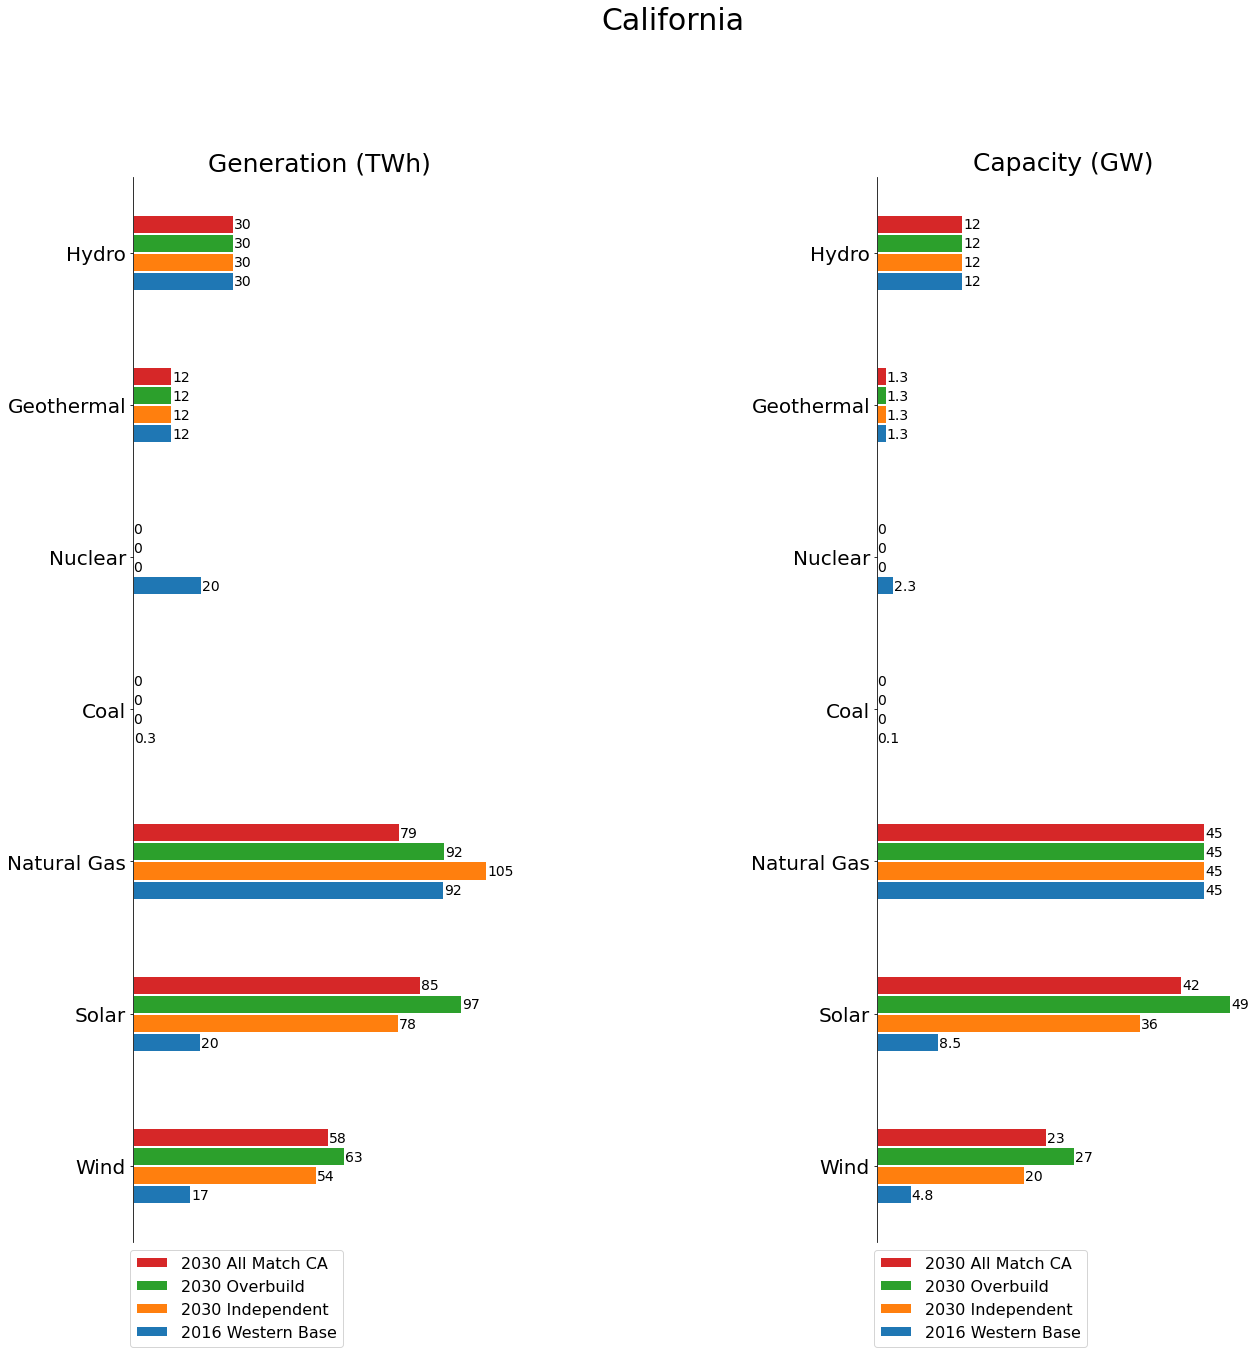

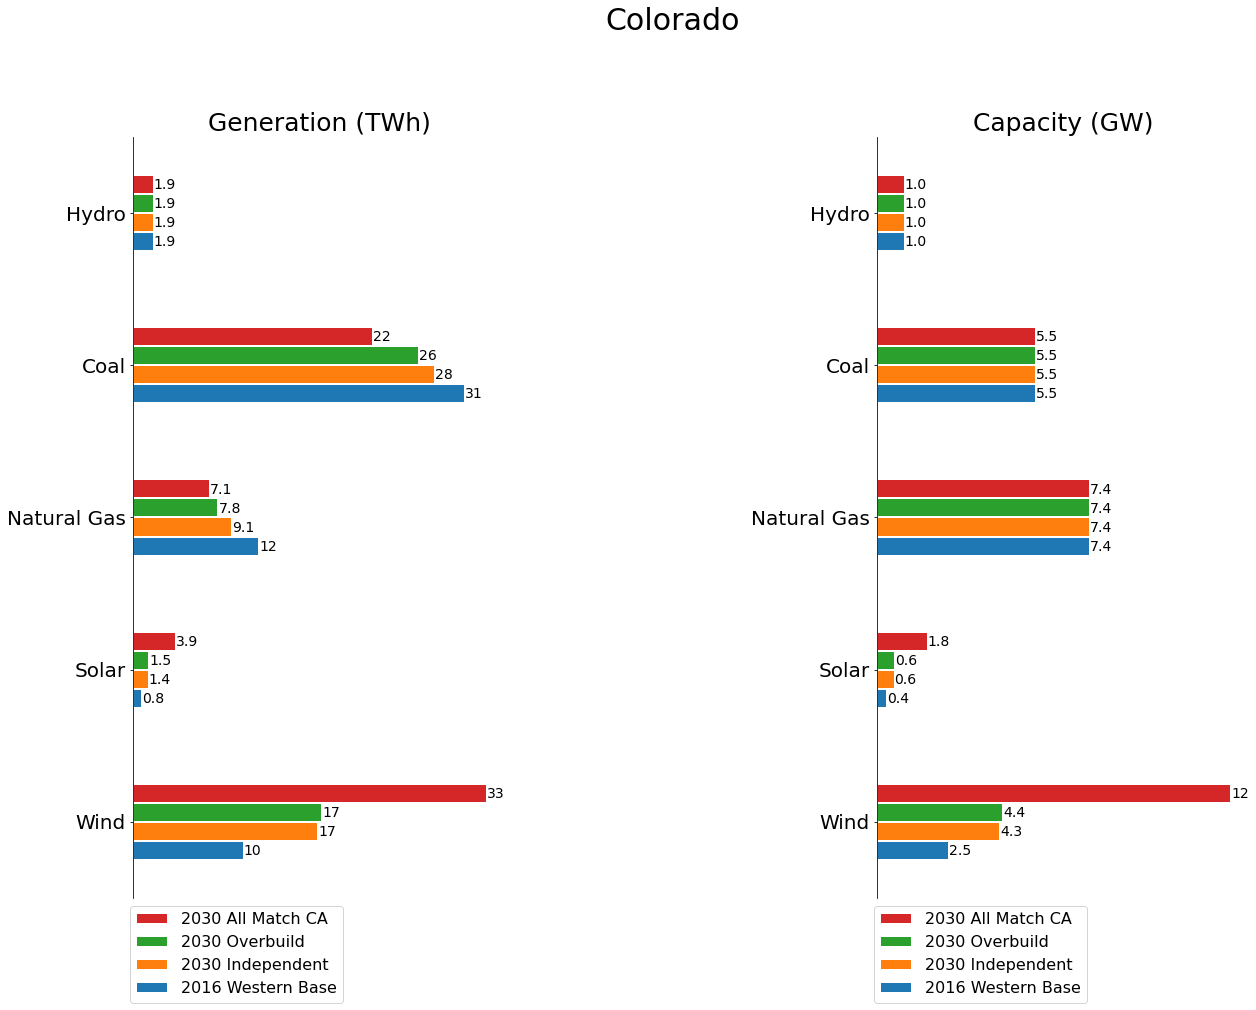

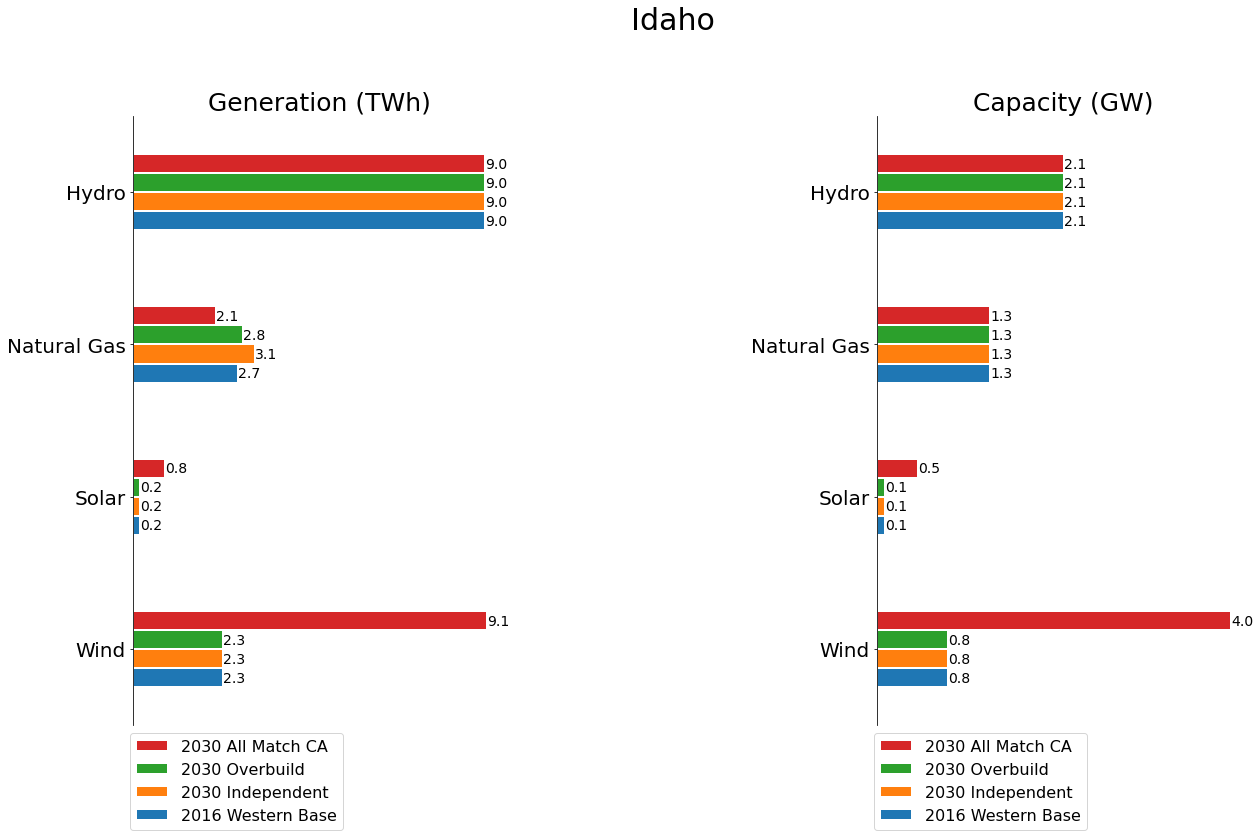

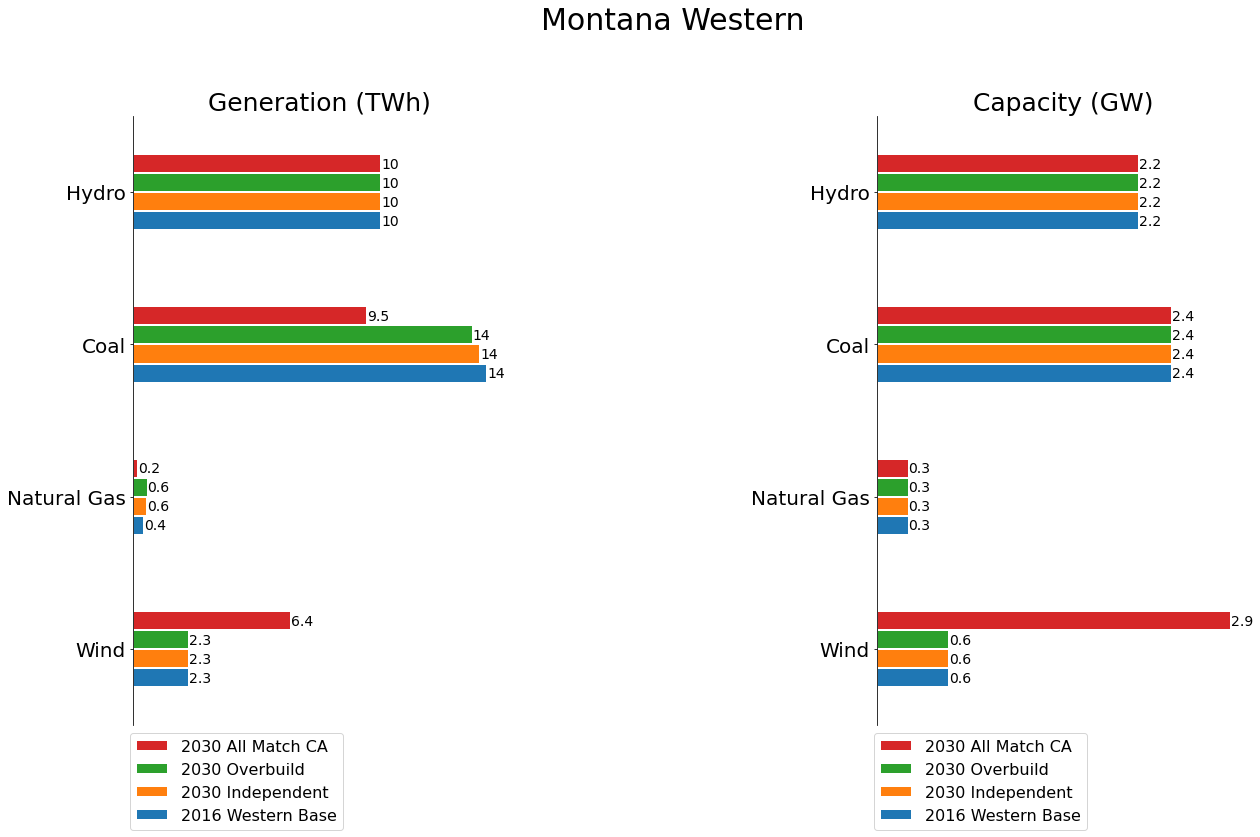

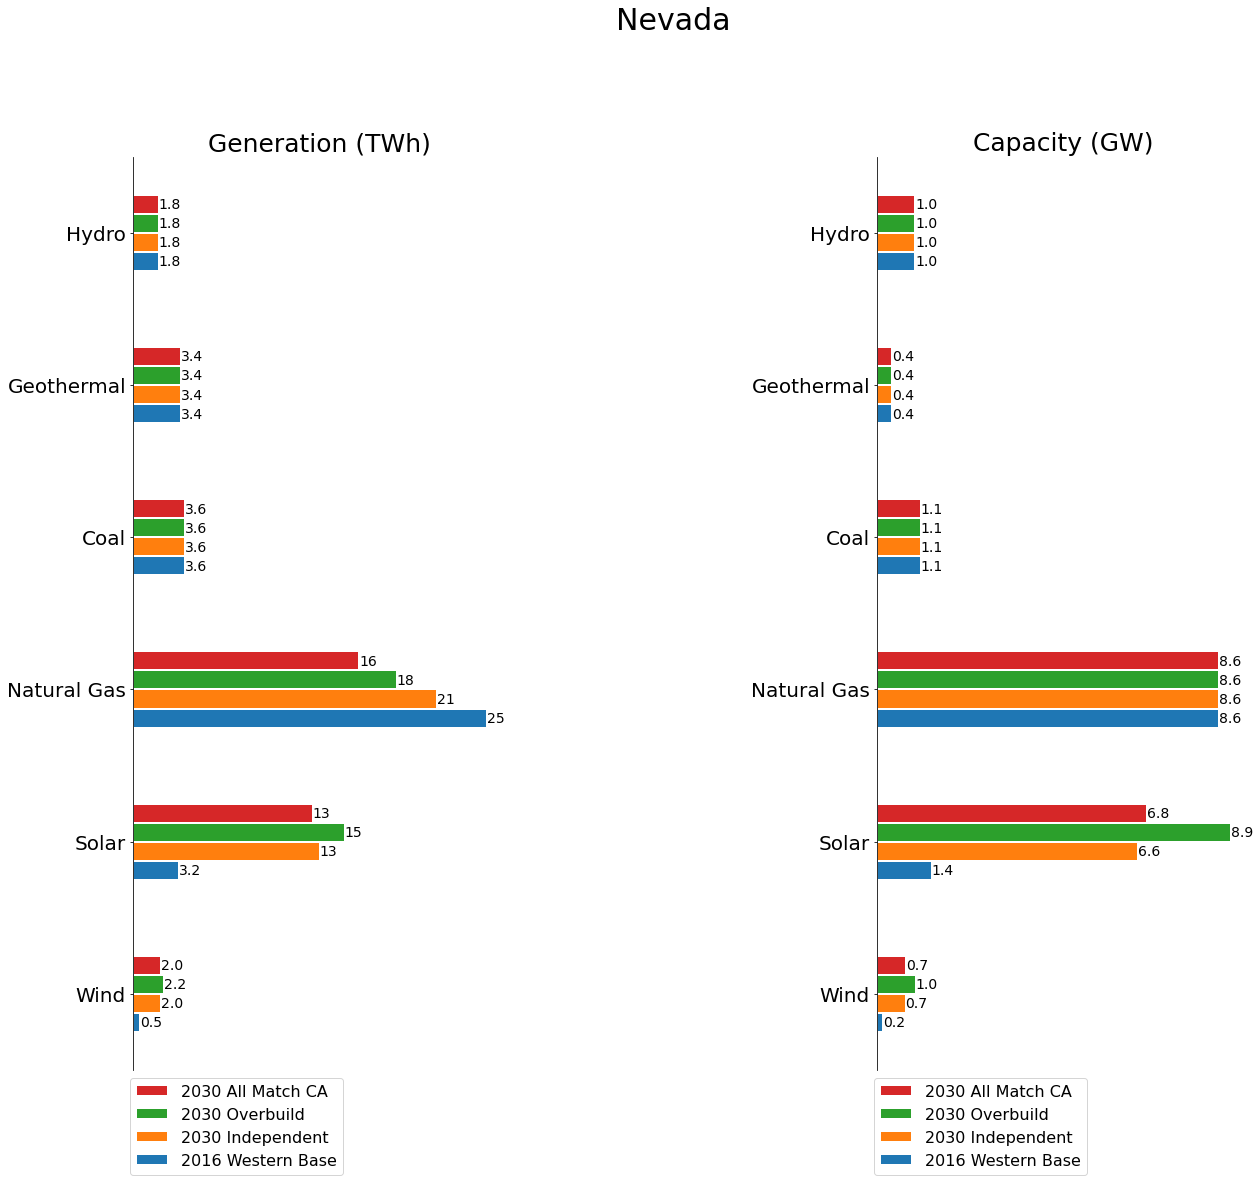

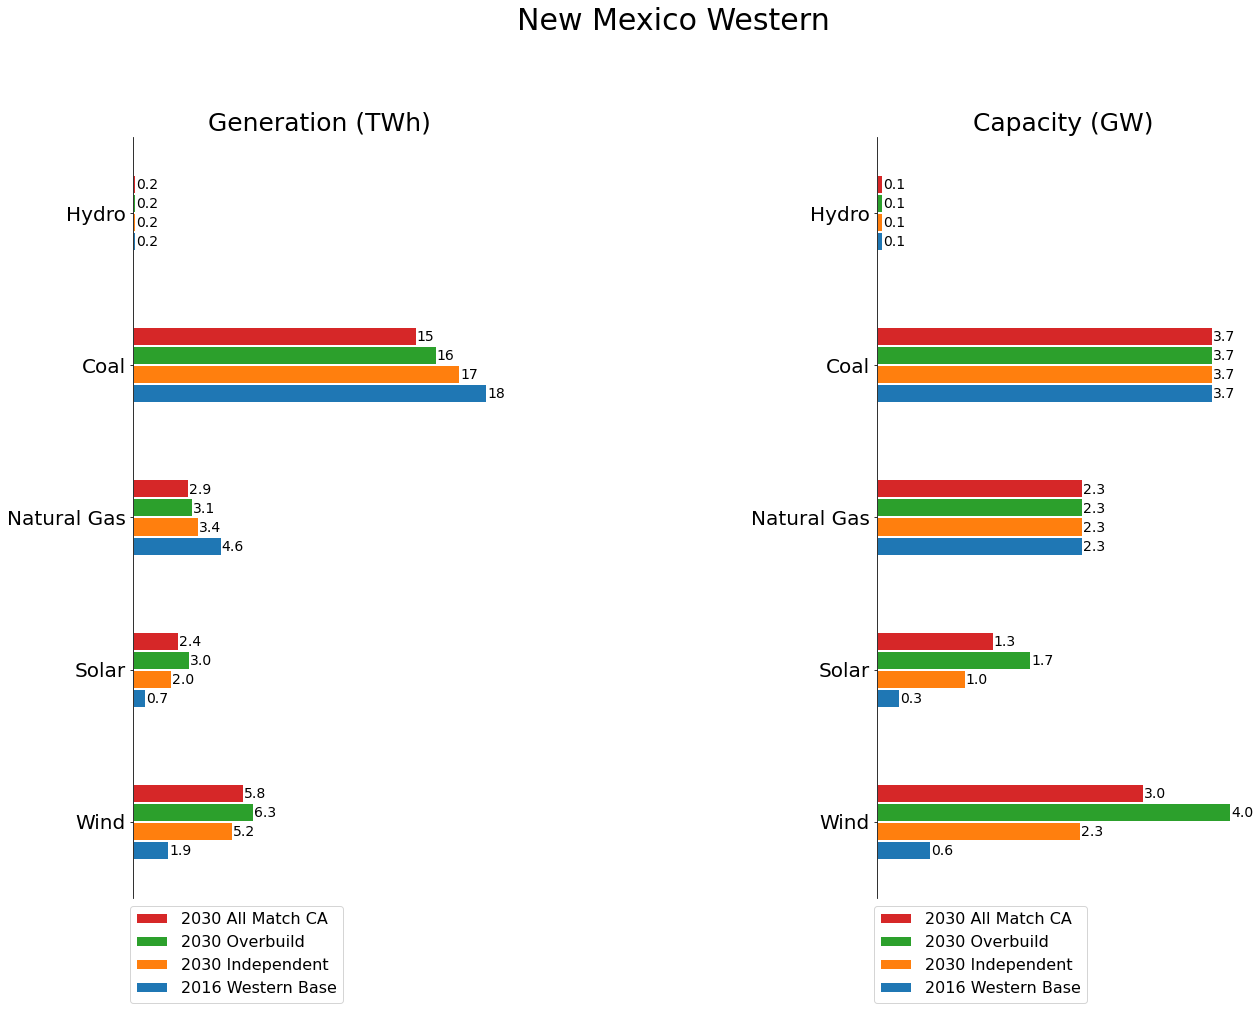

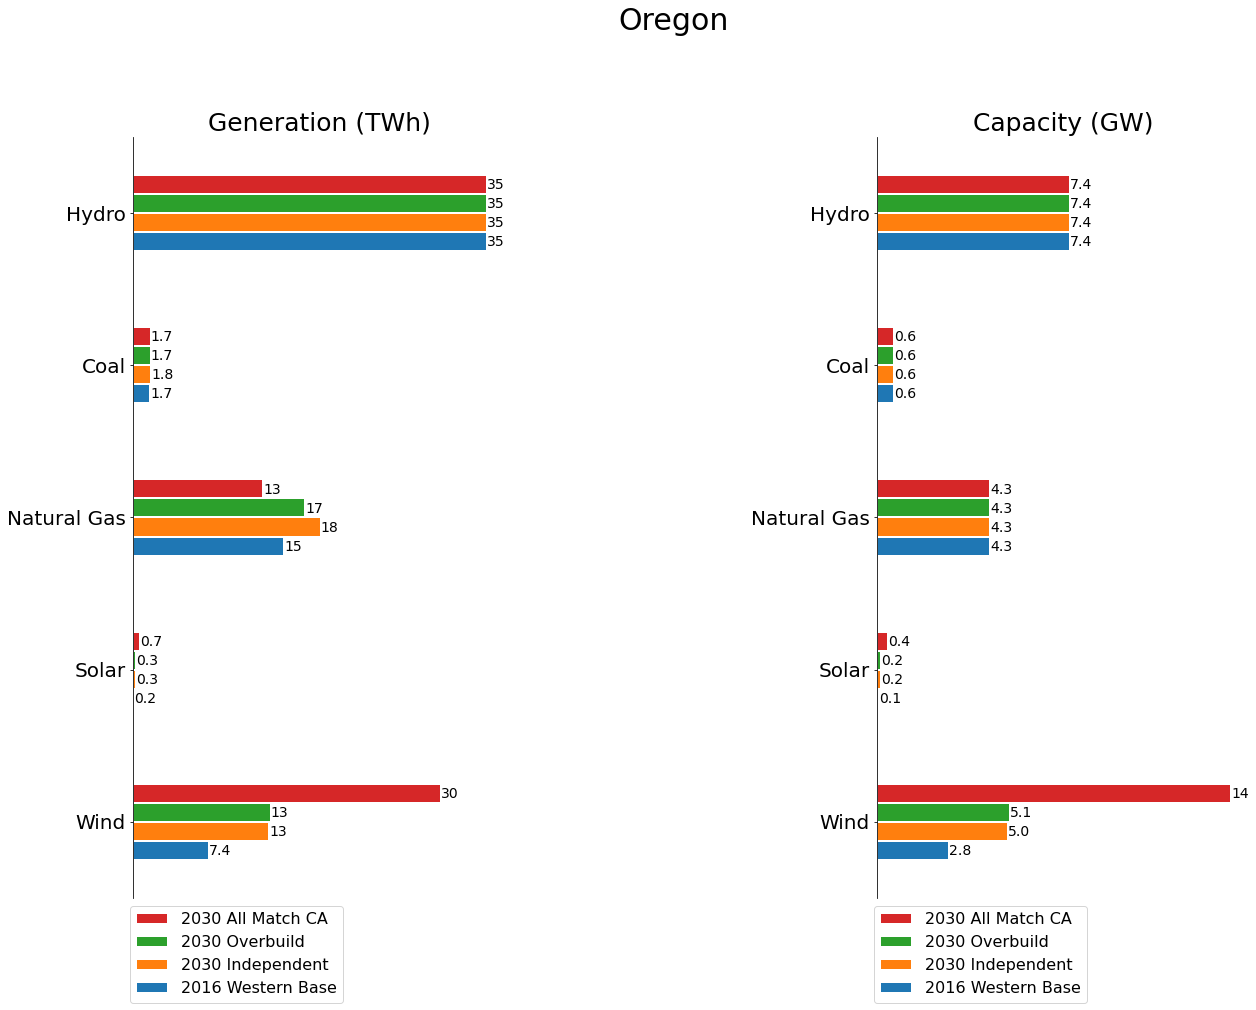

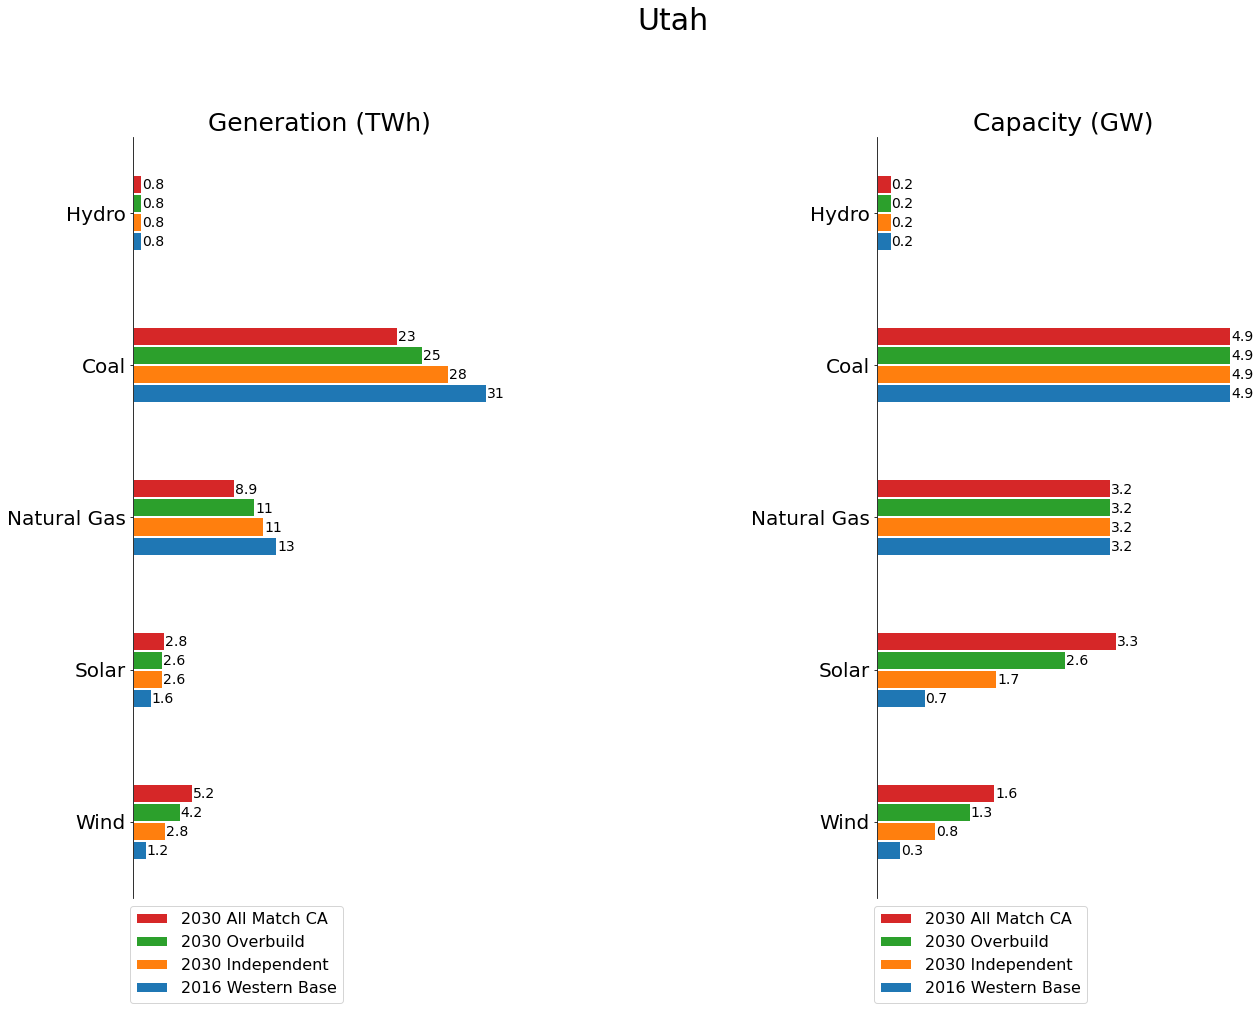

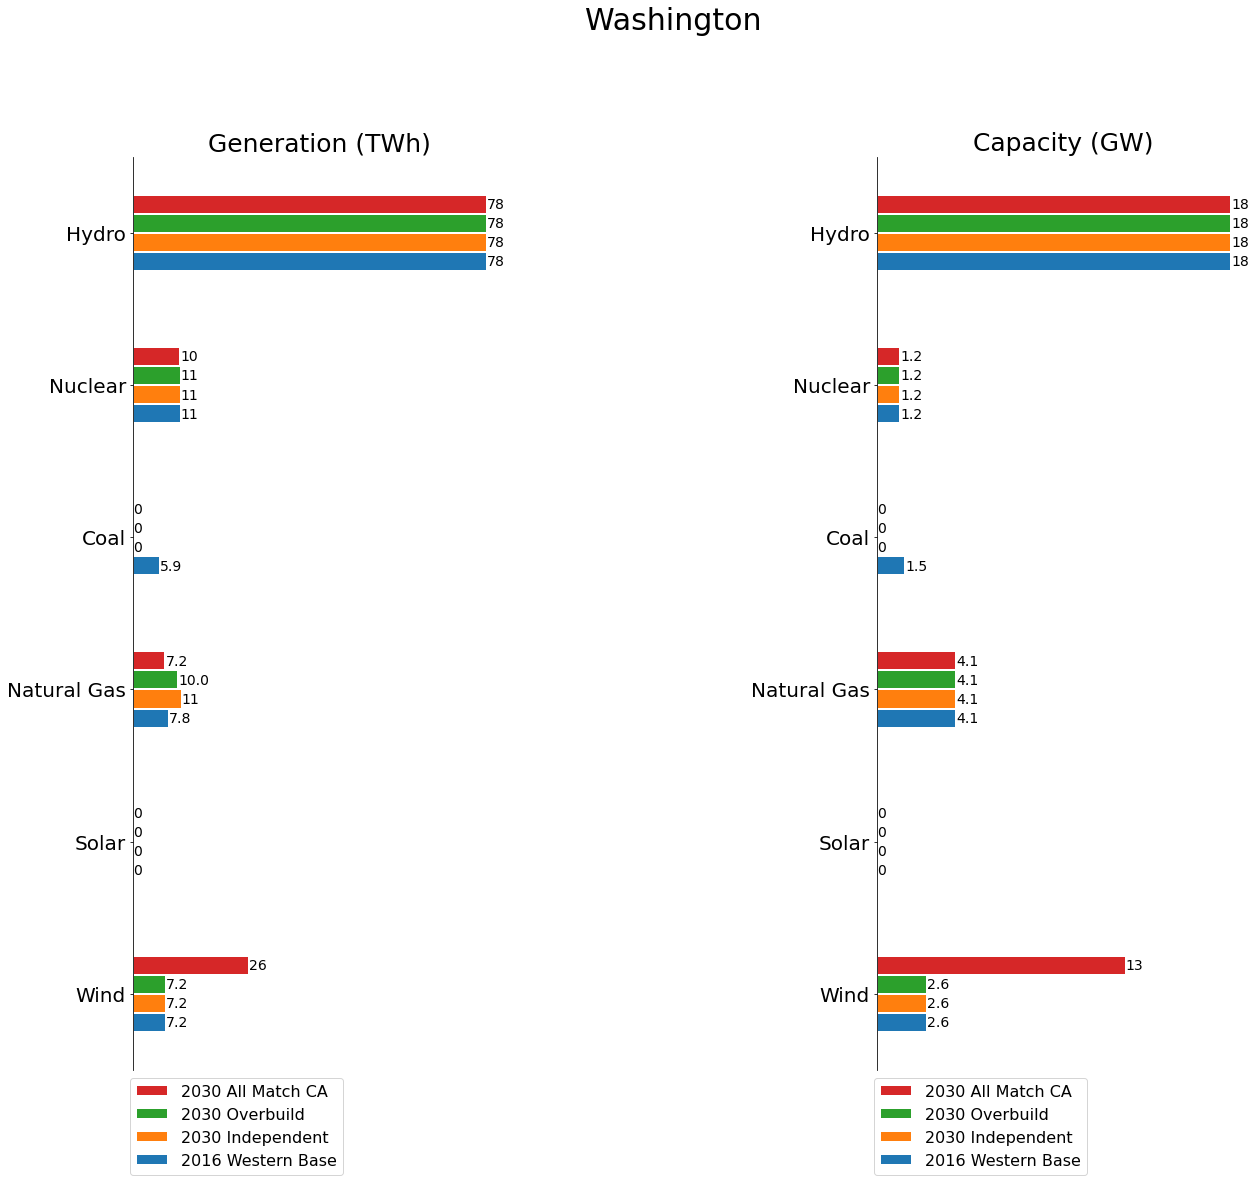

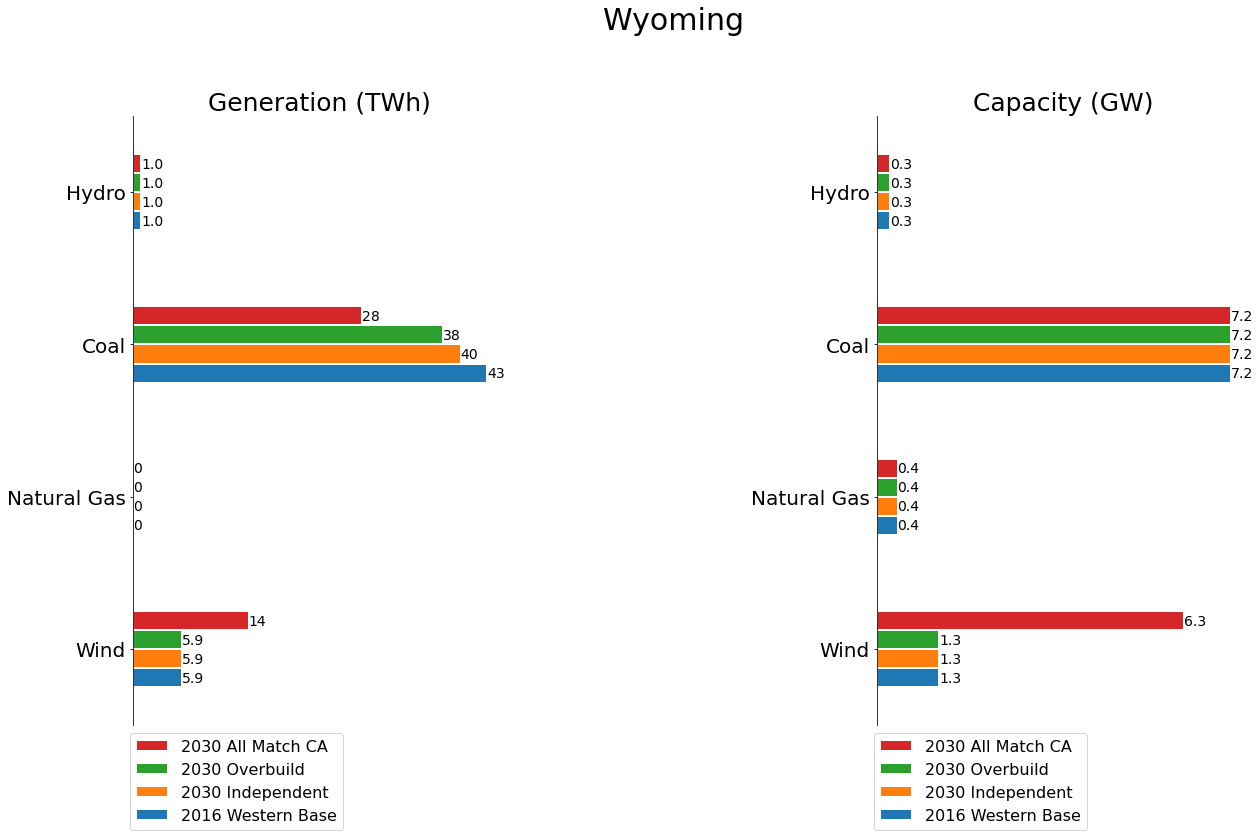

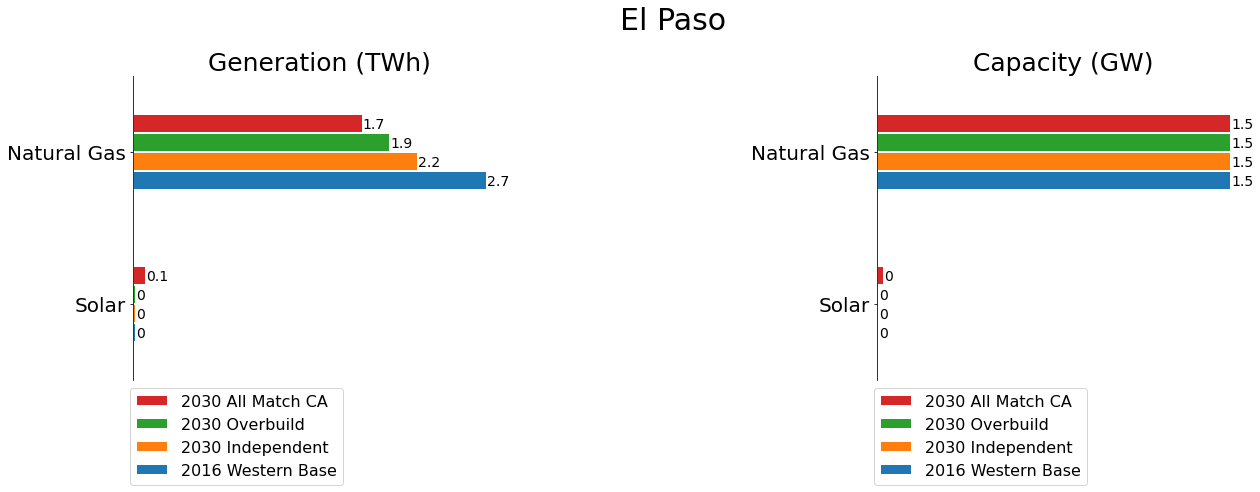

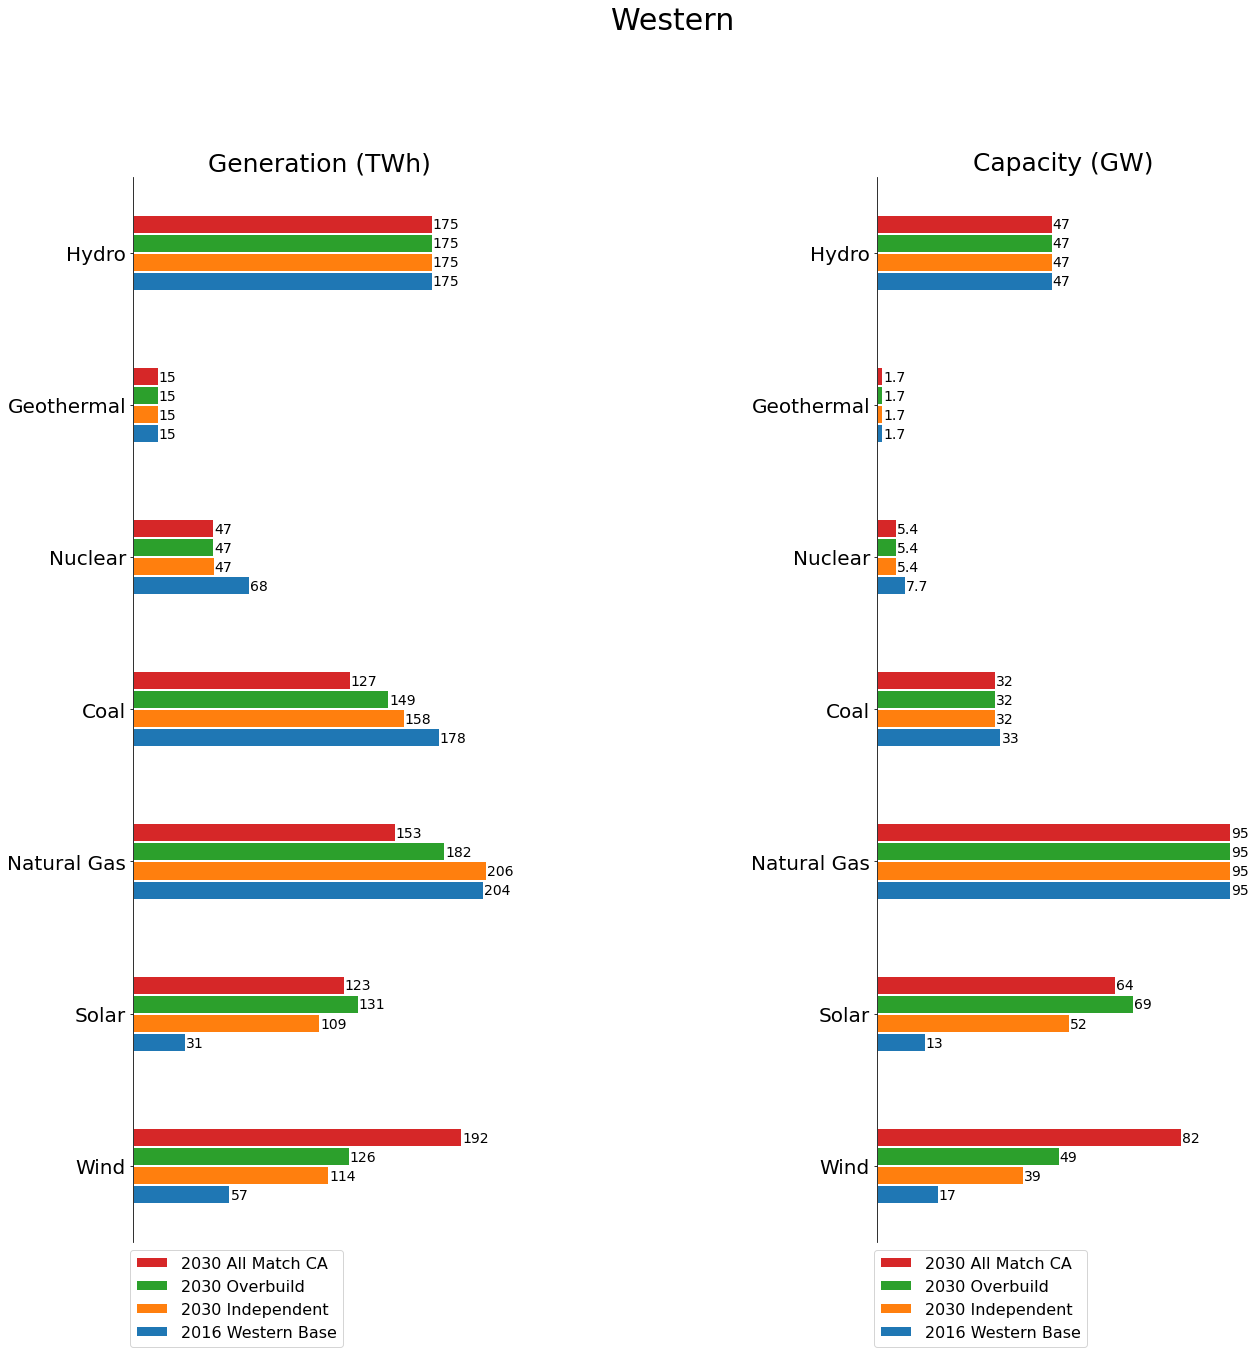

In [9]:
f = io.StringIO()
with redirect_stdout(f):
    plot_hbar('Western',
              time,
              ['87', '91', '103', '89'],
              ['2016 Western Base', '2030 Independent', '2030 Overbuild', '2030 All Match CA'])
plt.show()

## Pie plot
With plot pie you can optionally set min_percentage to combine small pie pieces into an Other category. Other is the dark blue wedge!

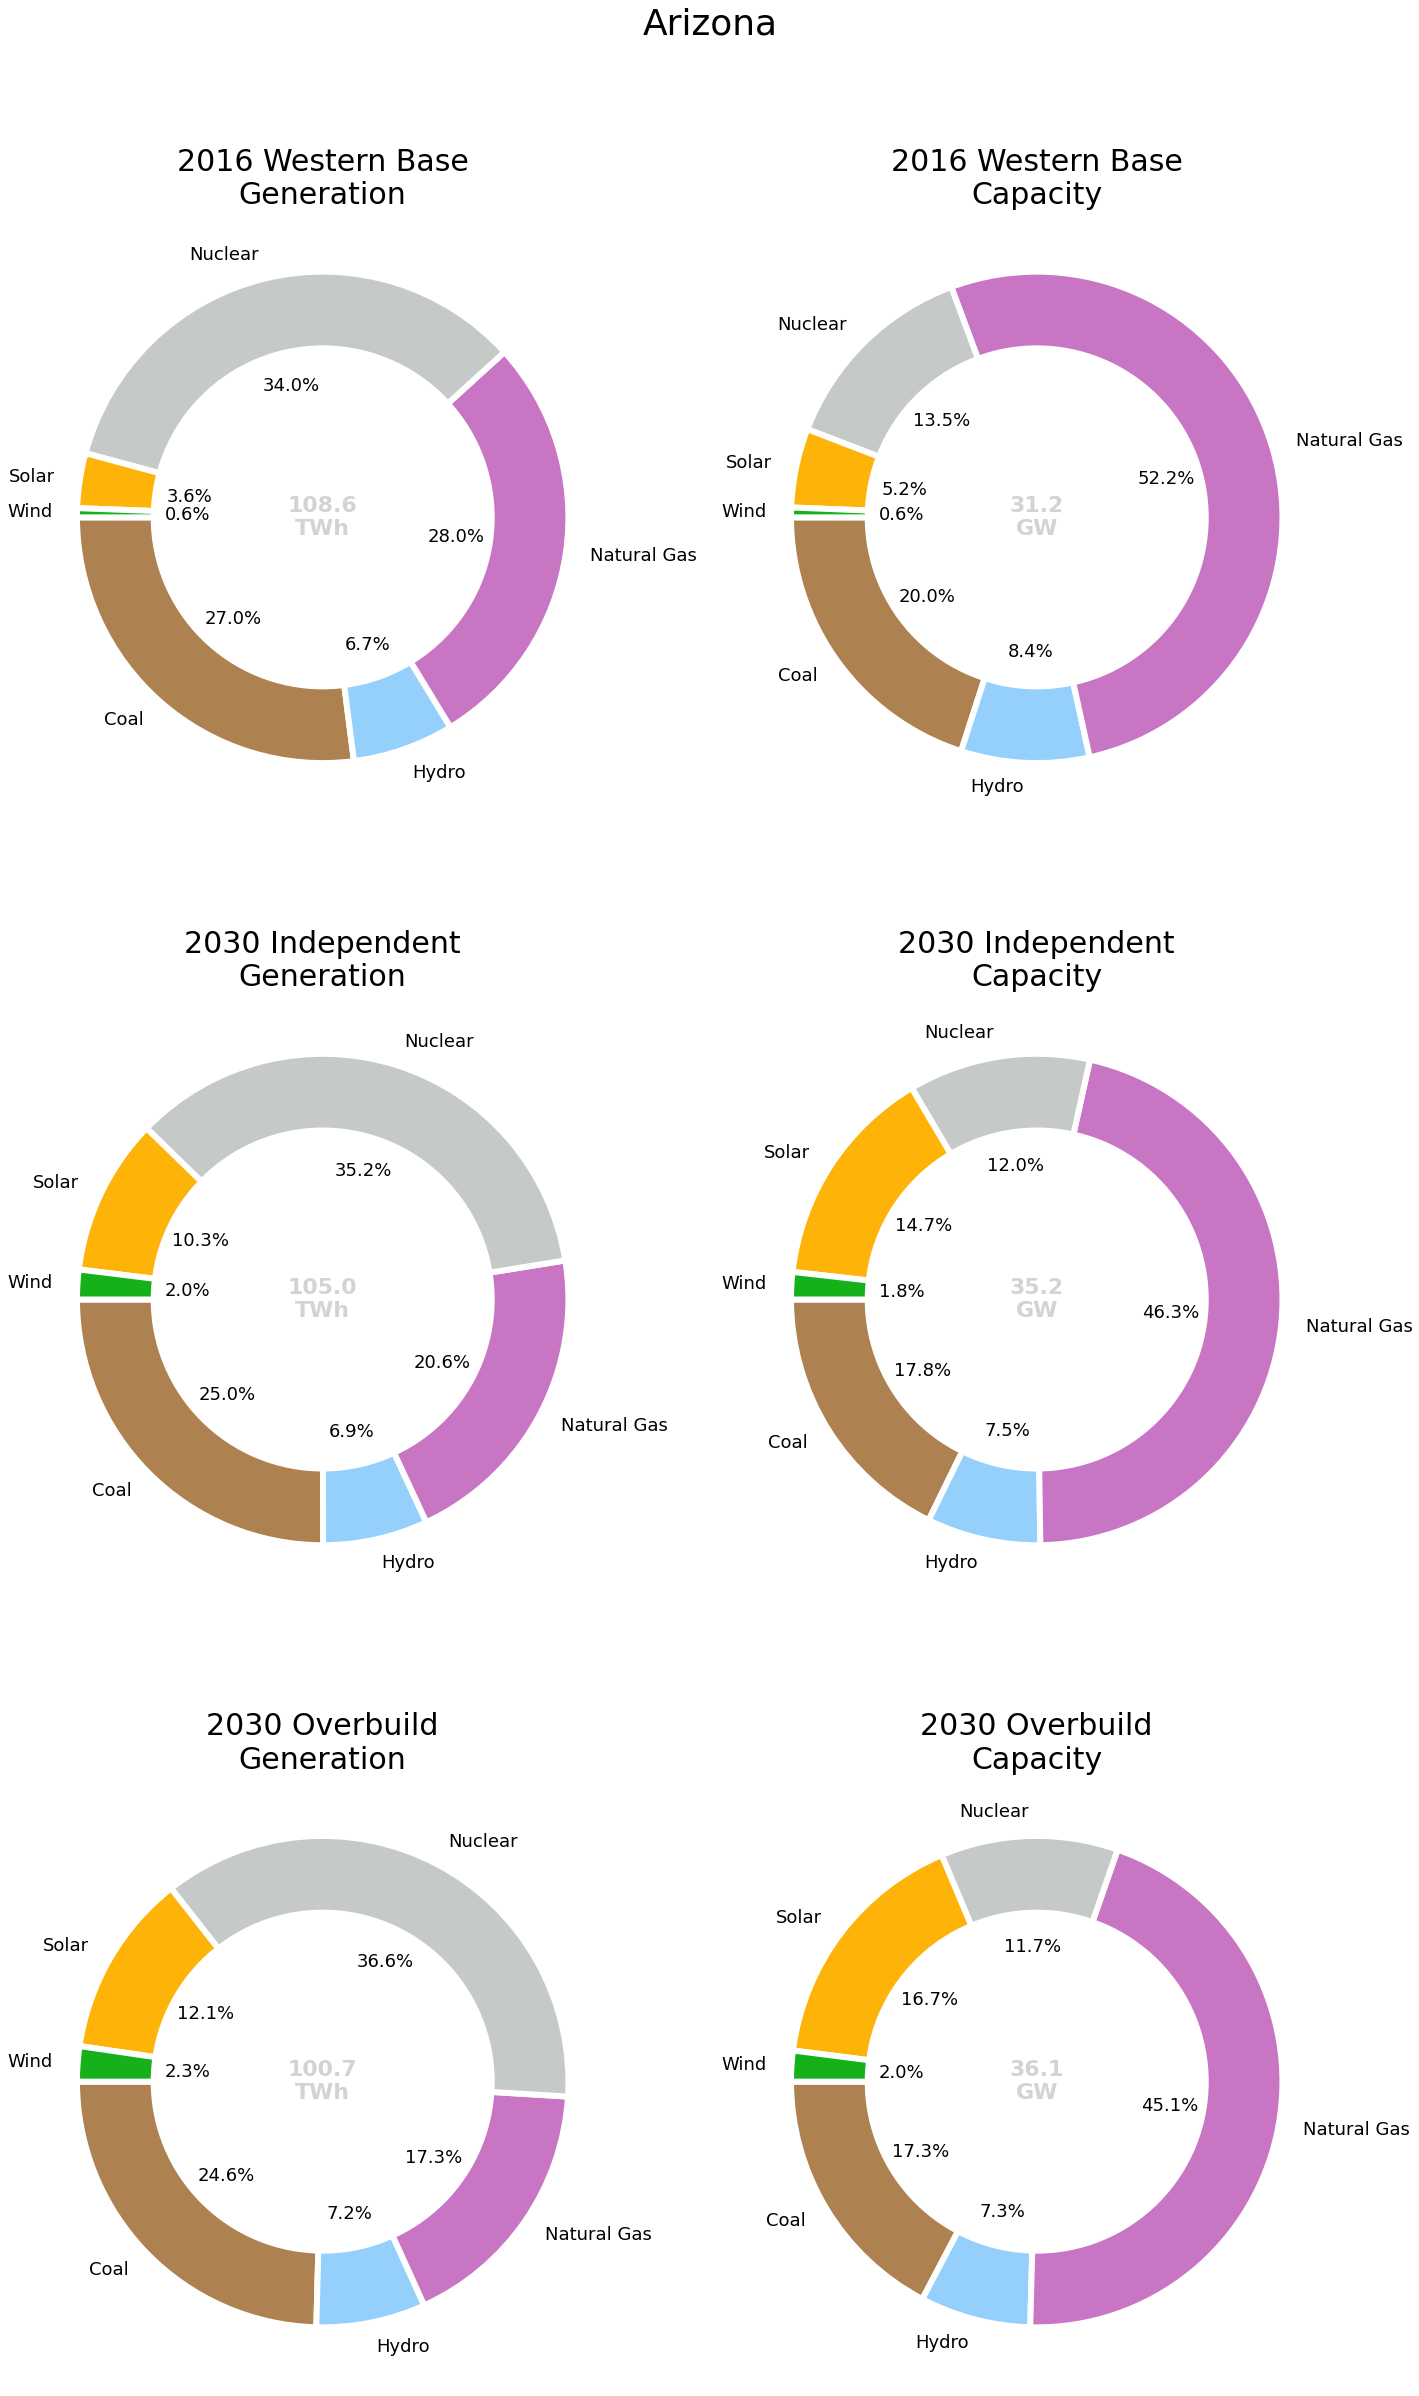

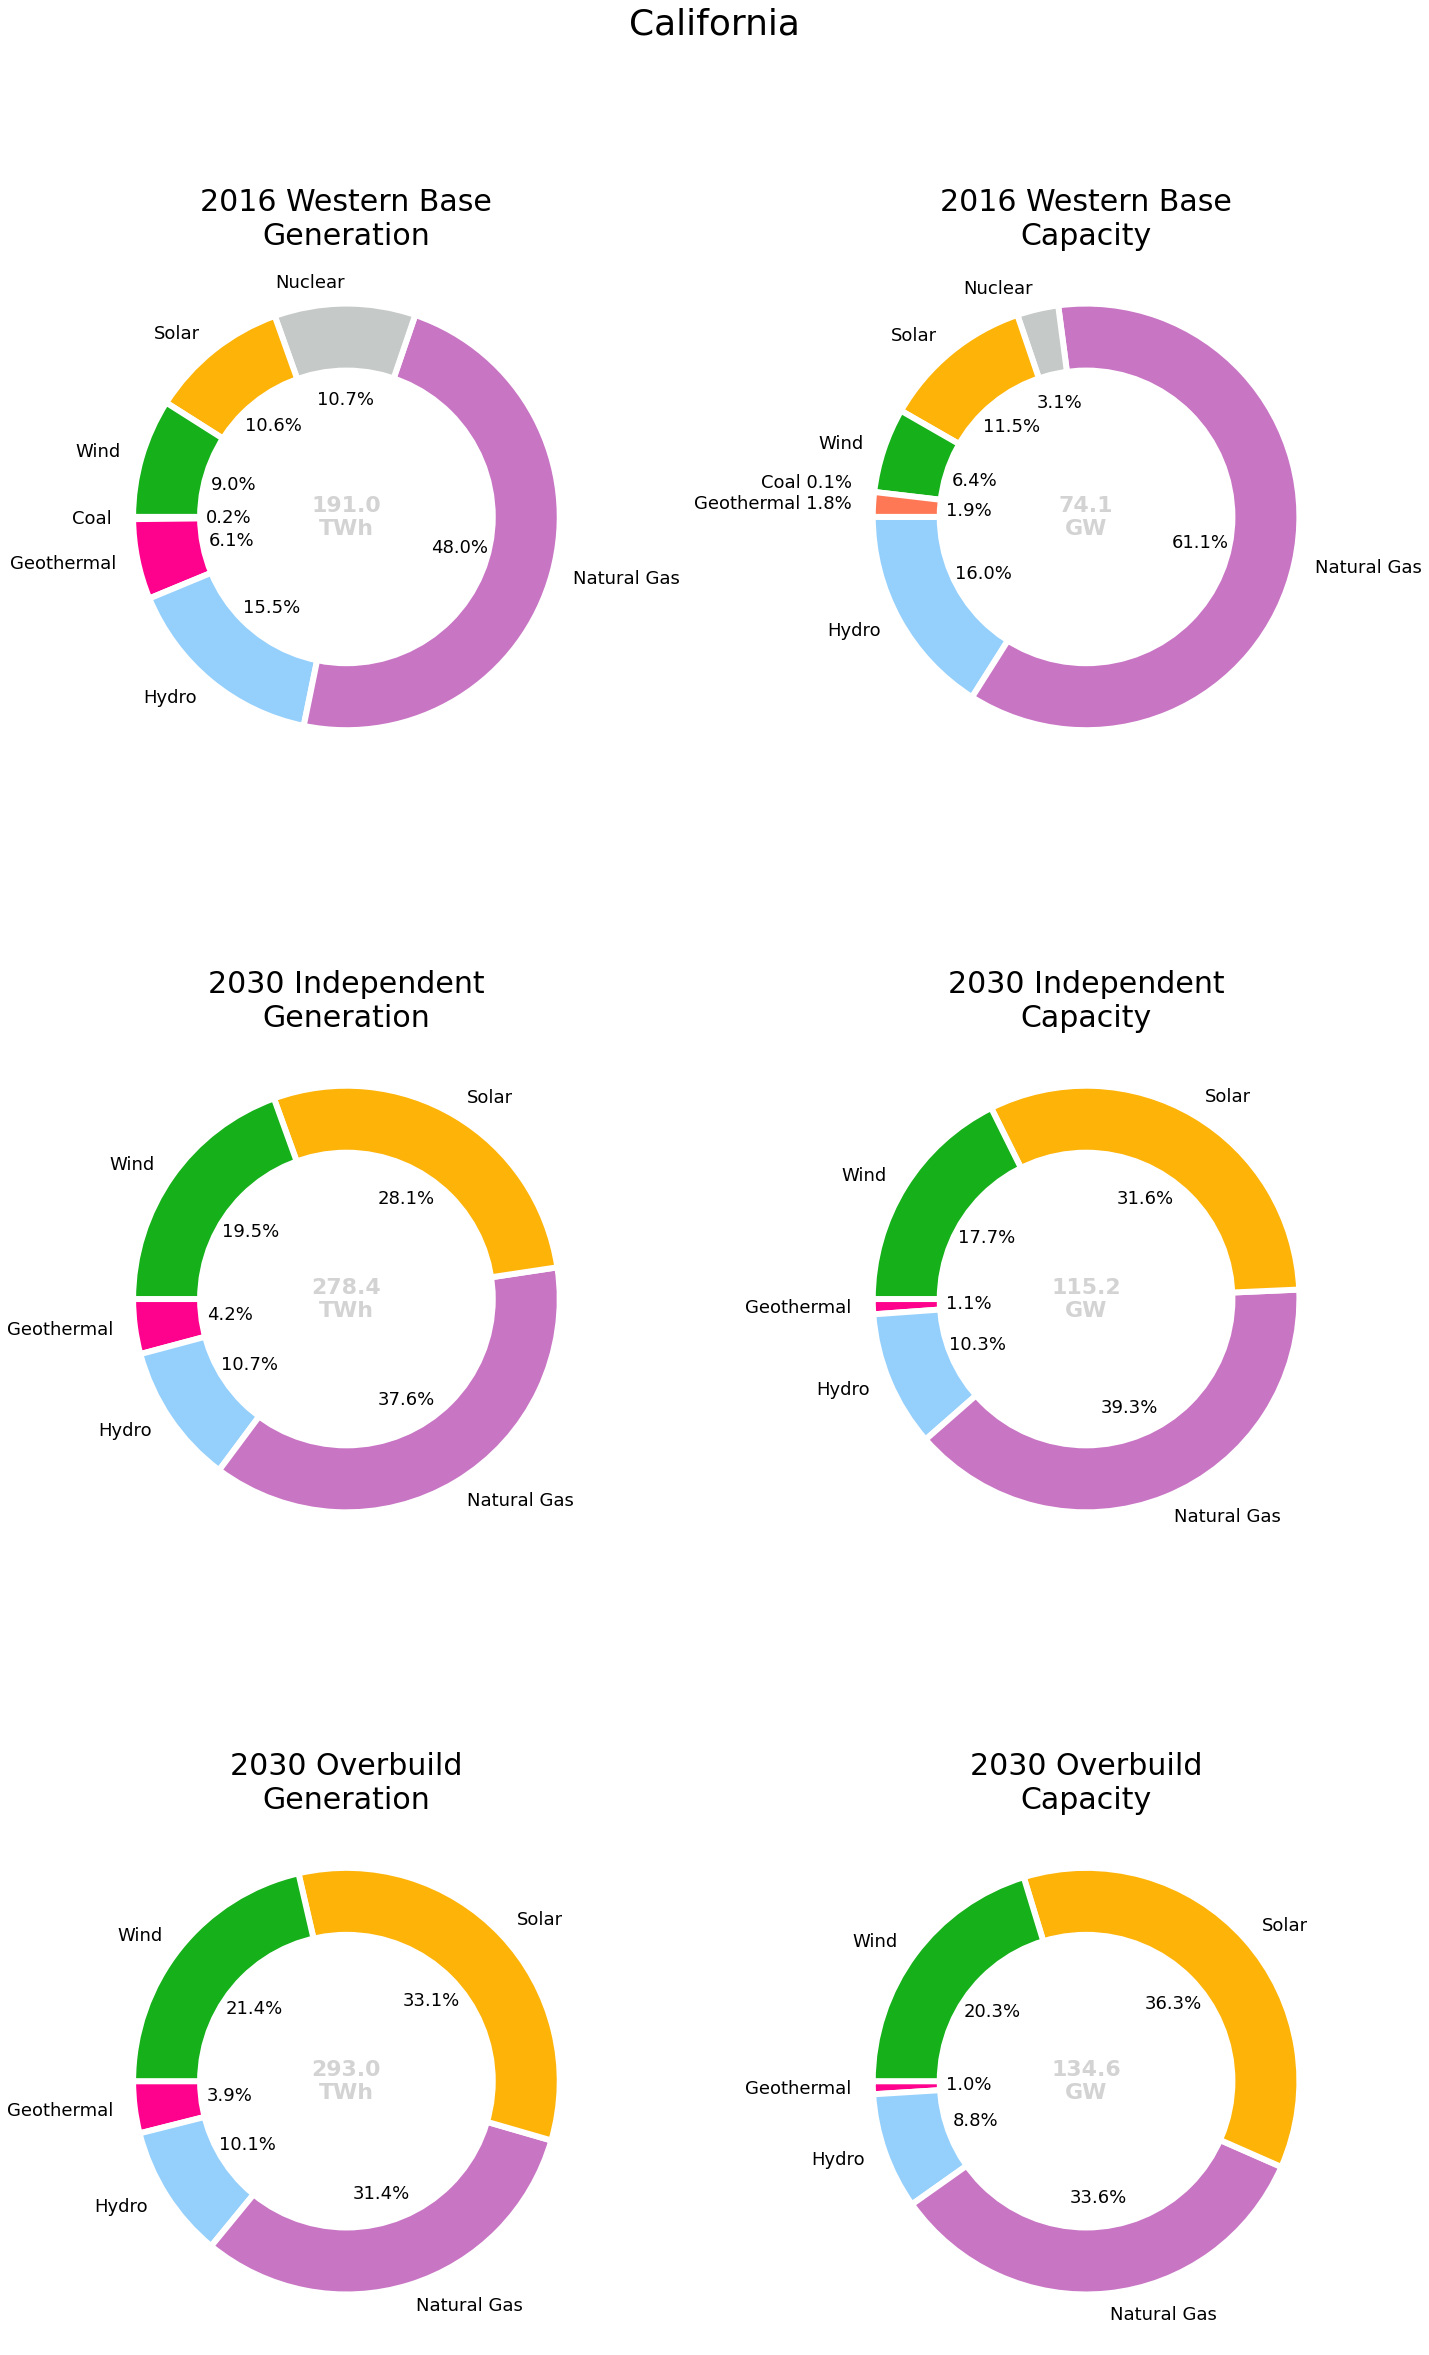

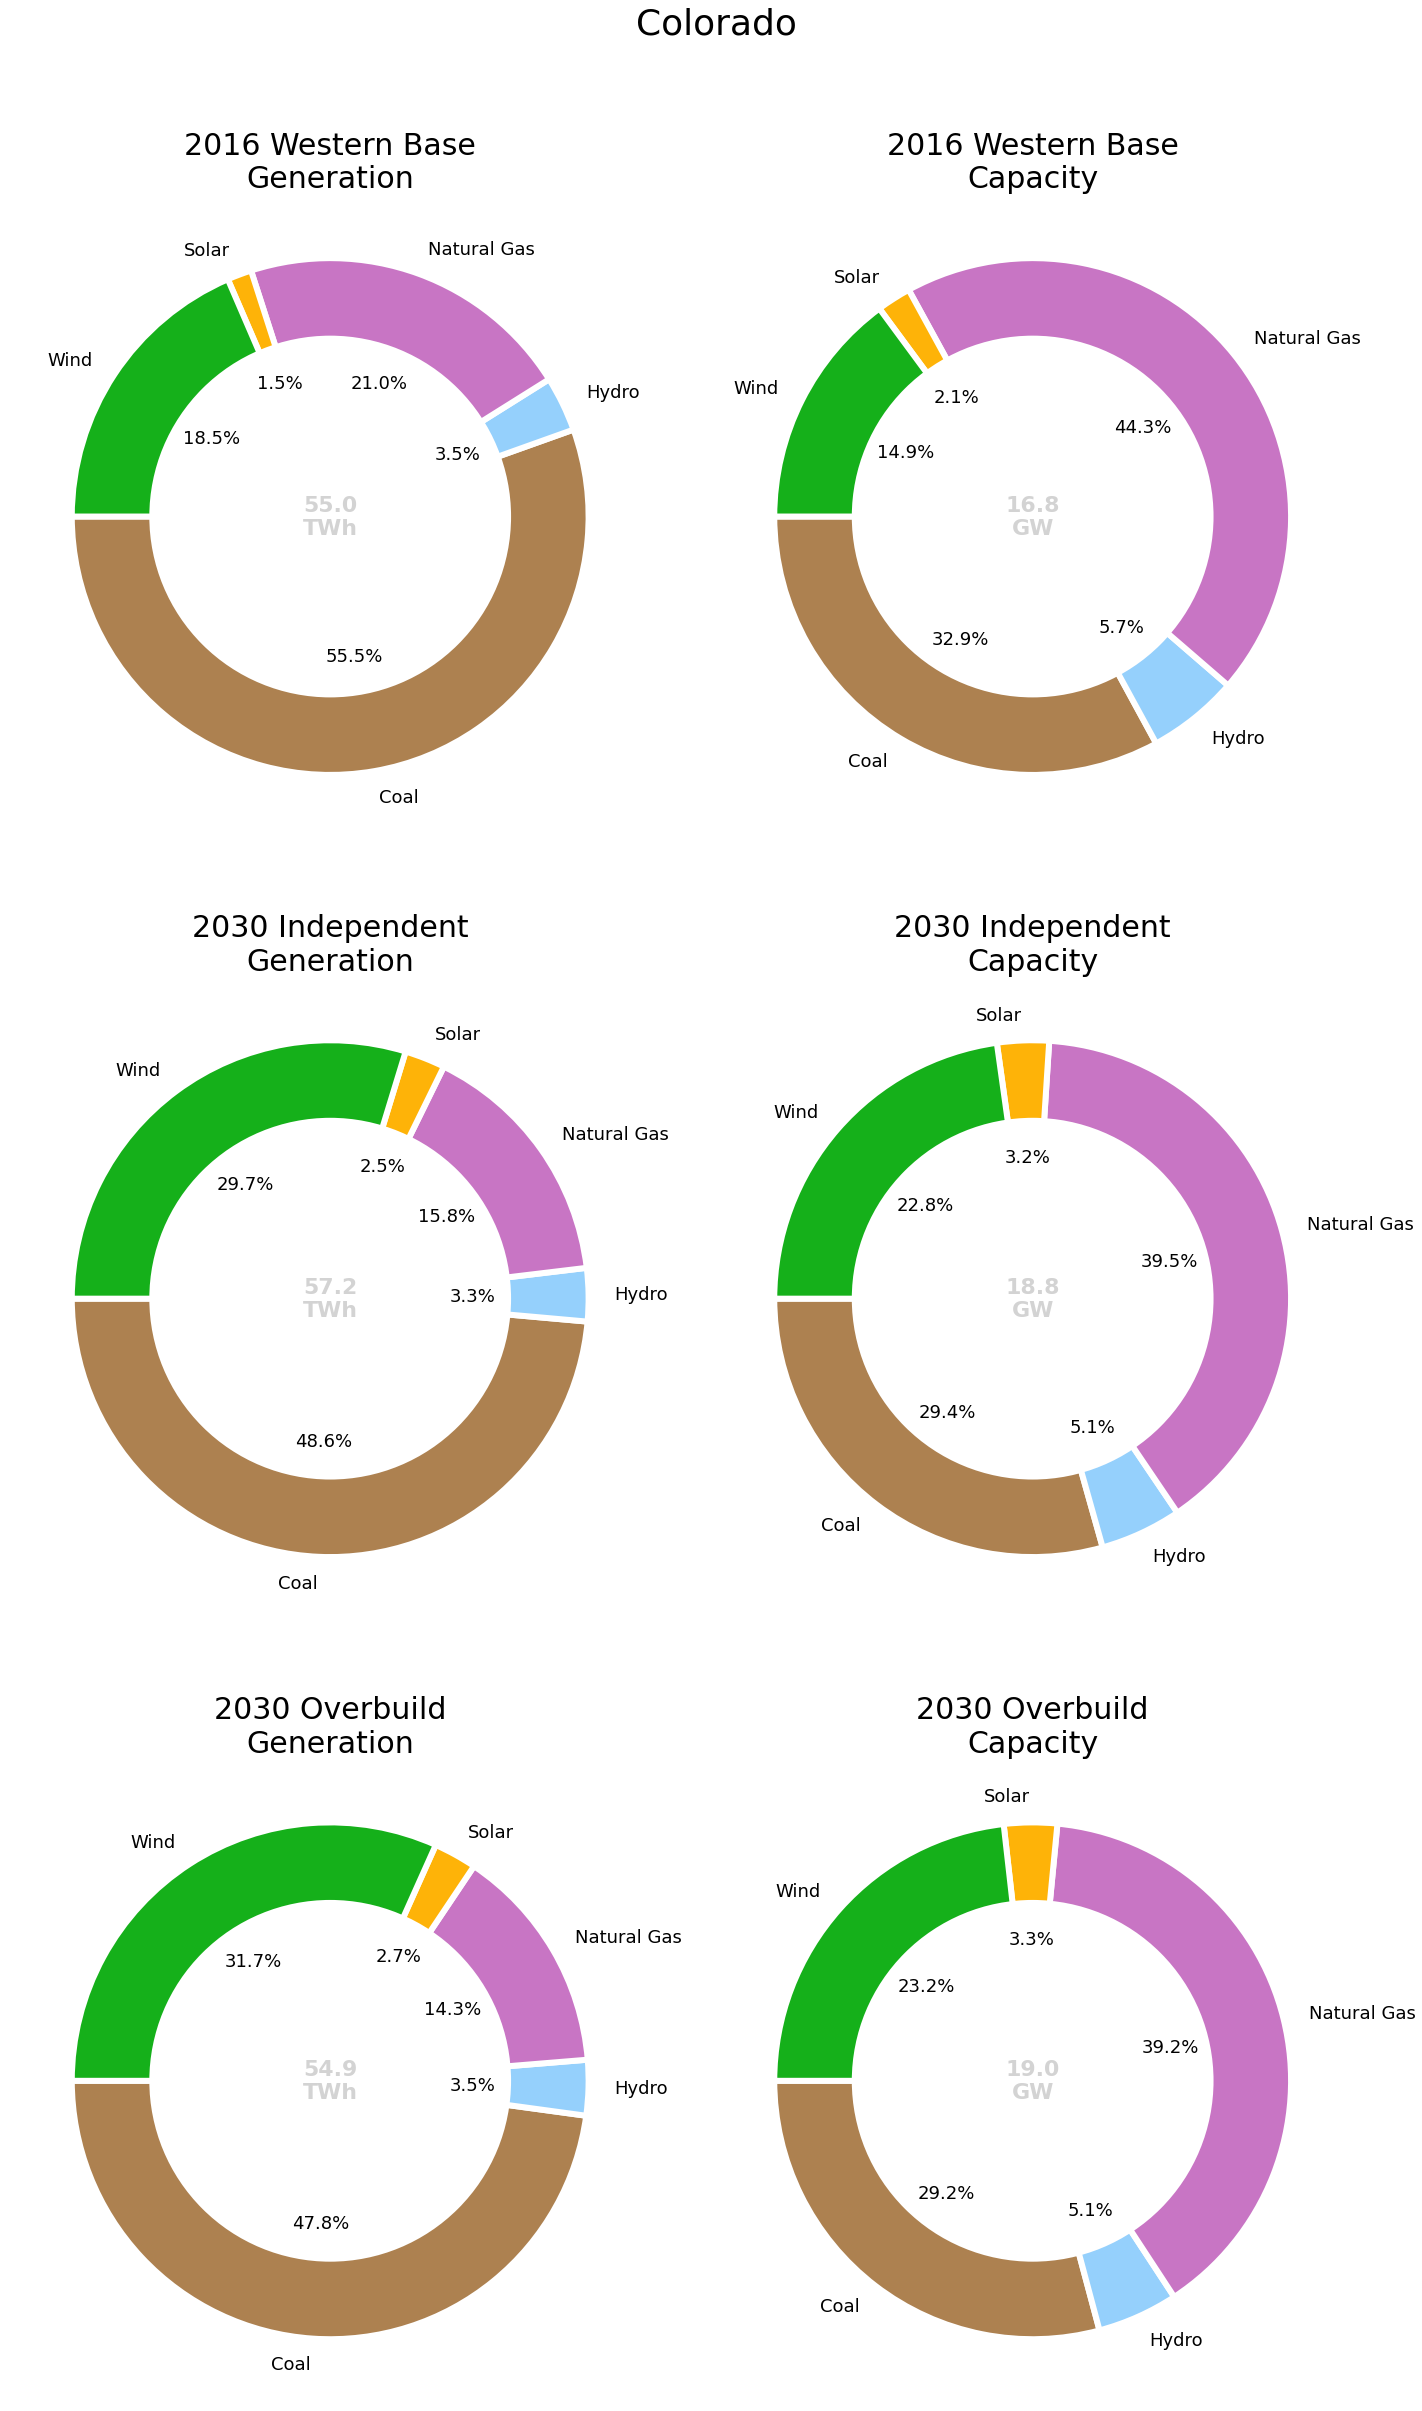

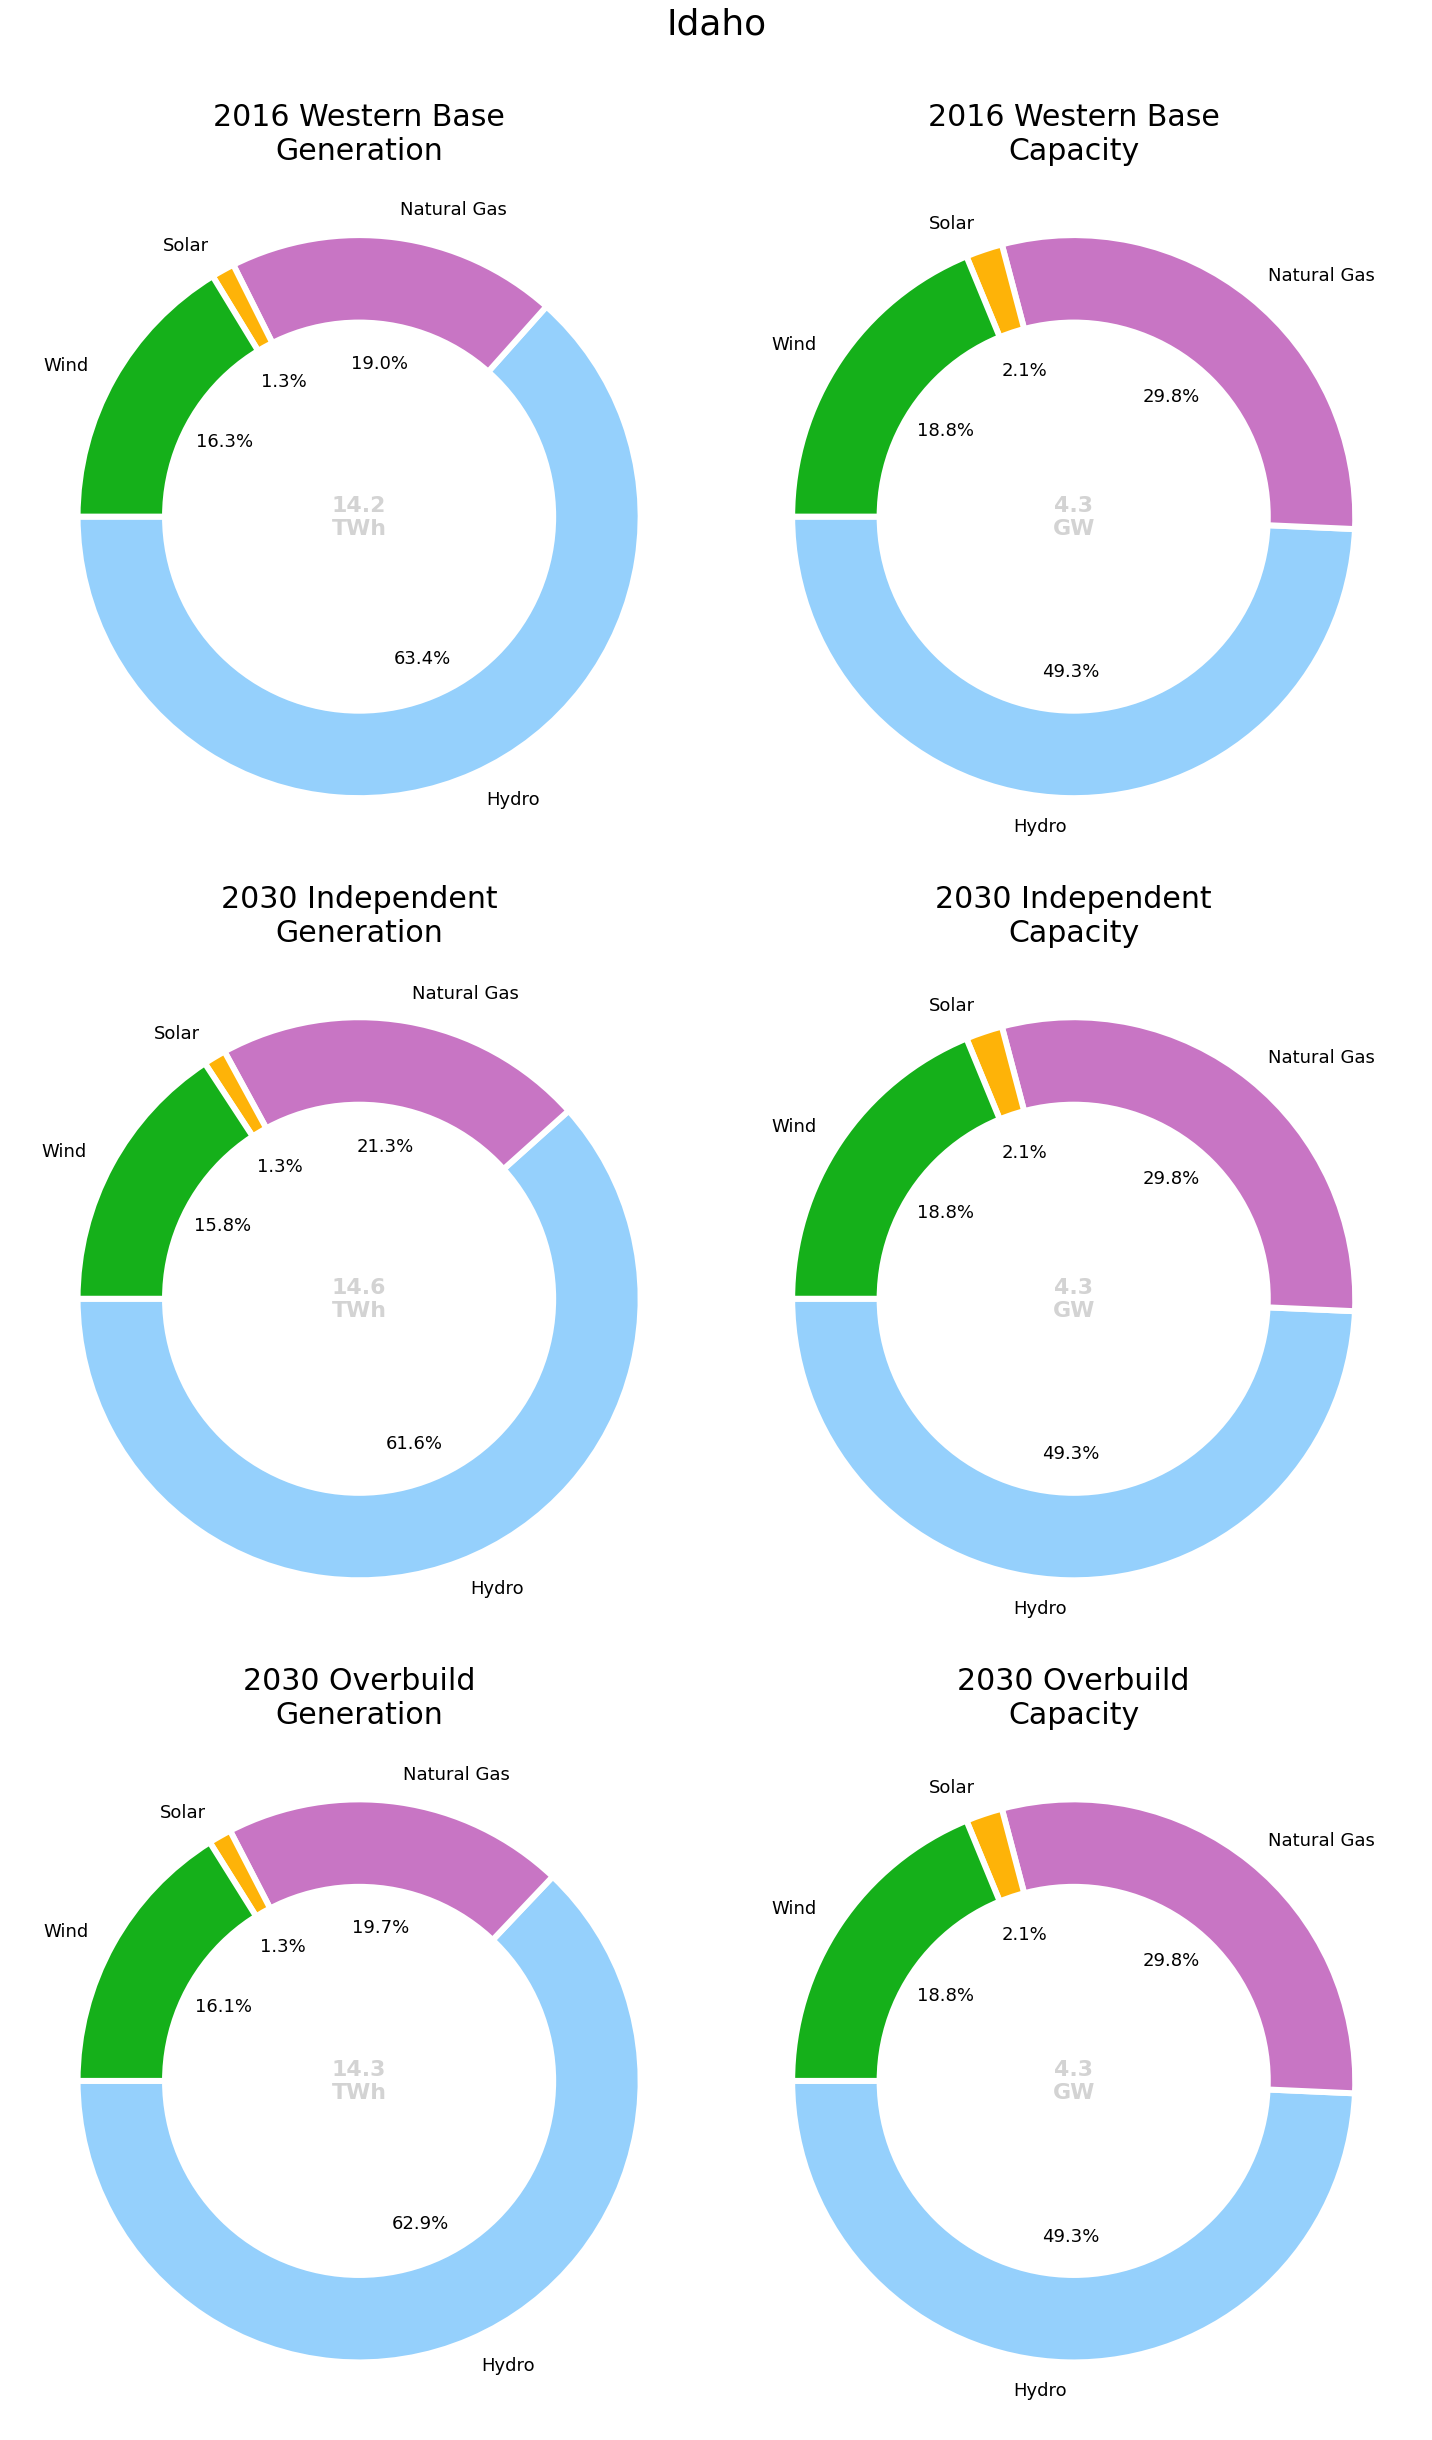

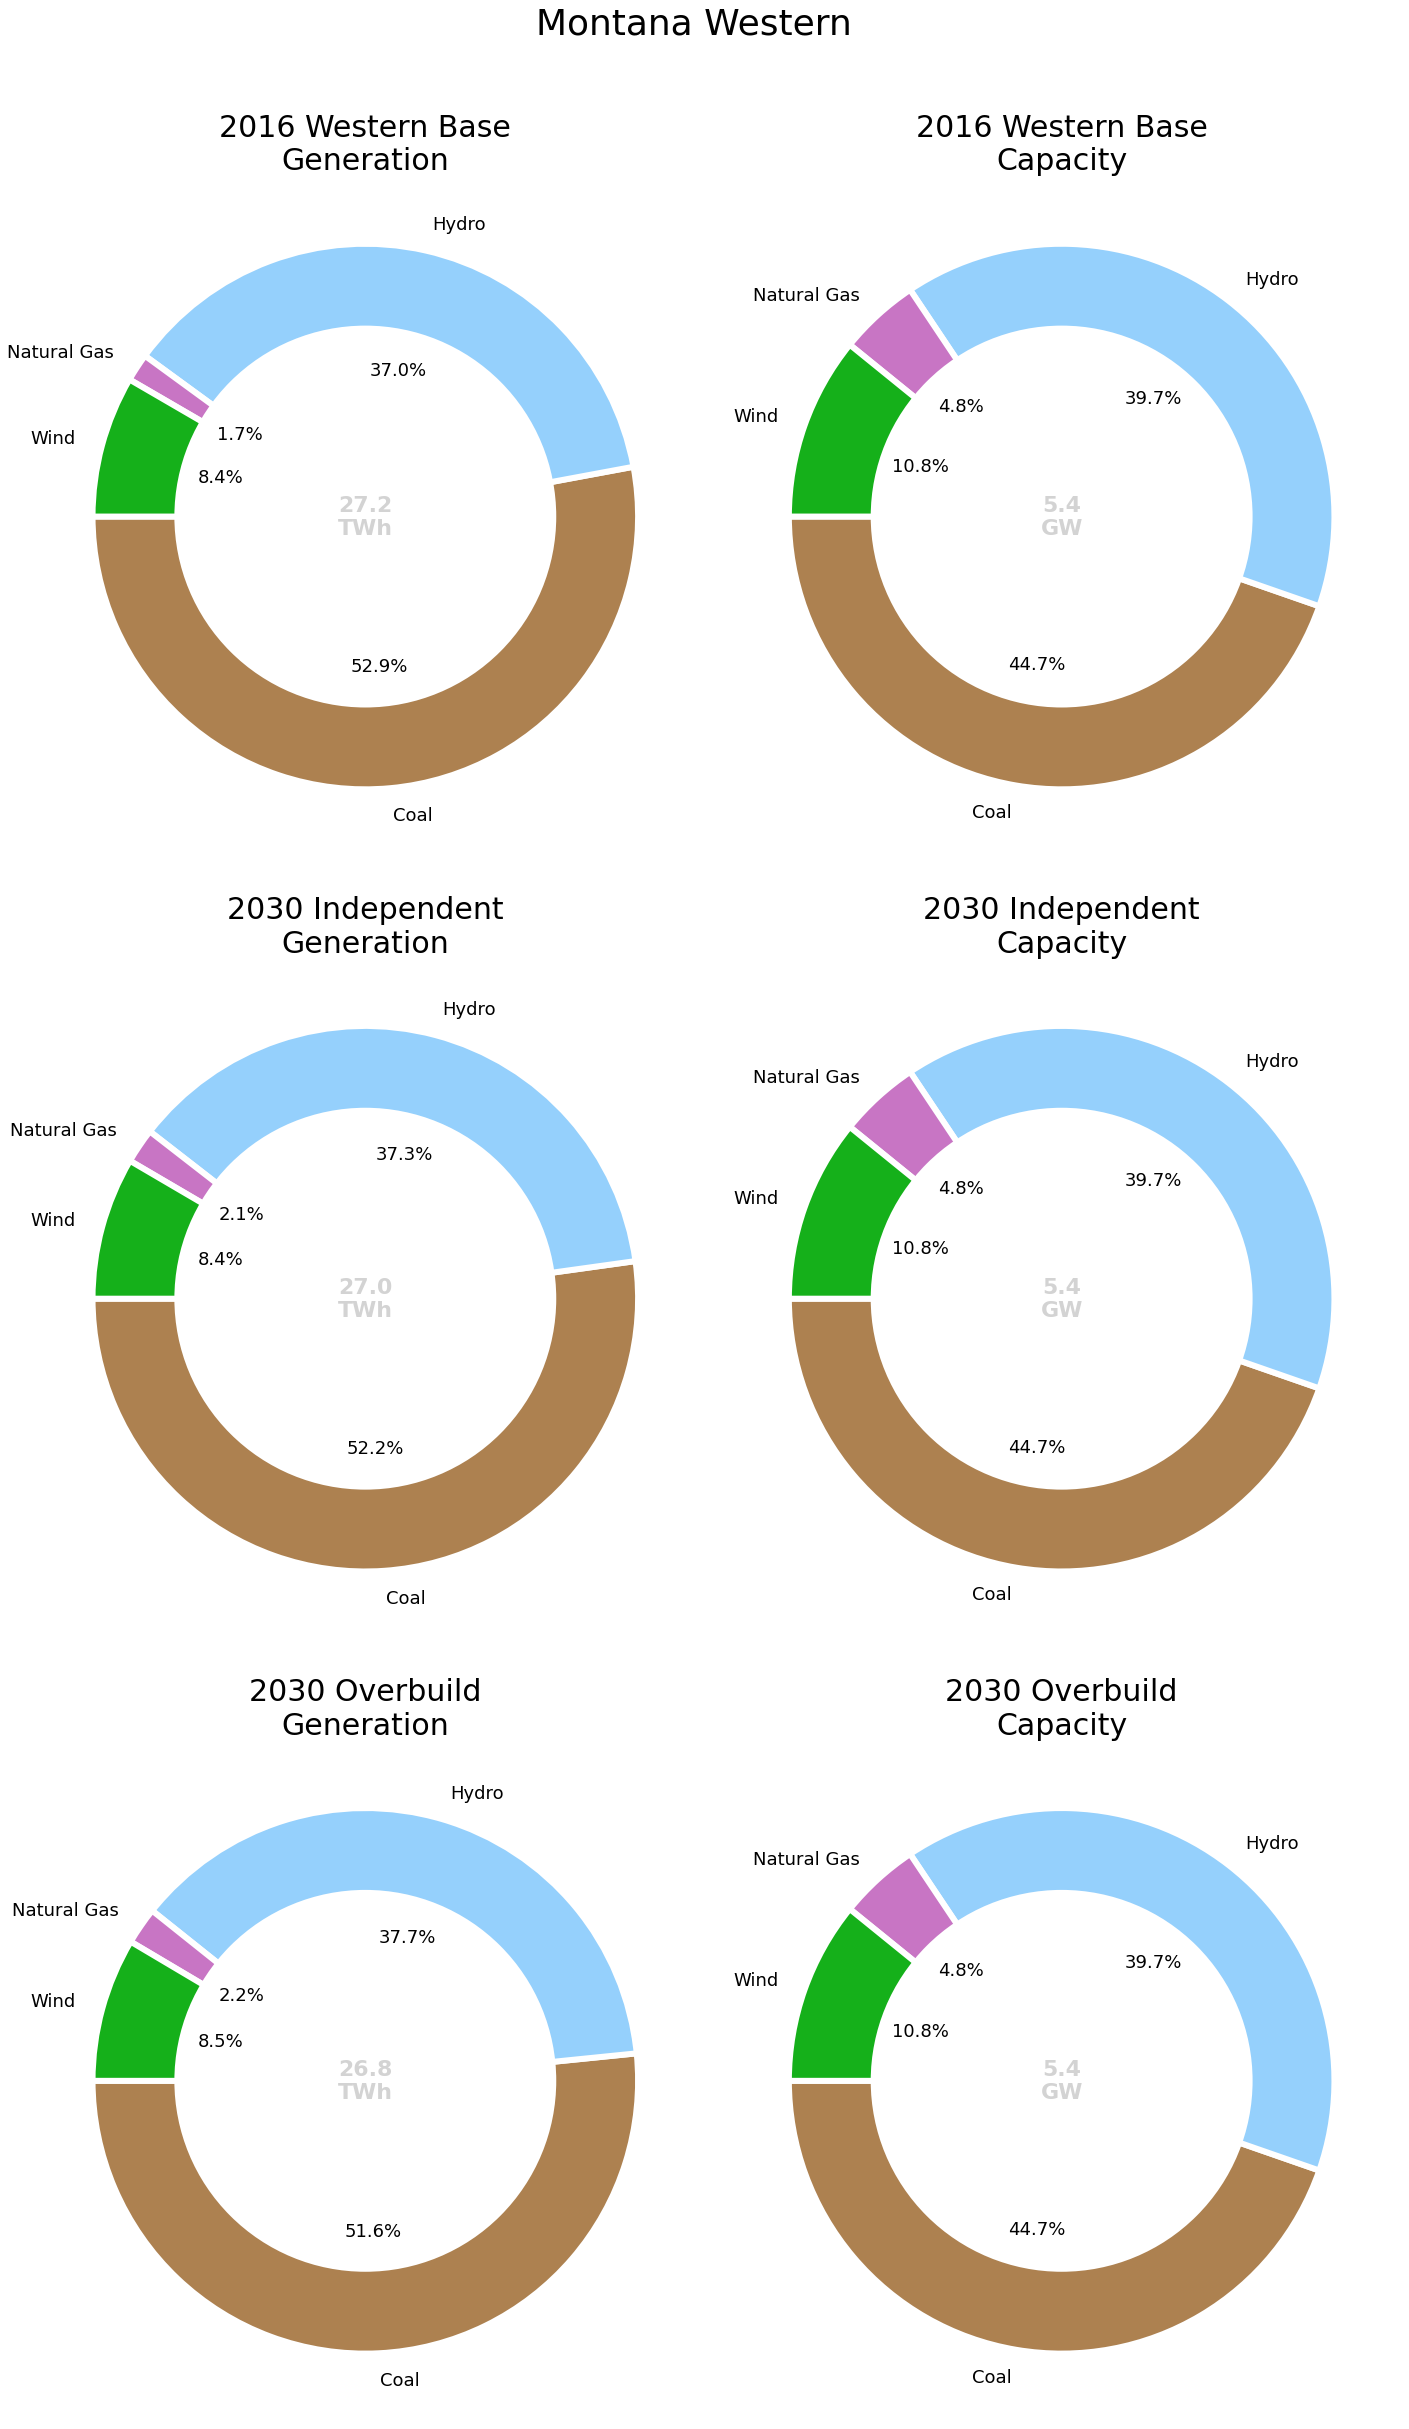

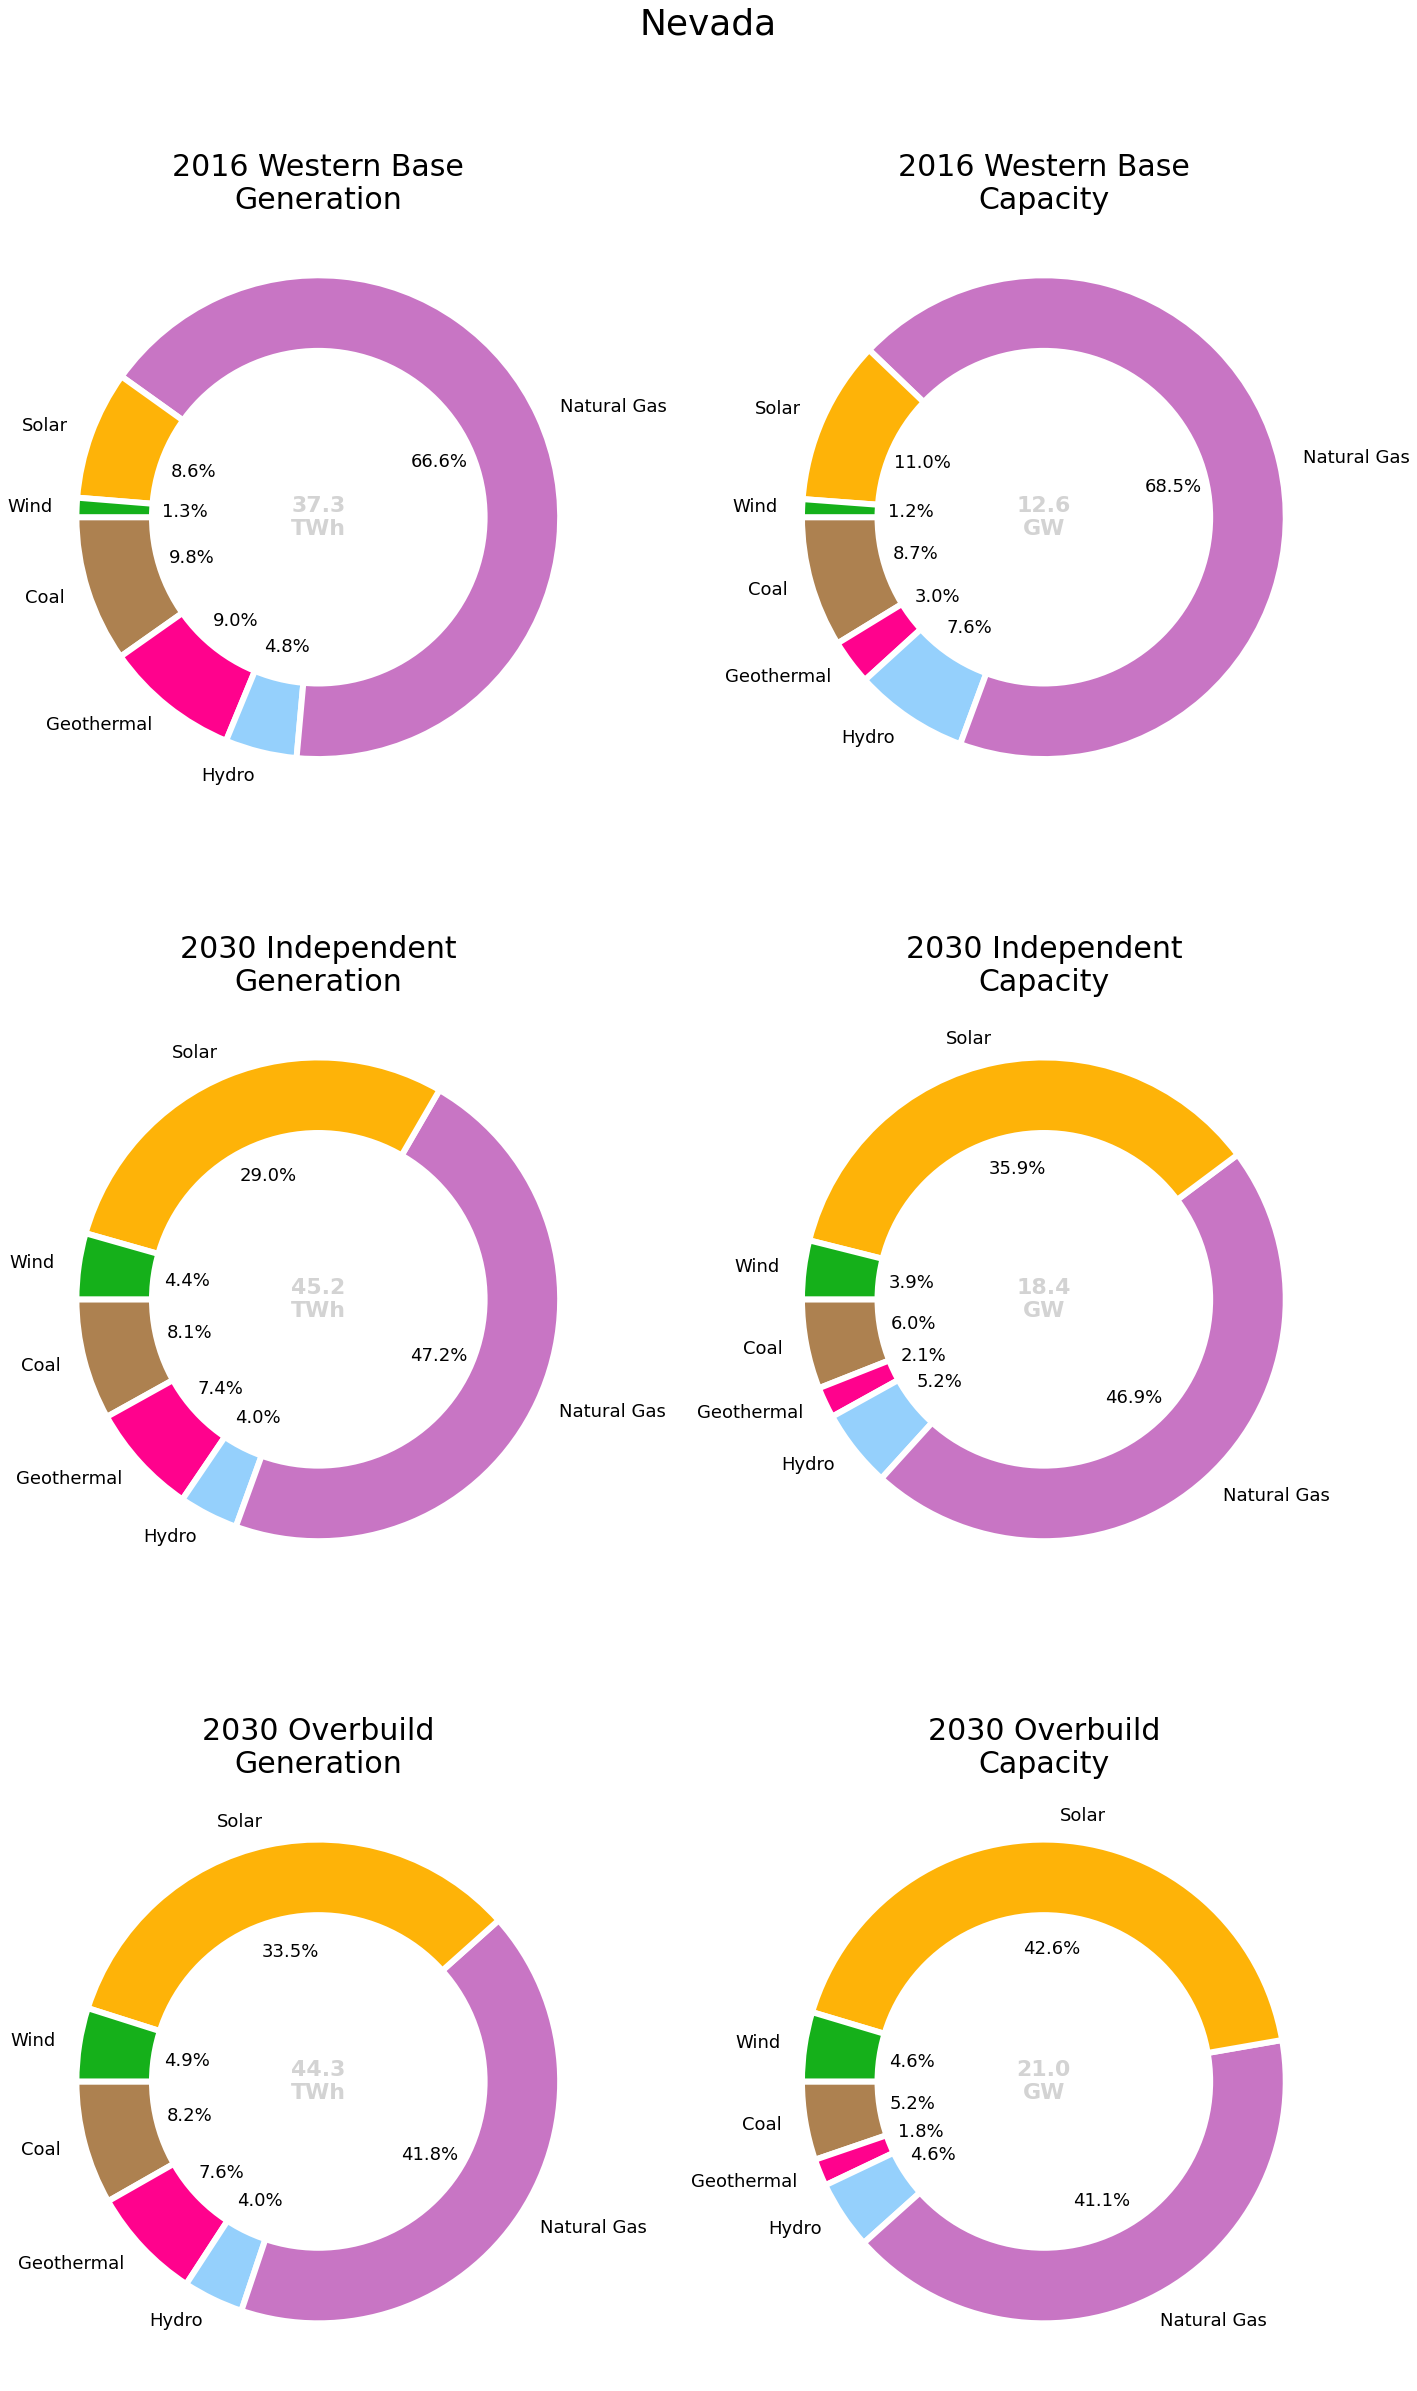

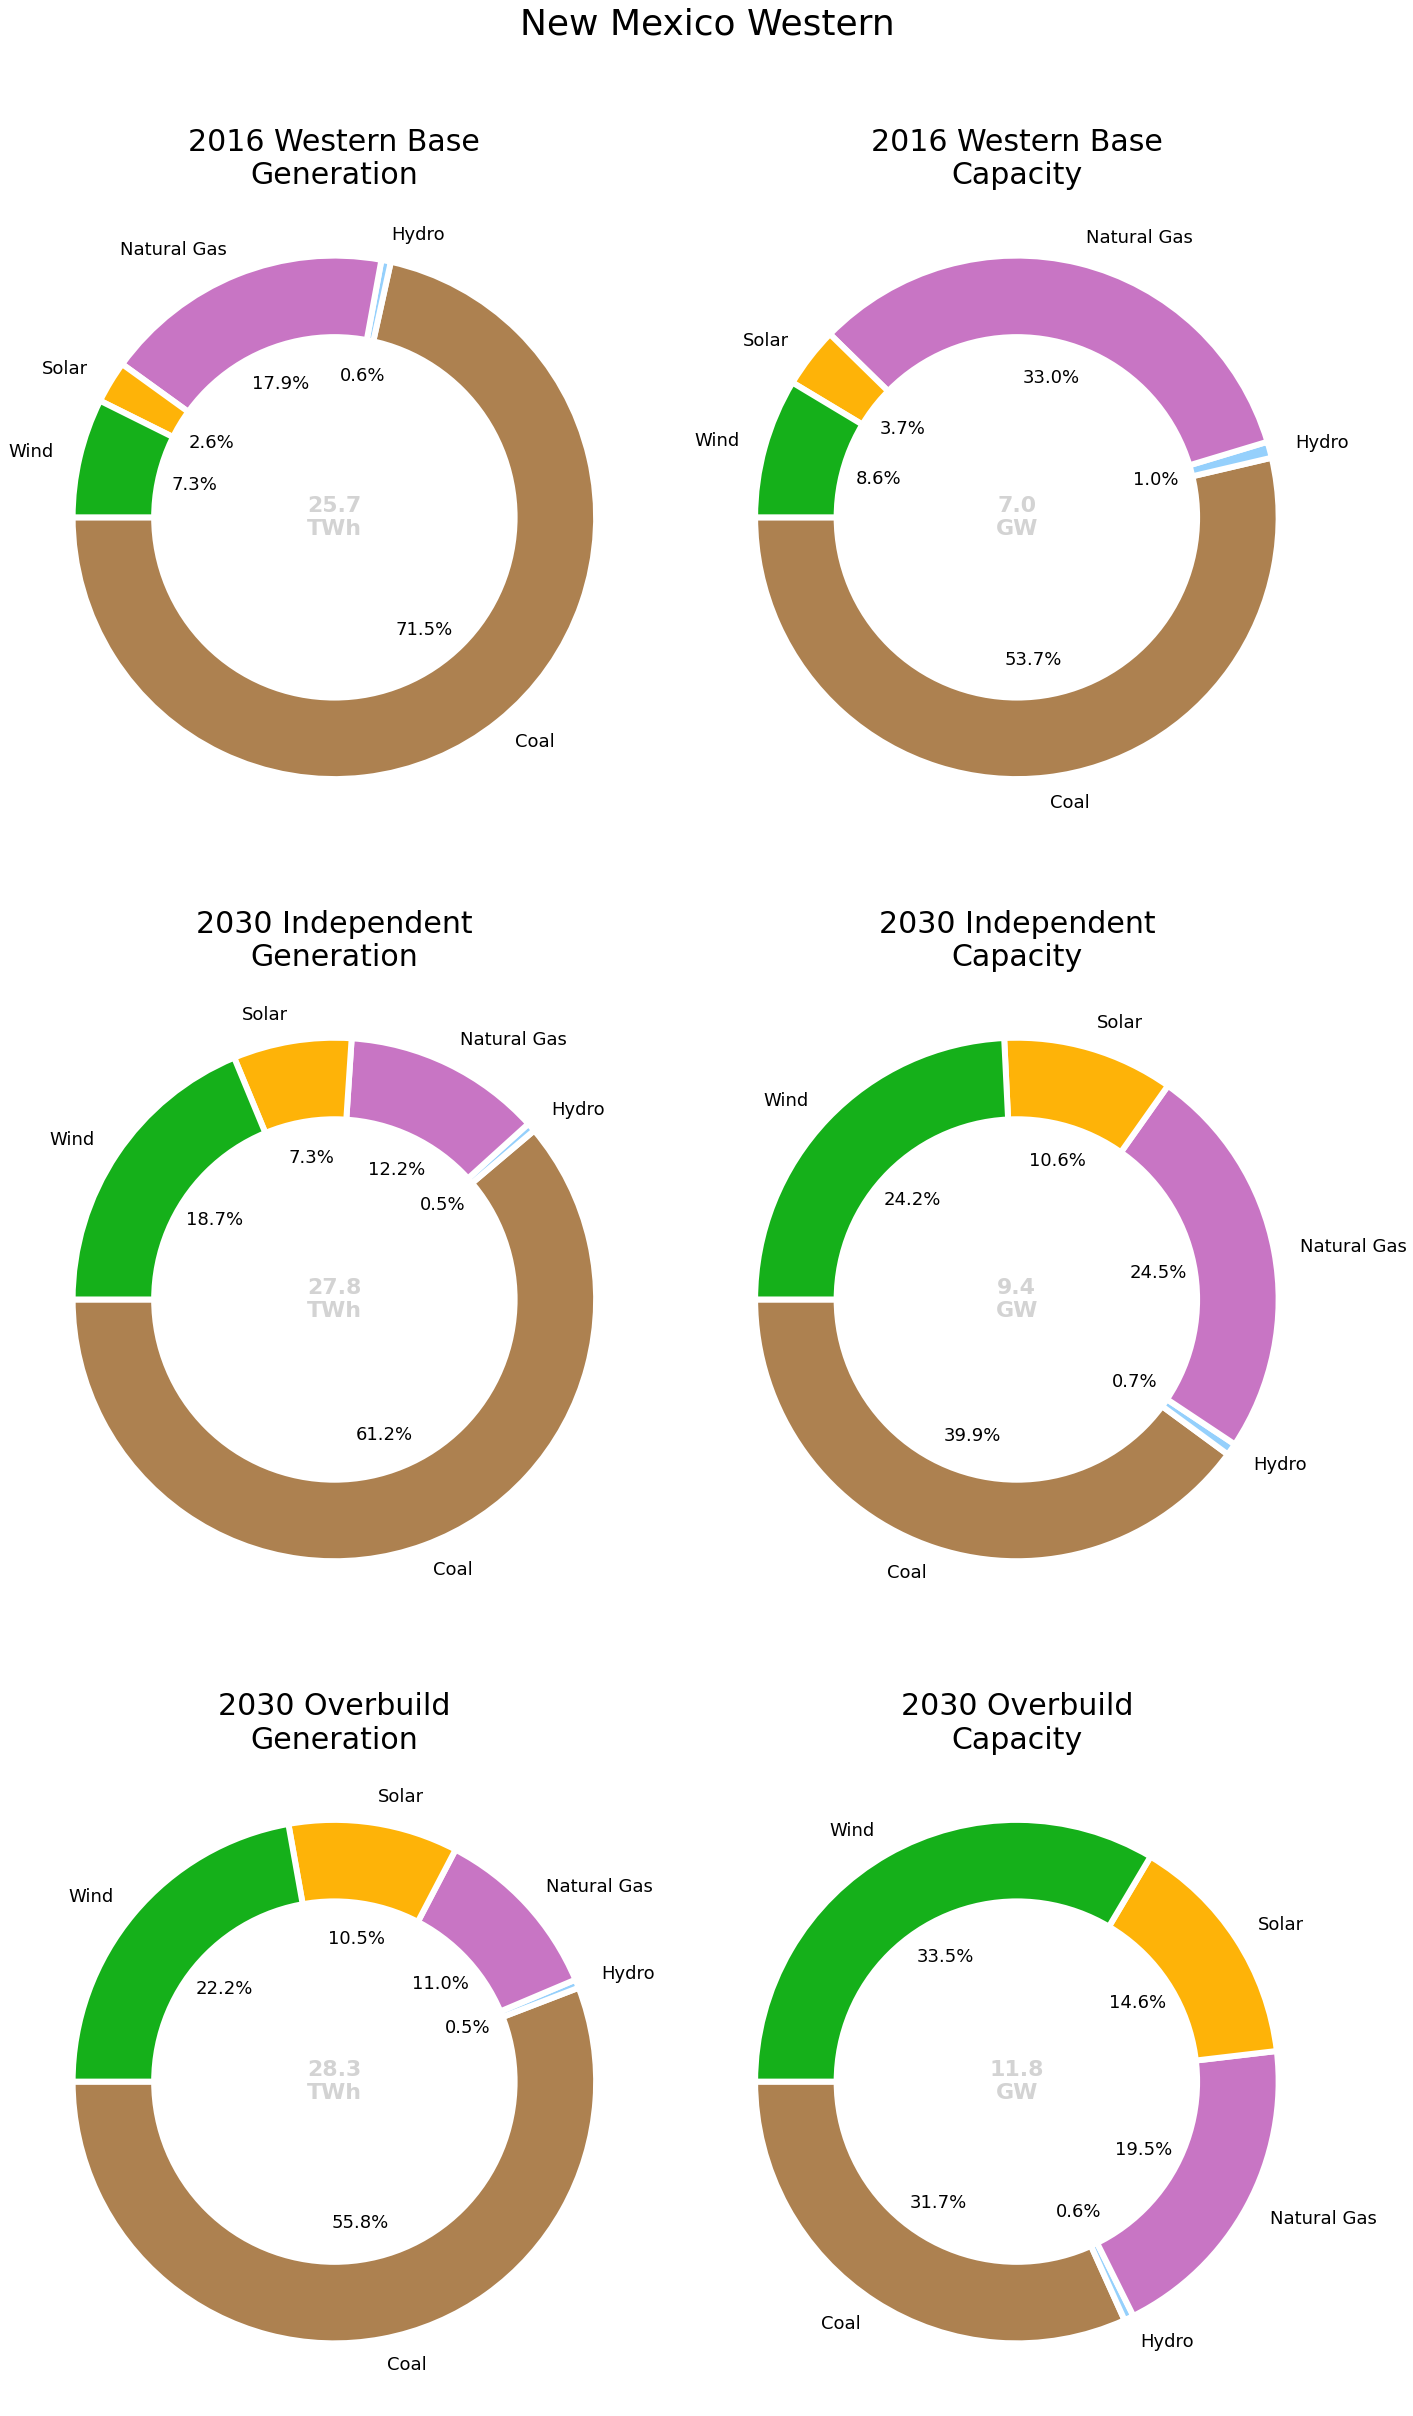

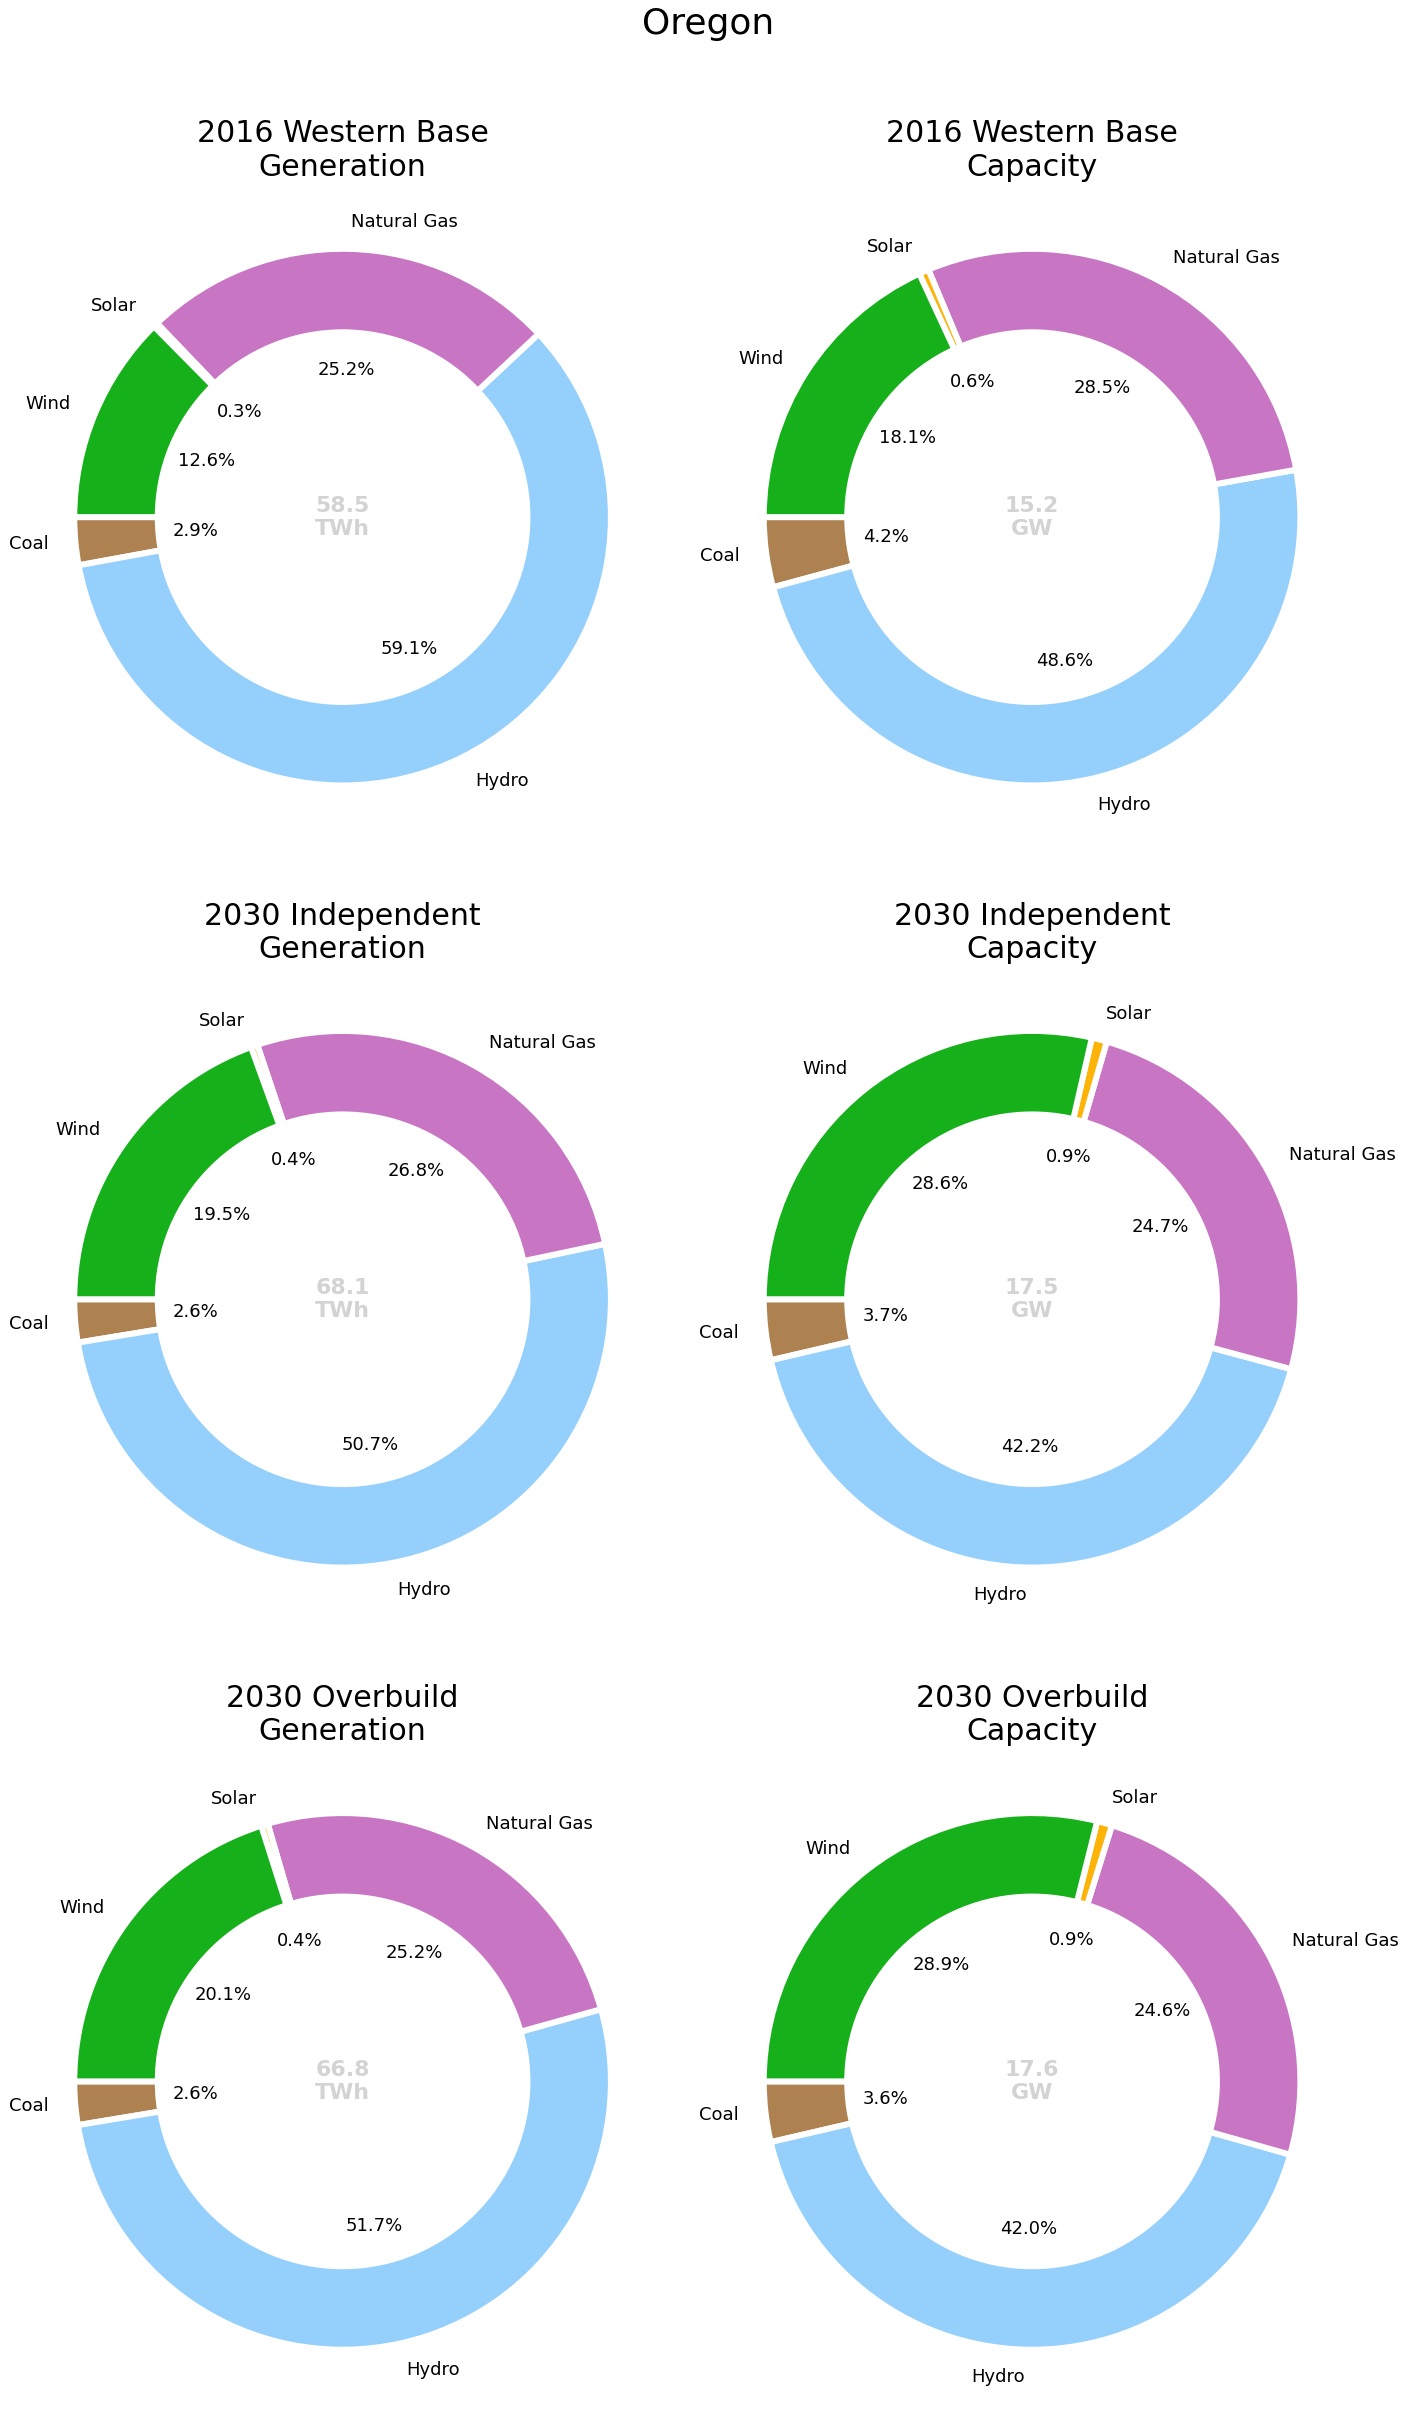

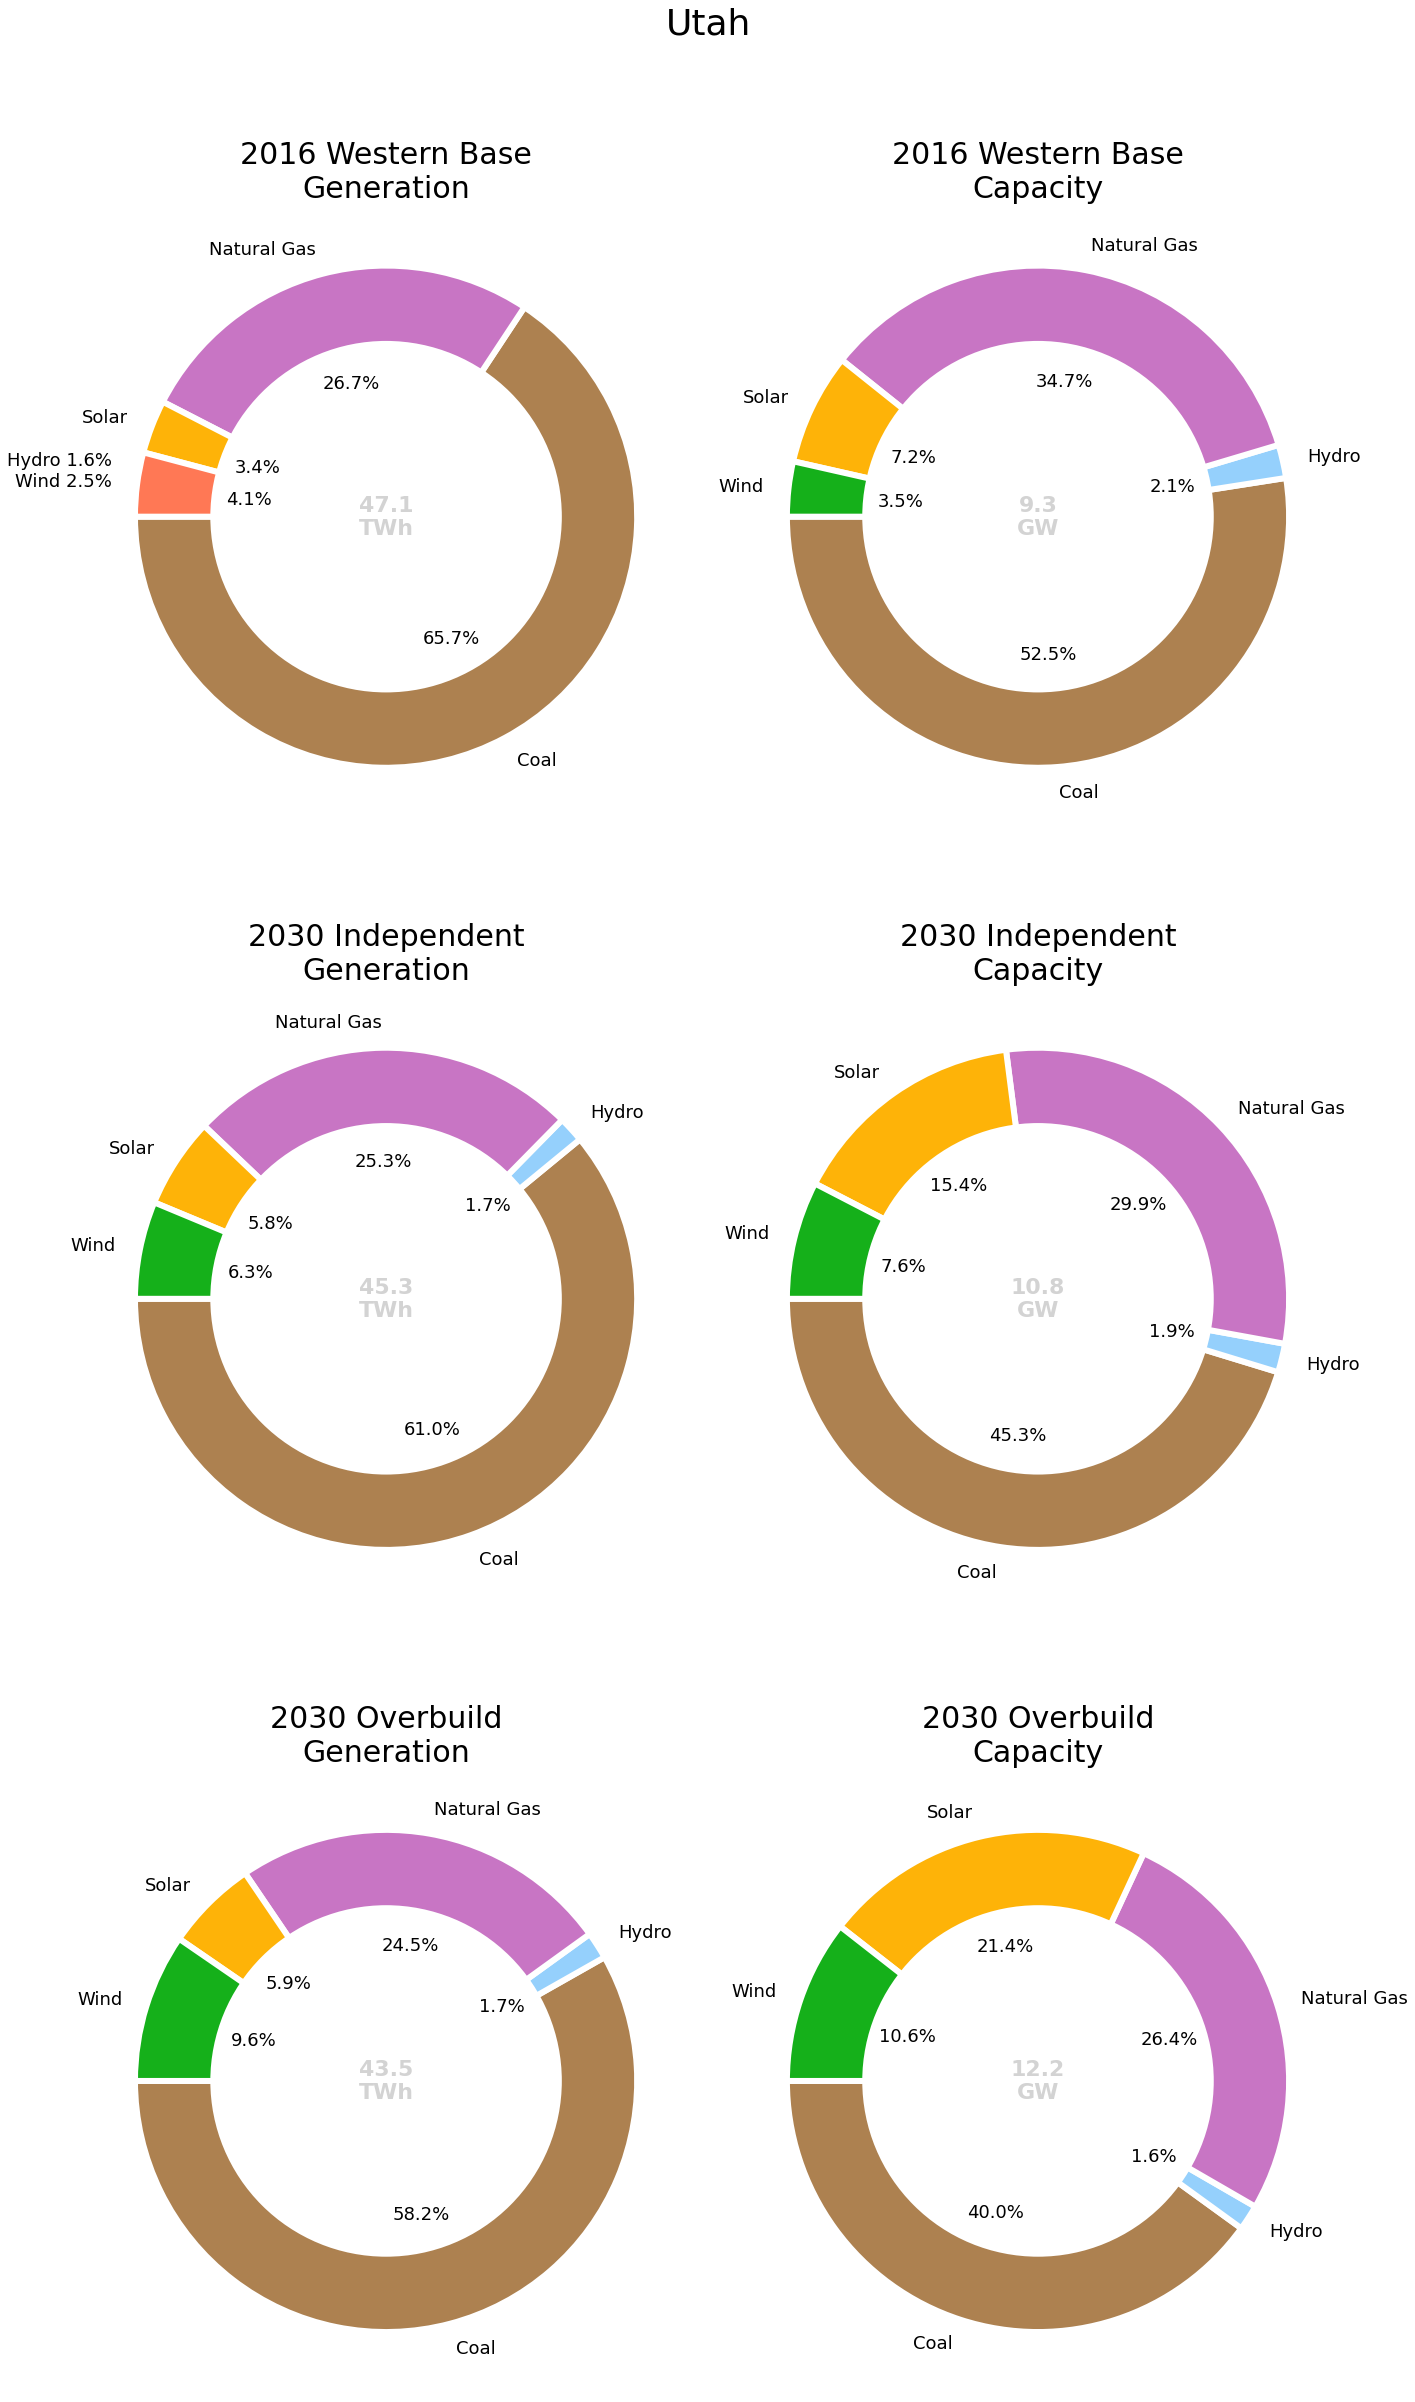

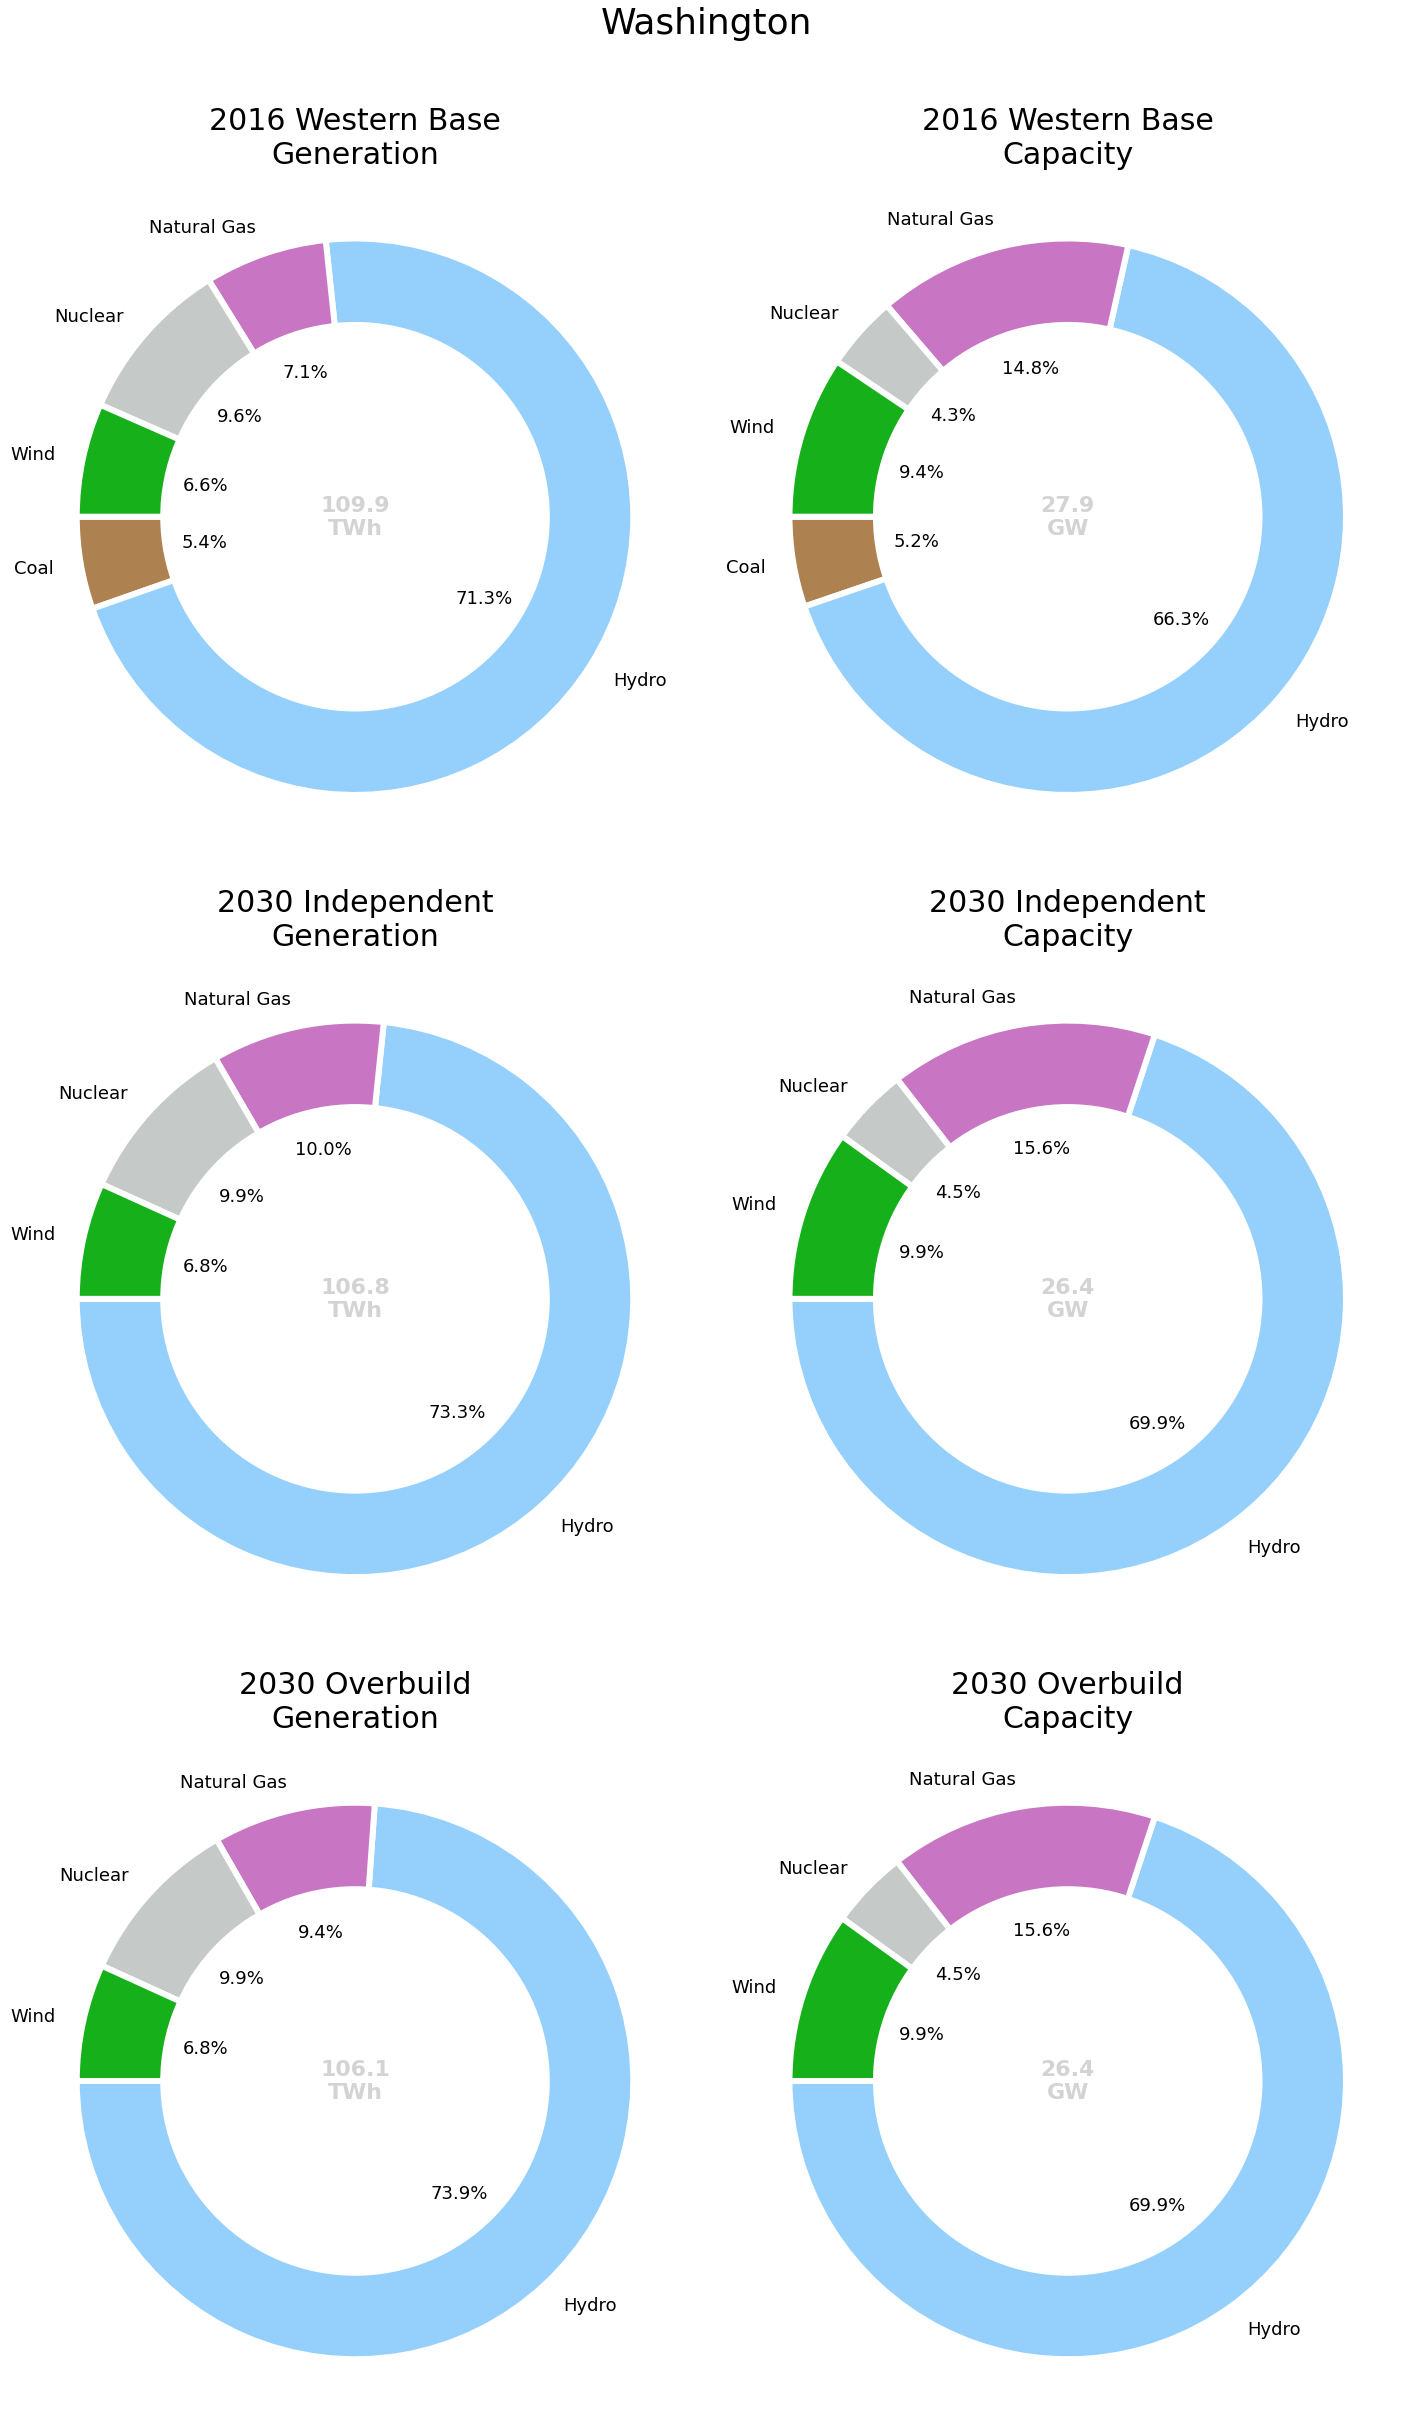

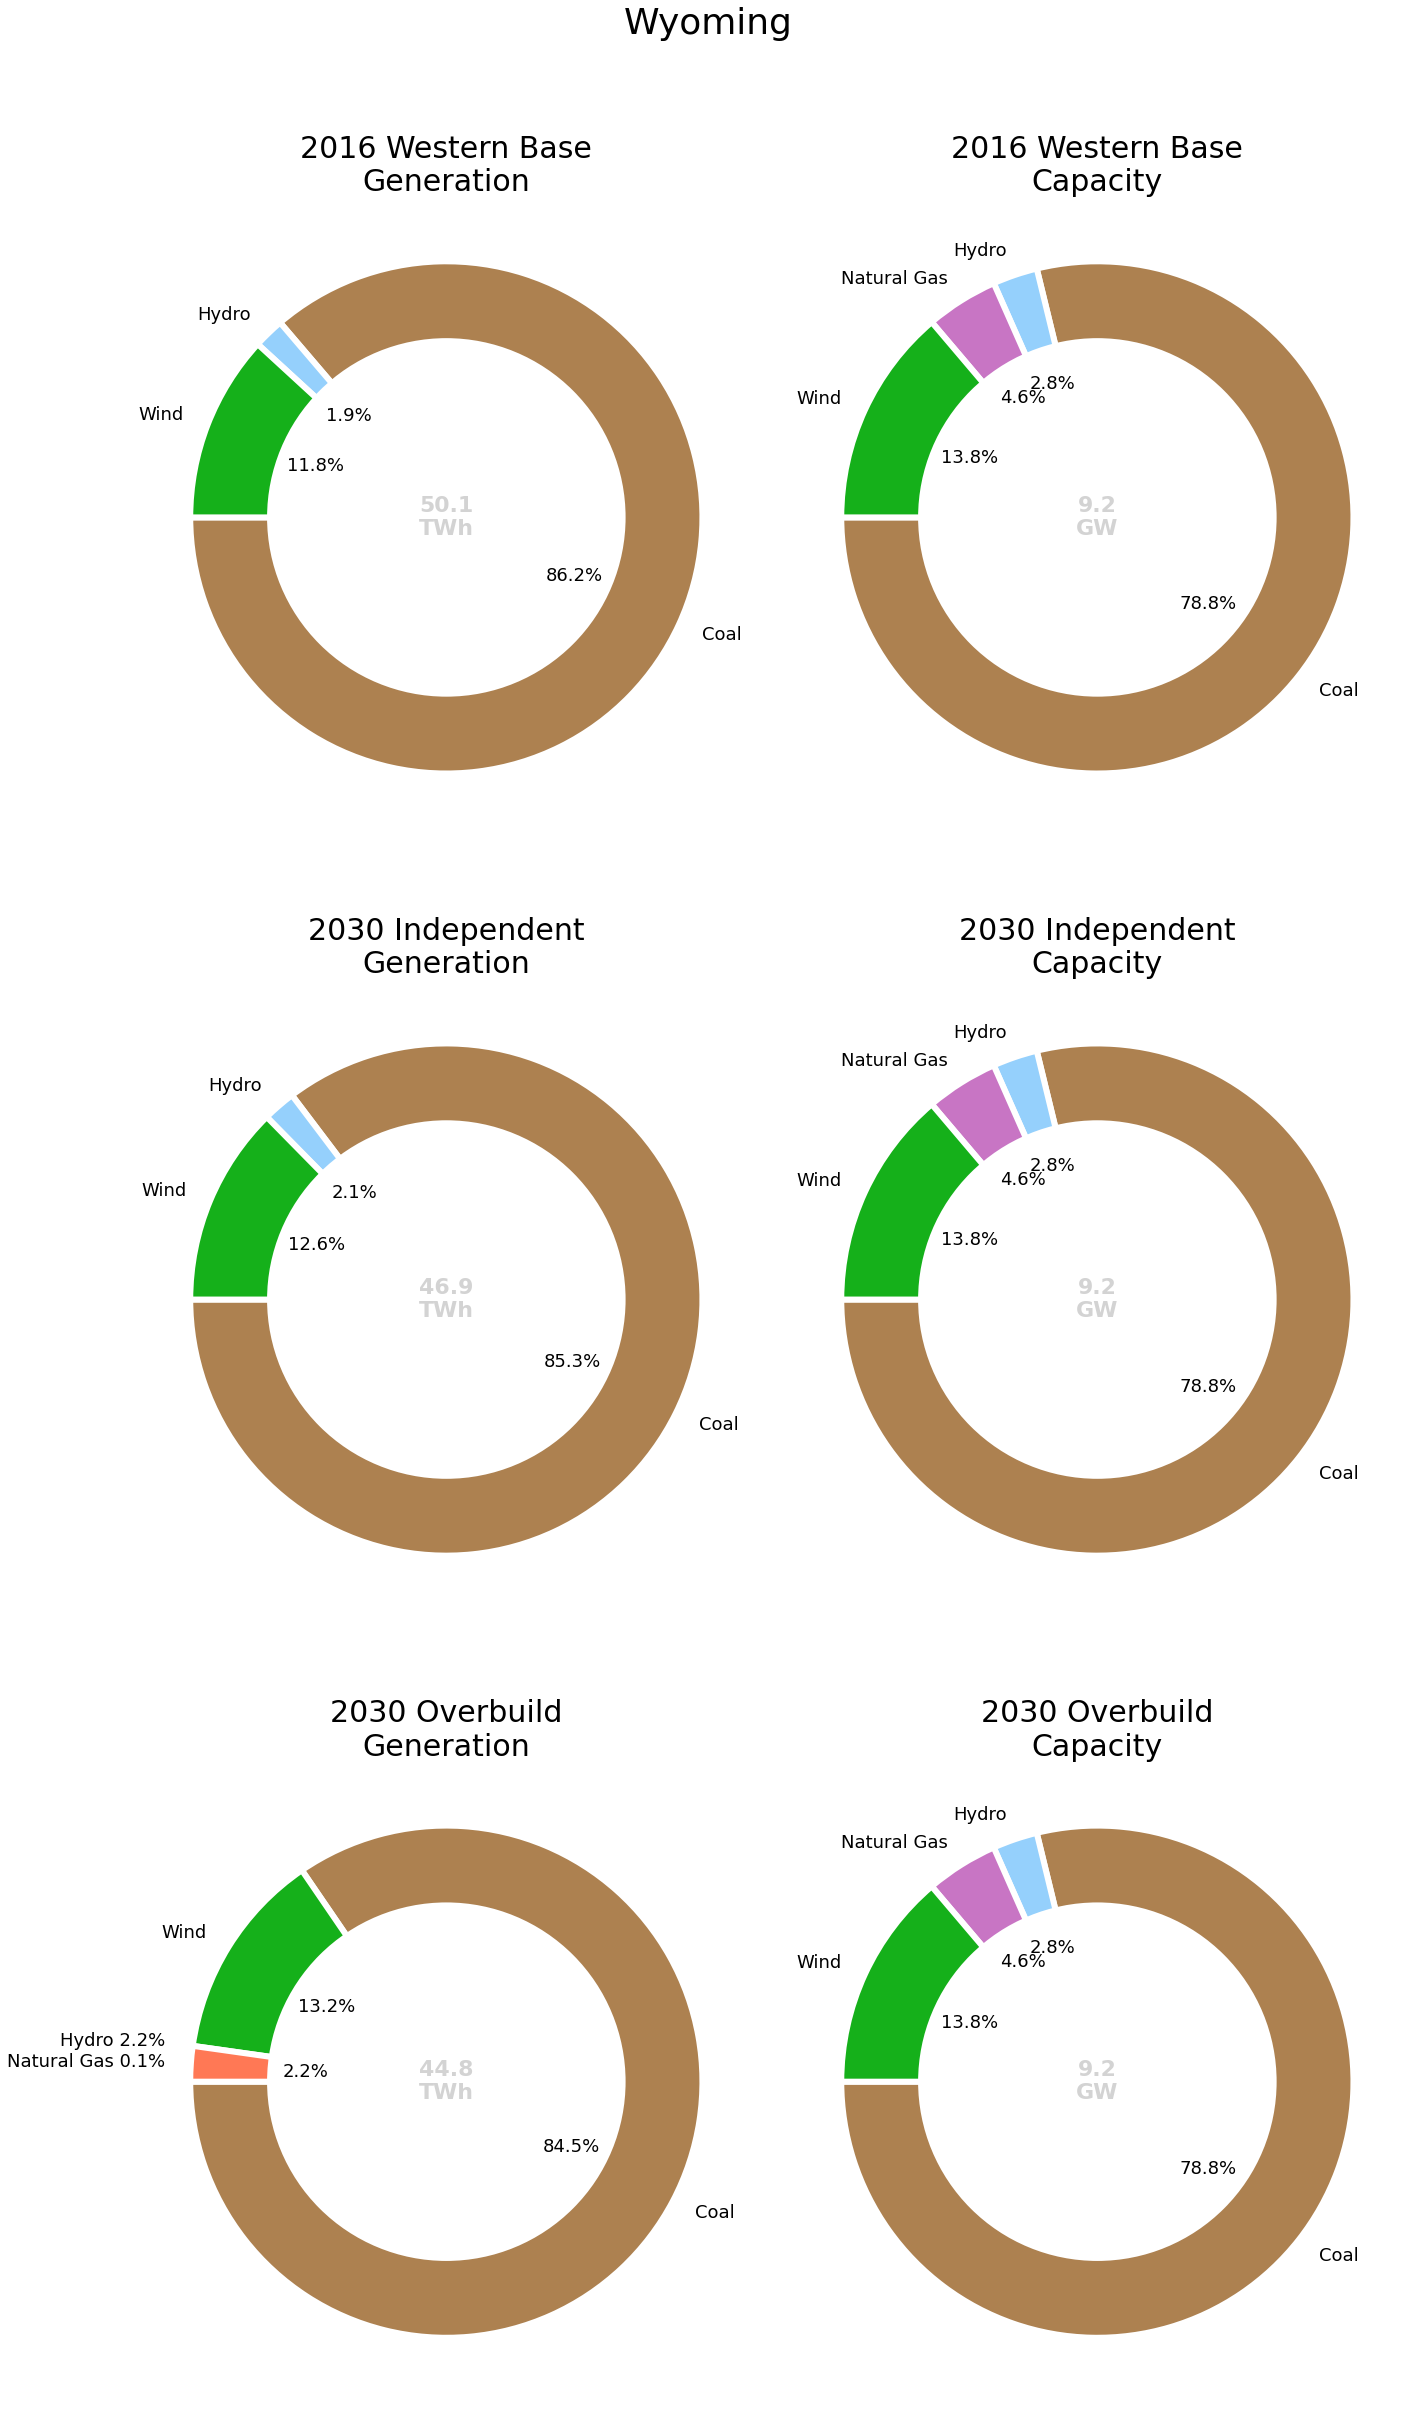

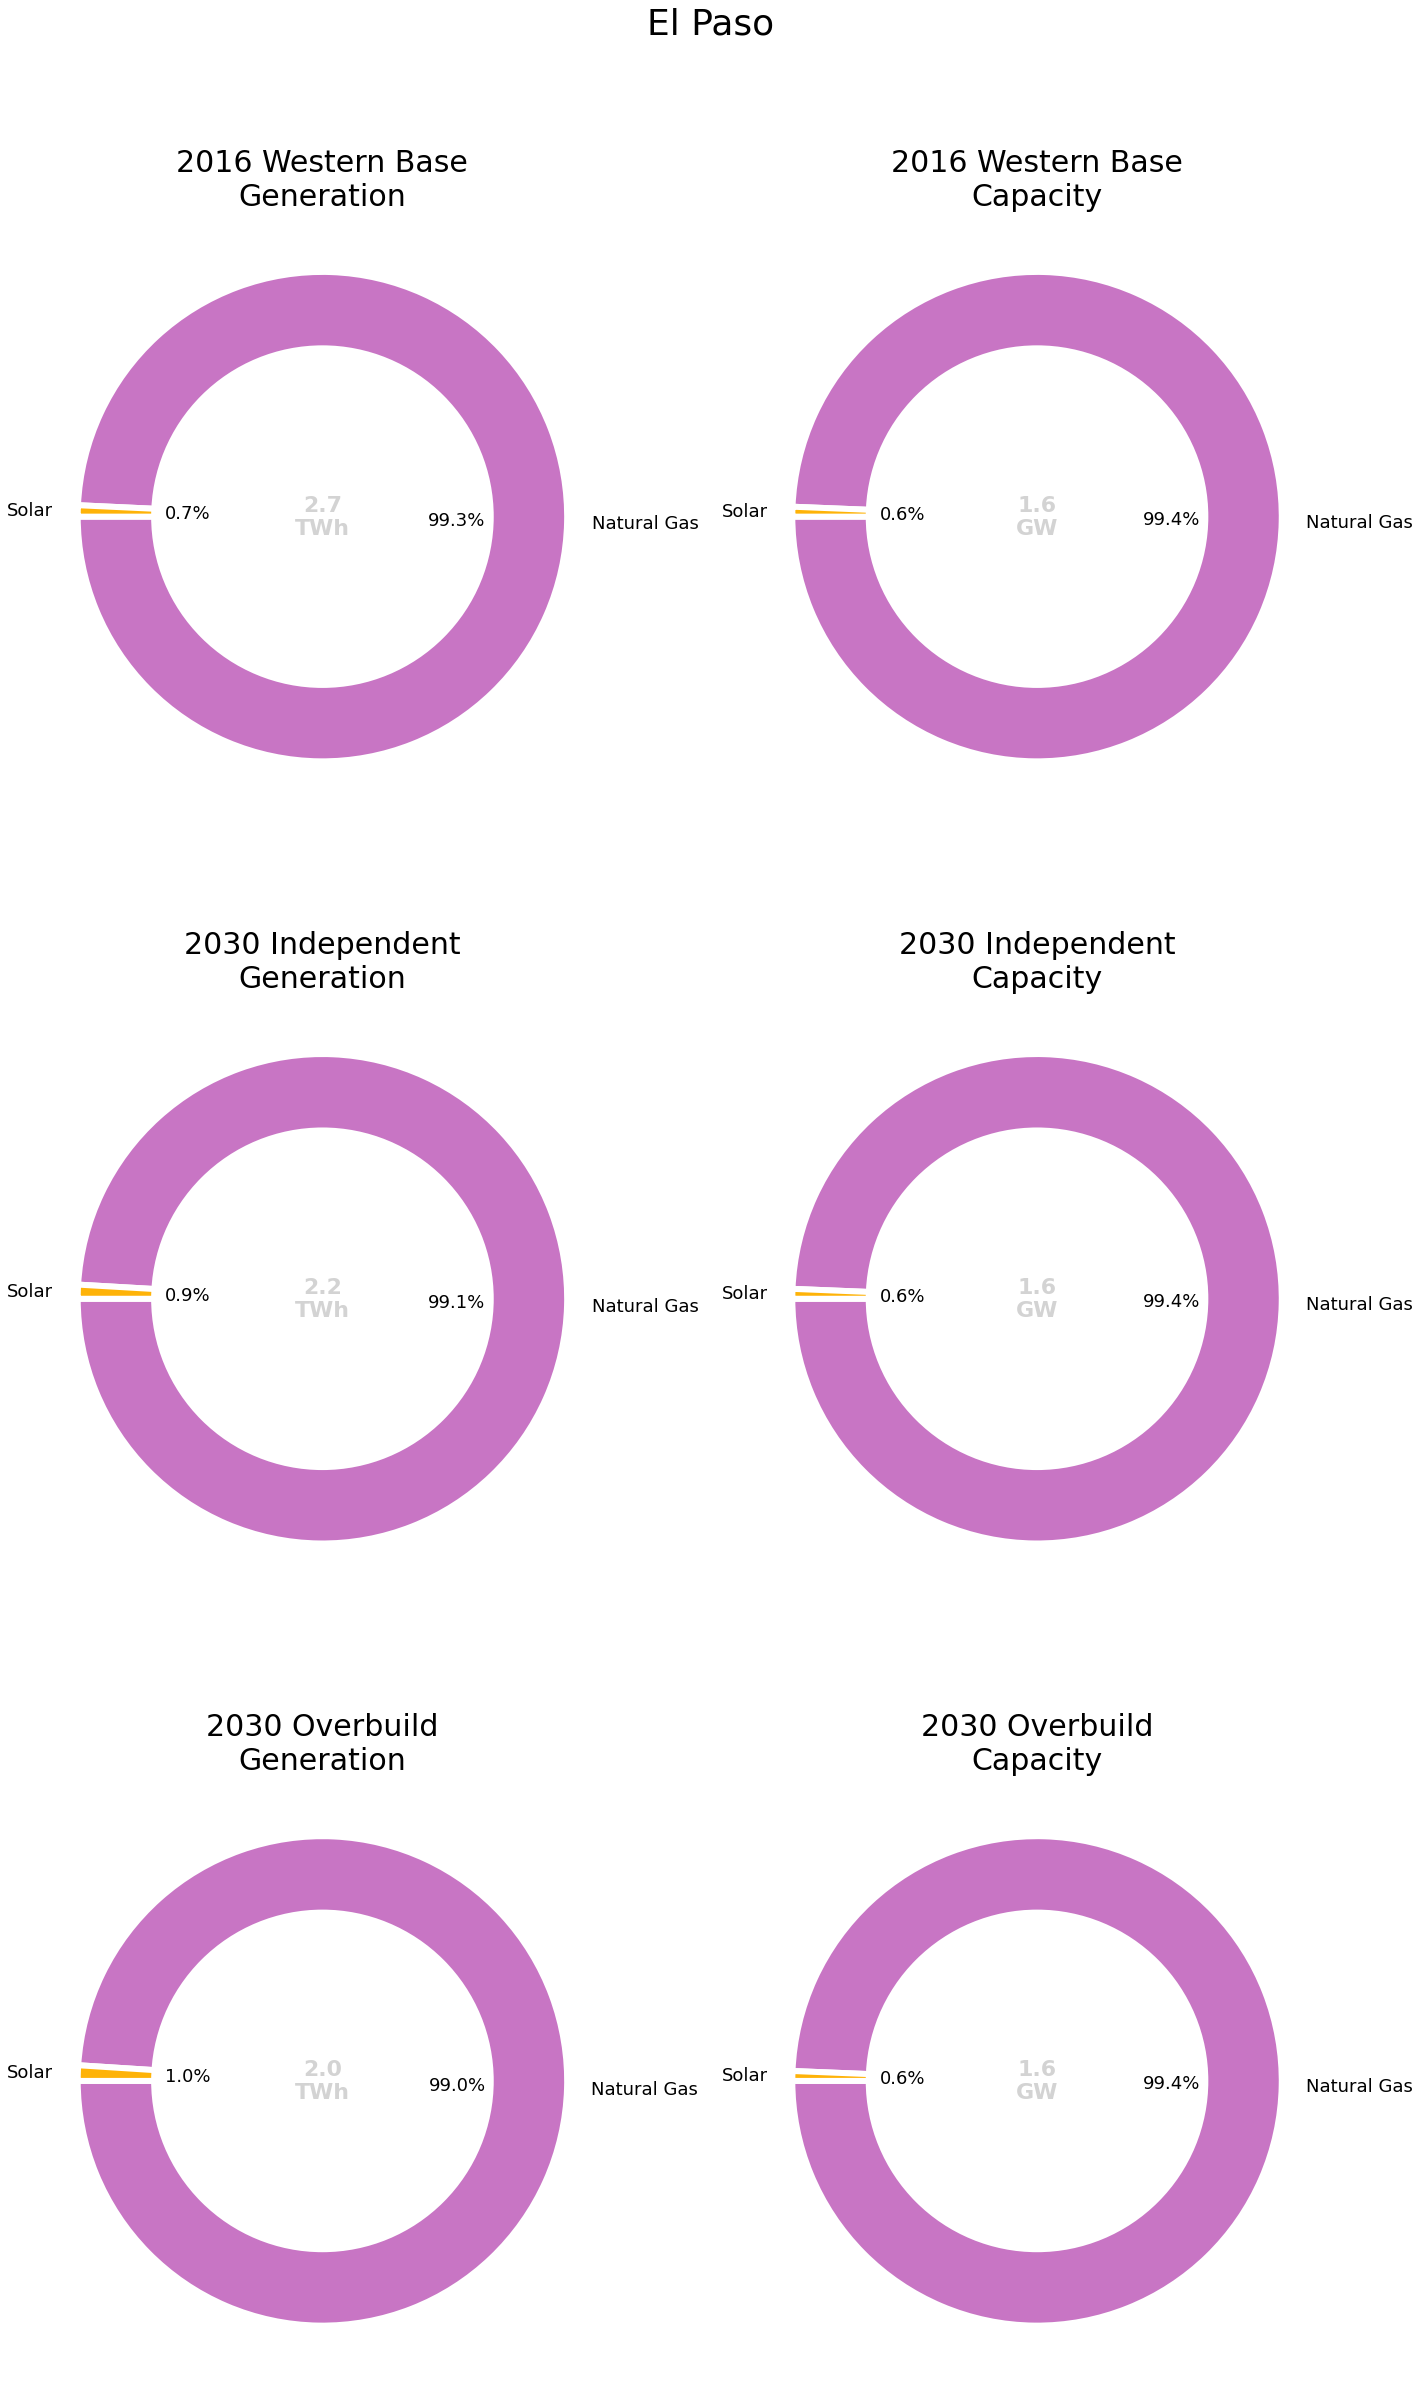

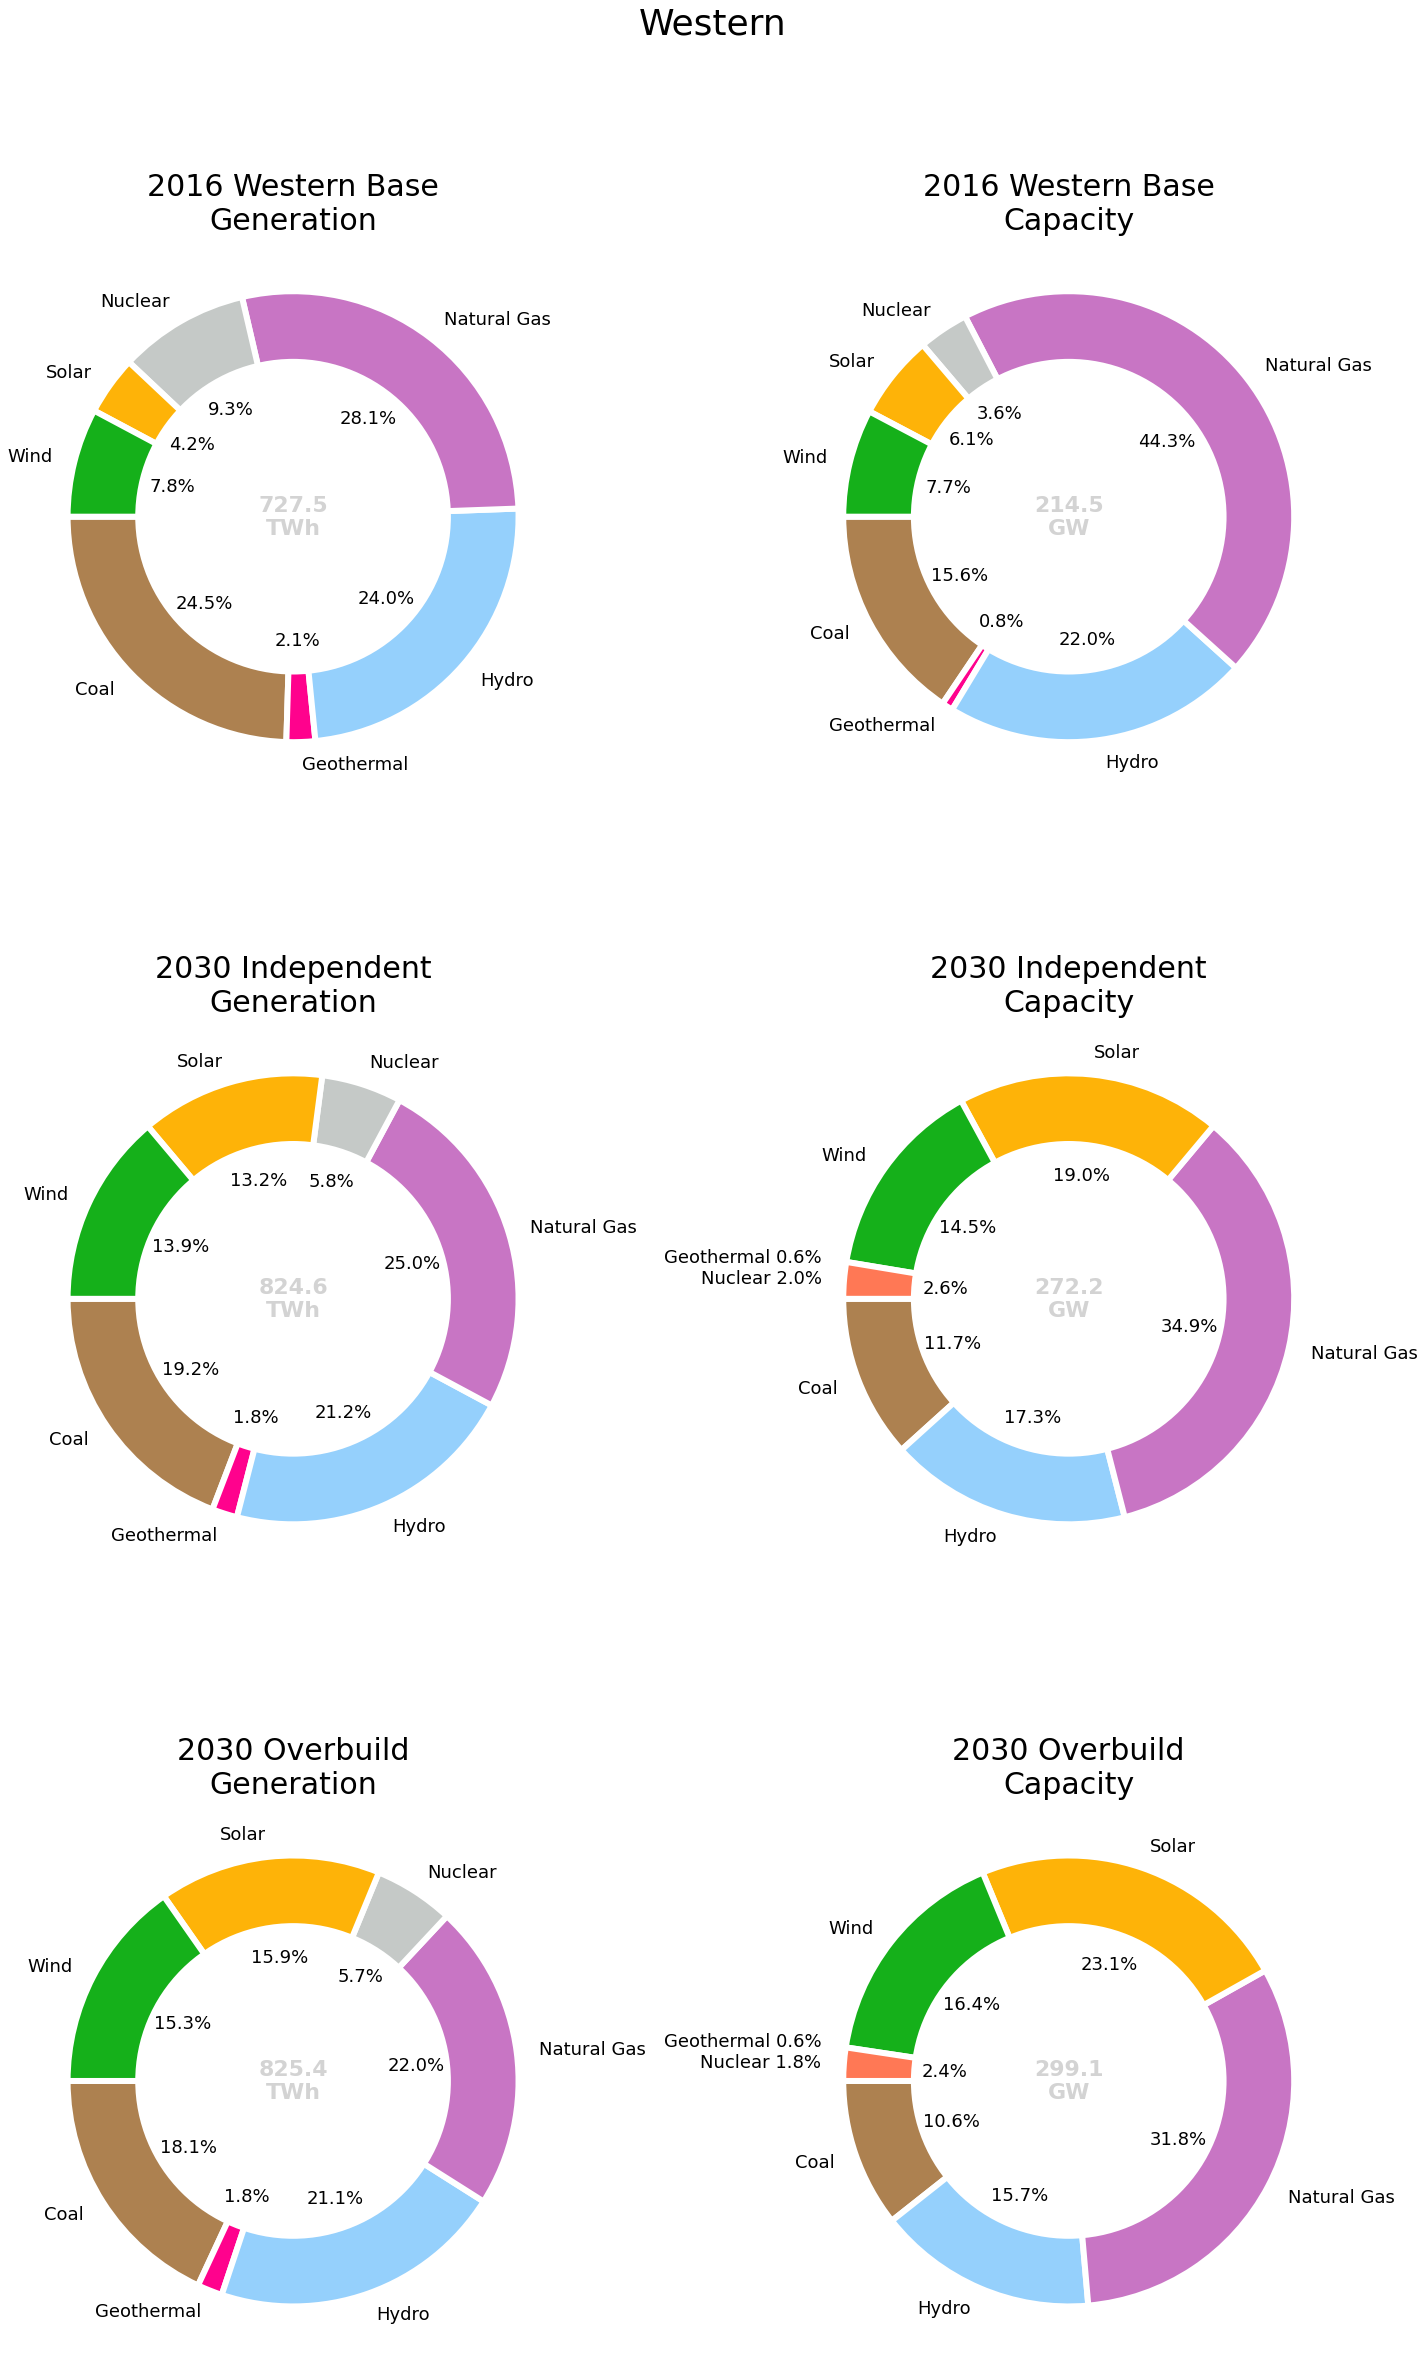

In [10]:
f = io.StringIO()
with redirect_stdout(f):
    plot_pie('Western',
             time,
             ['87', '91','103'],
             ['2016 Western Base', '2030 Independent', '2030 Overbuild'],
             min_percentage=2.5)
plt.show()

## Shortfall stacked bar plot
### Most basic plot

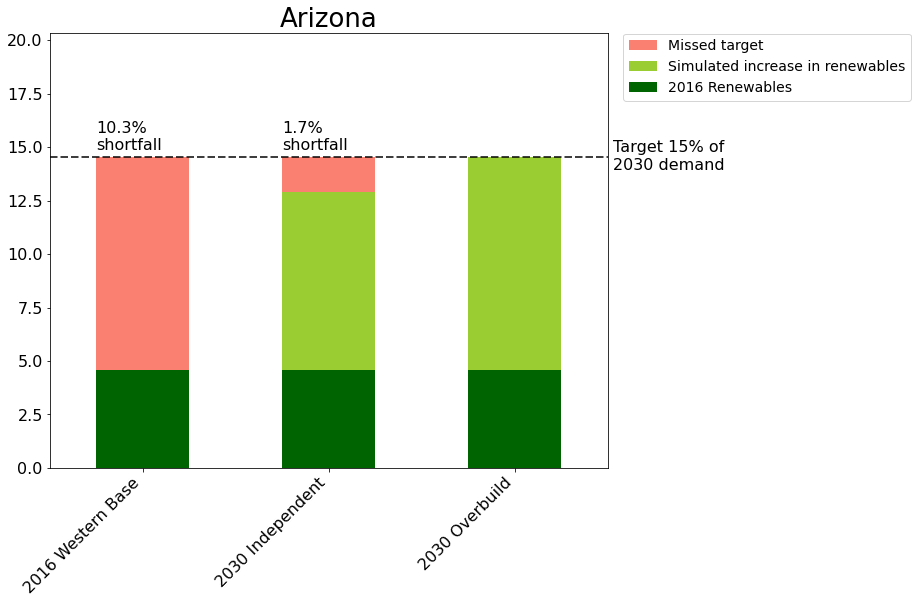

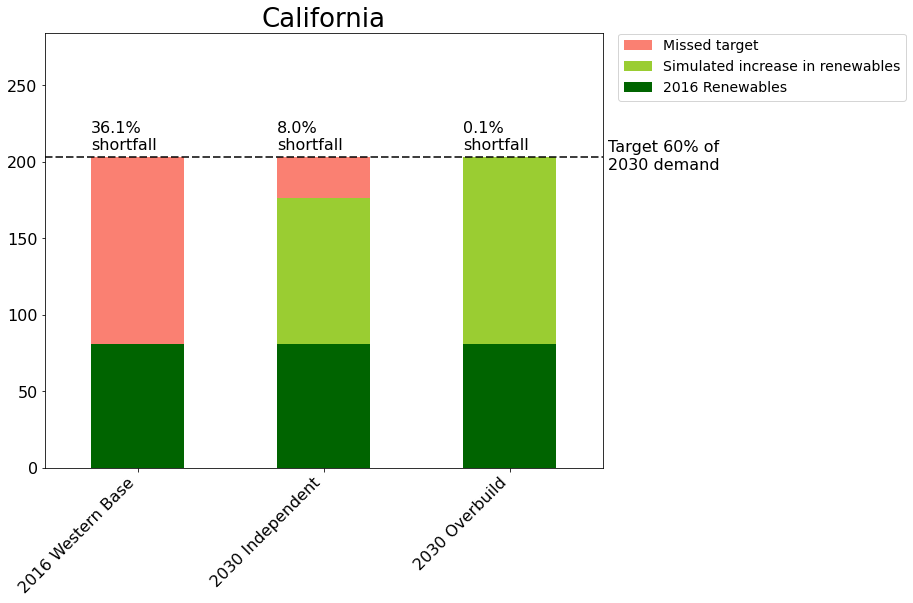

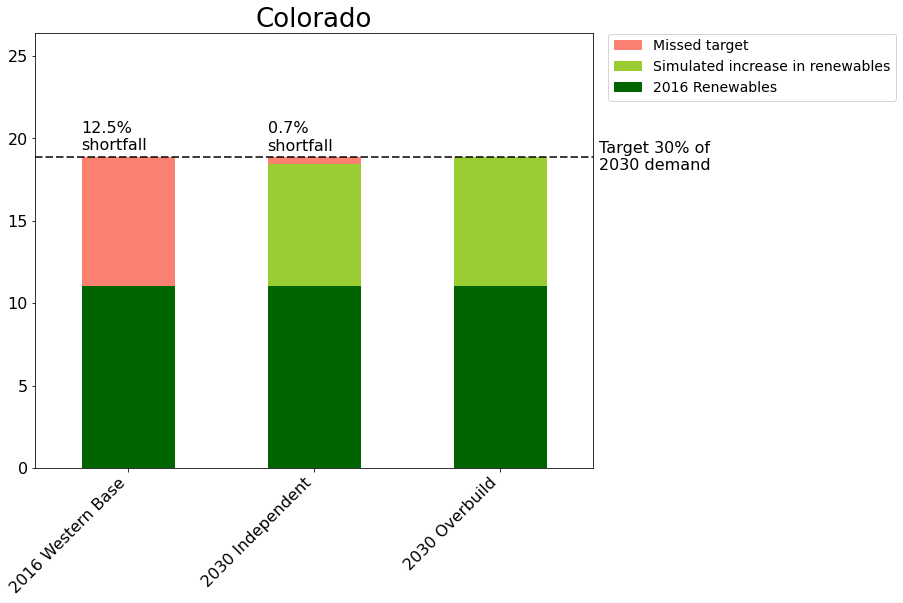

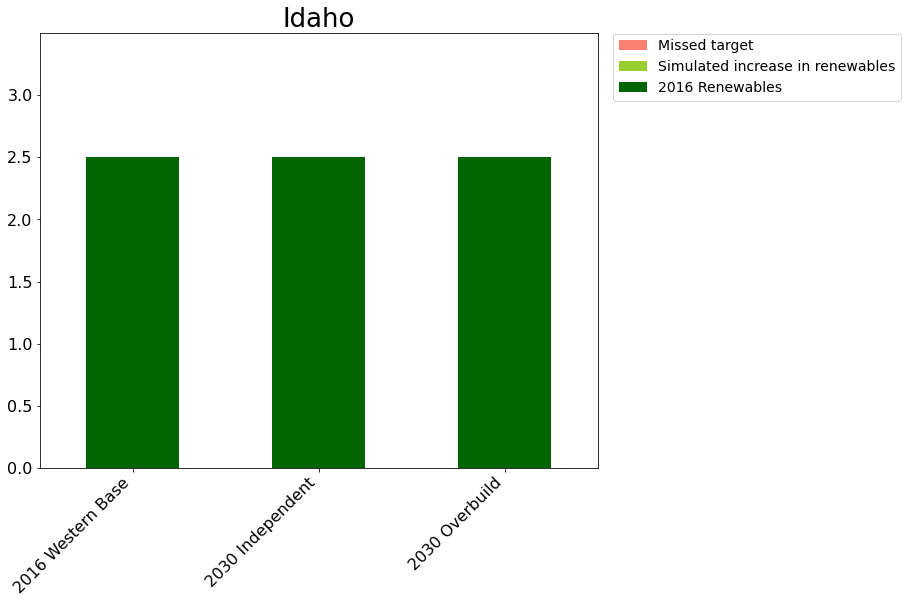

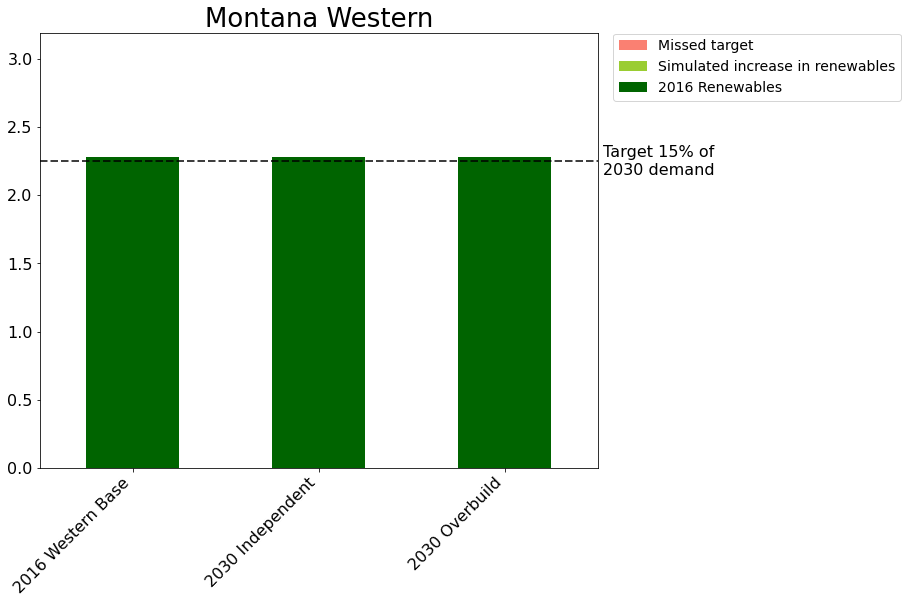

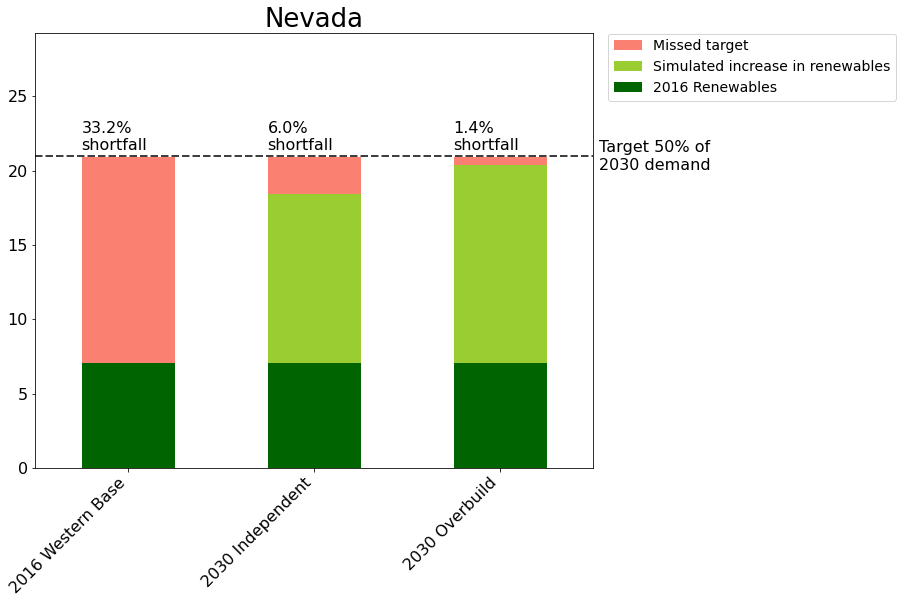

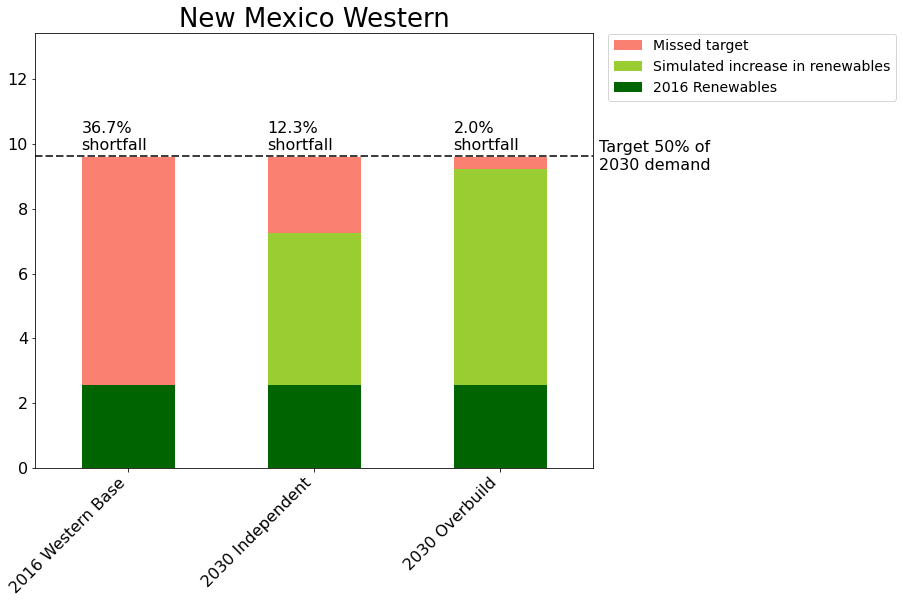

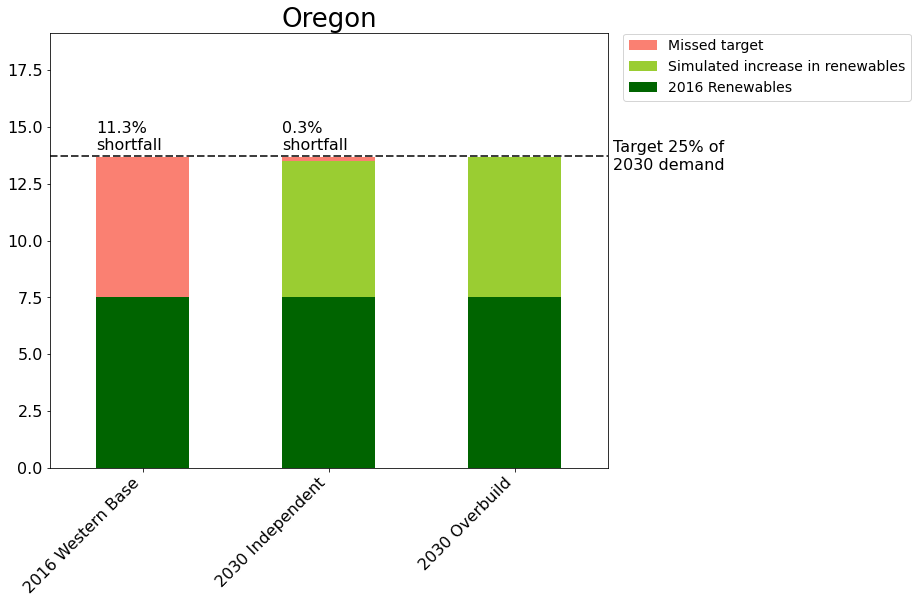

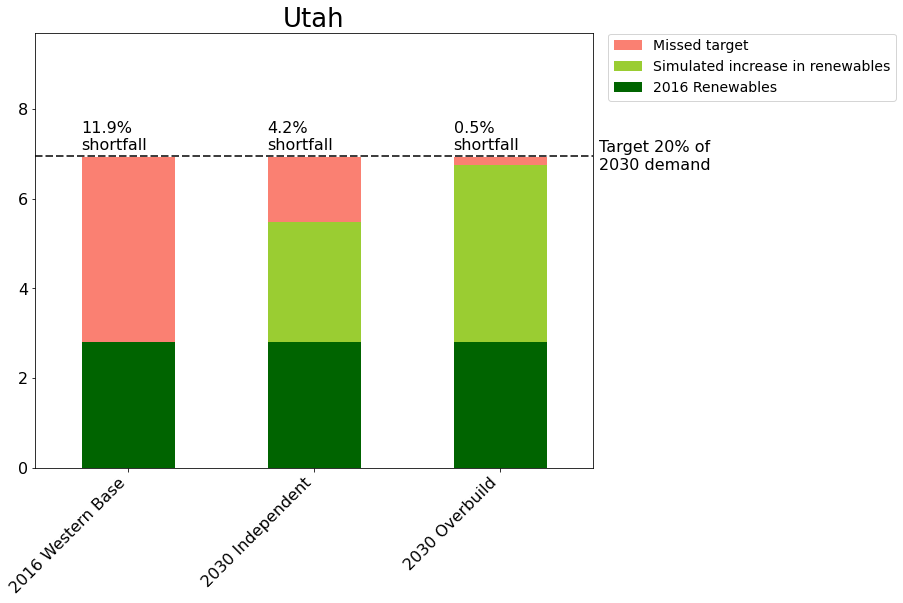

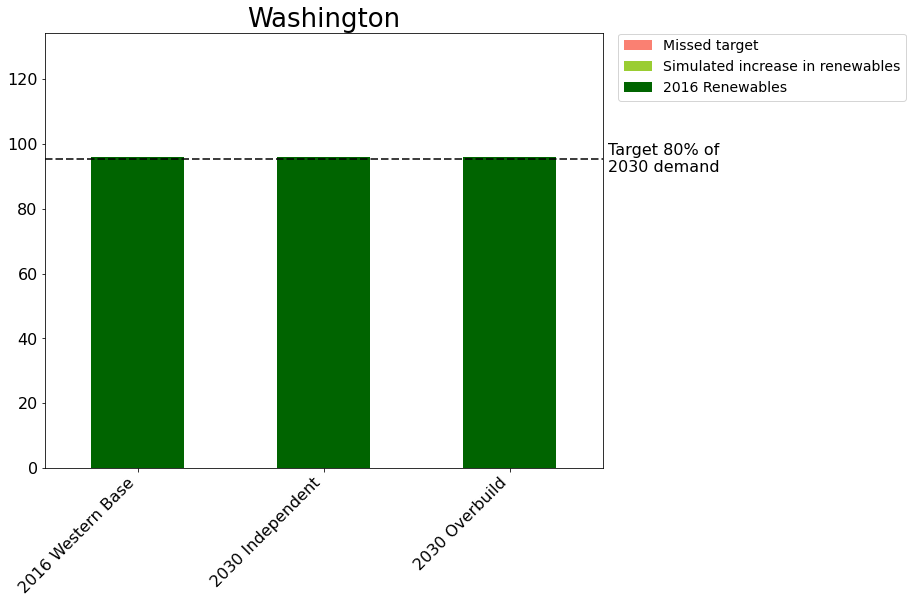

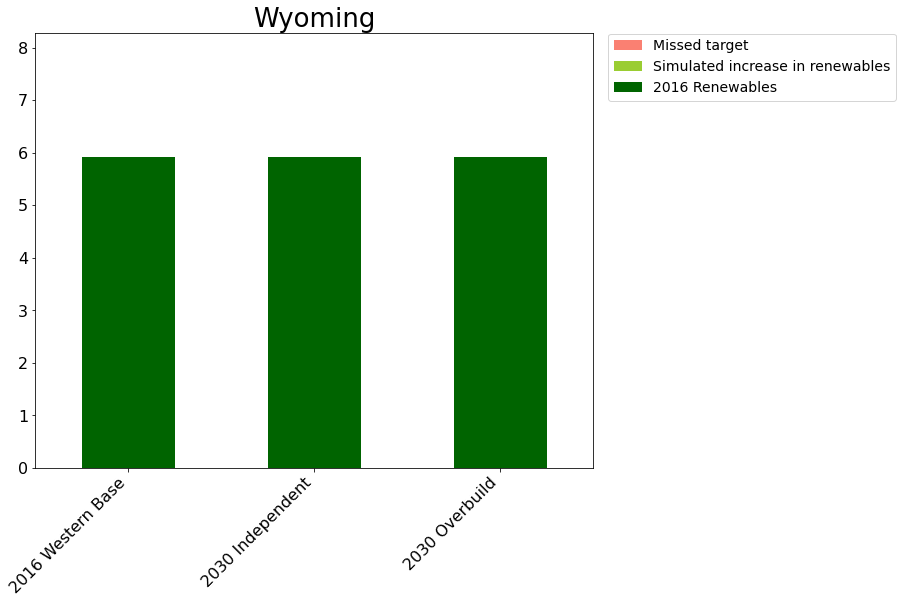

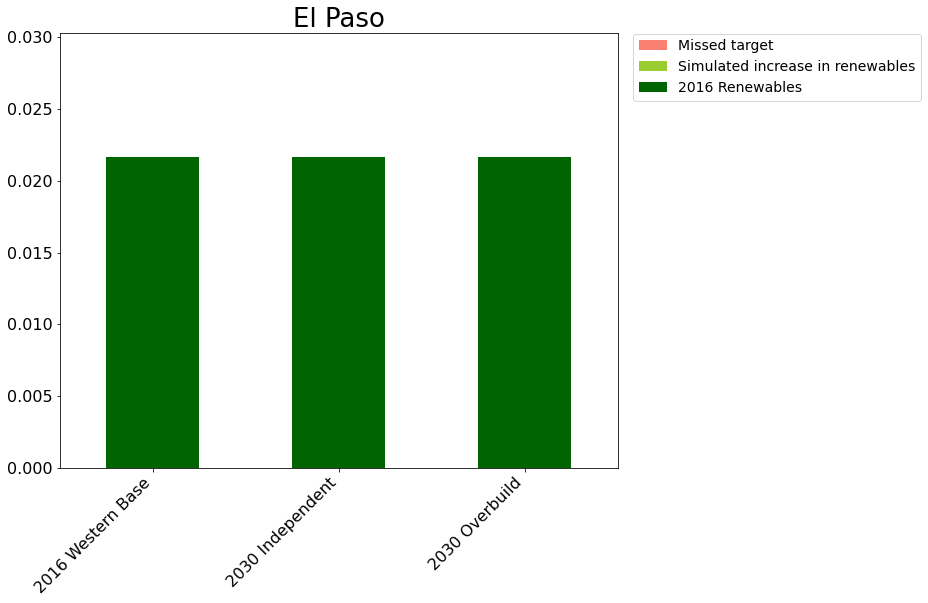

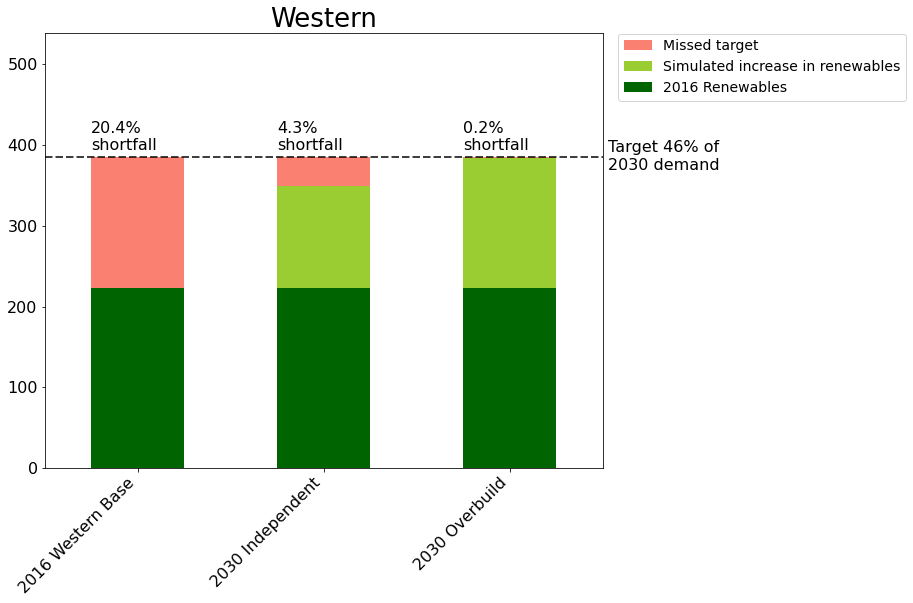

In [11]:
f = io.StringIO()
with redirect_stdout(f):
    plot_shortfall('Western',
                   time,
                   ['87', '91','103'], 
                   ['2016 Western Base', '2030 Independent', '2030 Overbuild'])
plt.show()

### Special rules
Shortfall has a couple optional parameters

`is_match_CA` (*bool*) calculates shortfall using special rules that apply when all zones match California goals. Defaults to False

`has_collaborative_scenarios` (*list*) list of scenario ids (*str*) where all zones collaborate to meet Renewable Energy goals. This affects Western since states help each other with their shortfall

You can also provide custom generation baselines, targets and demand (TWh). But most of the time you don't need to worry about that

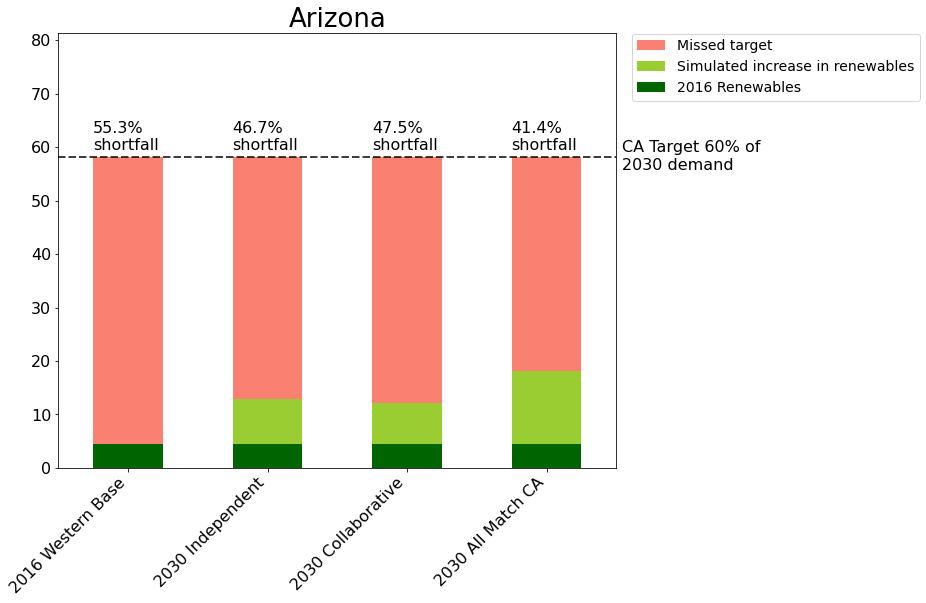

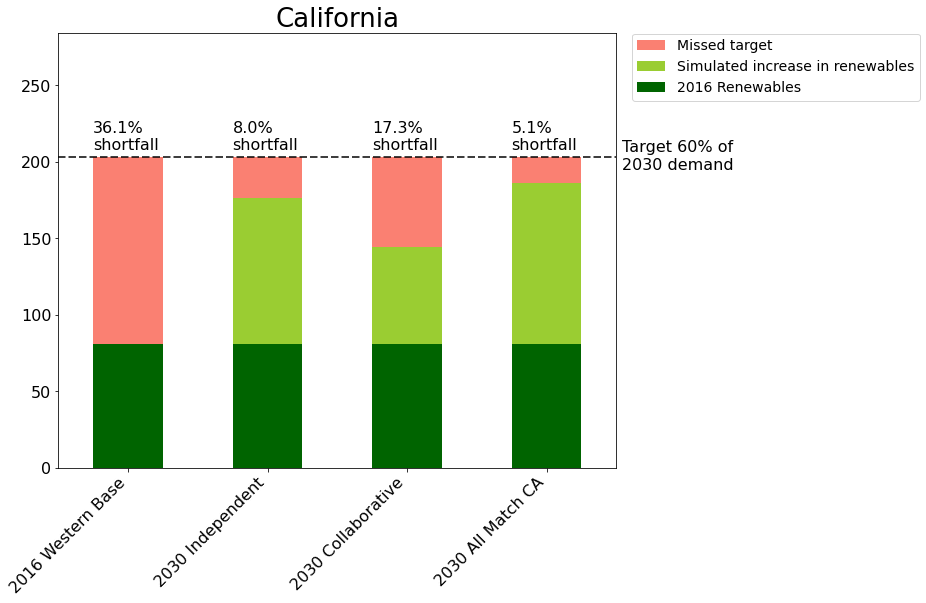

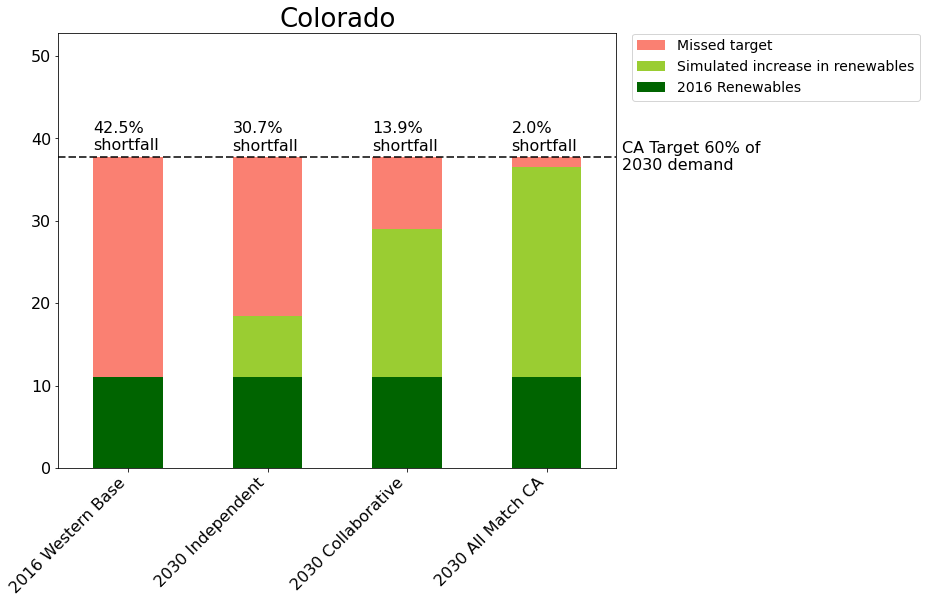

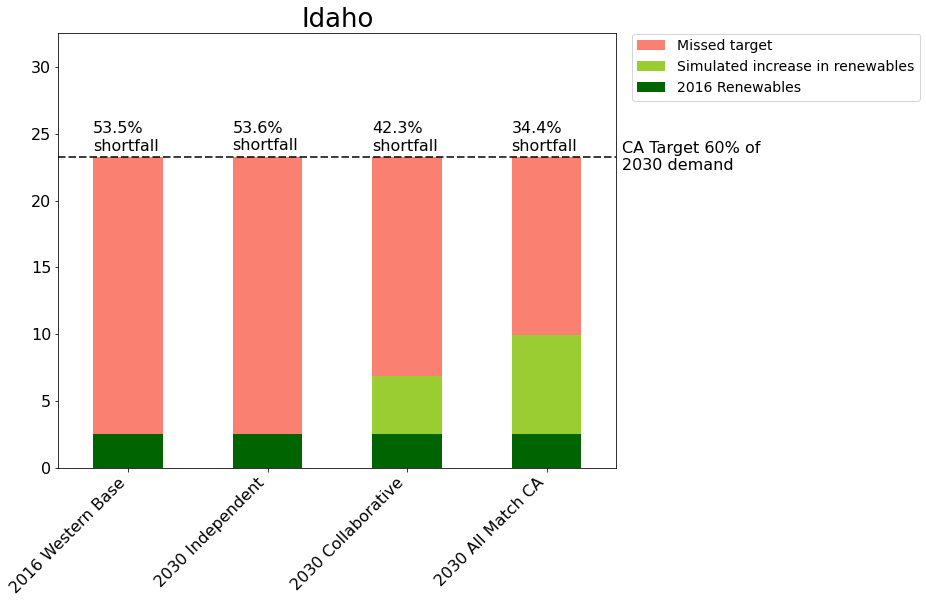

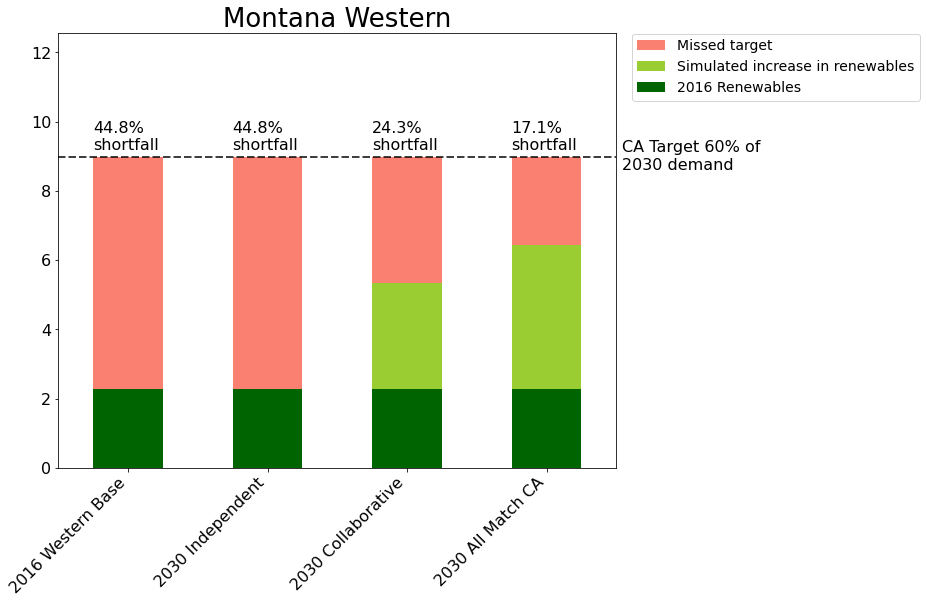

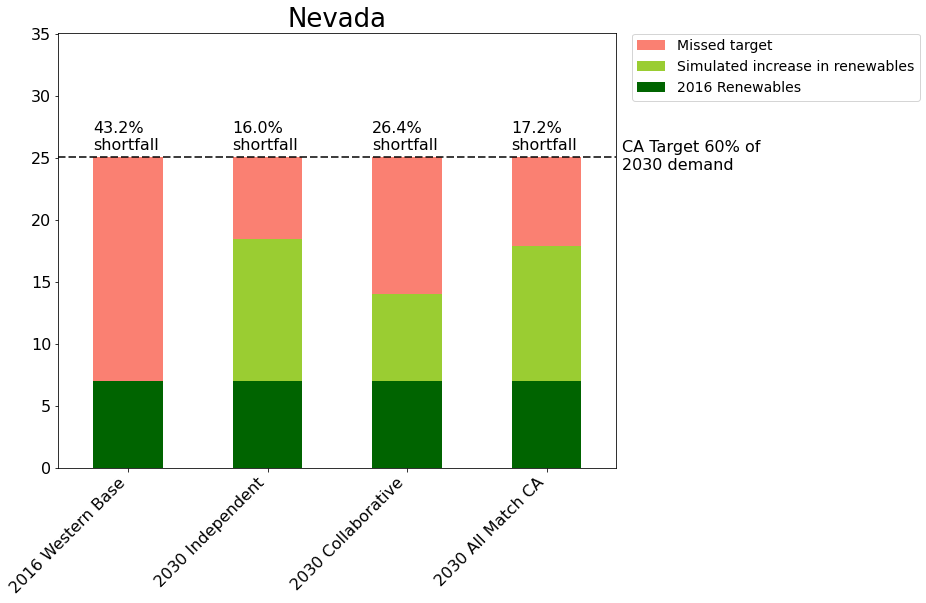

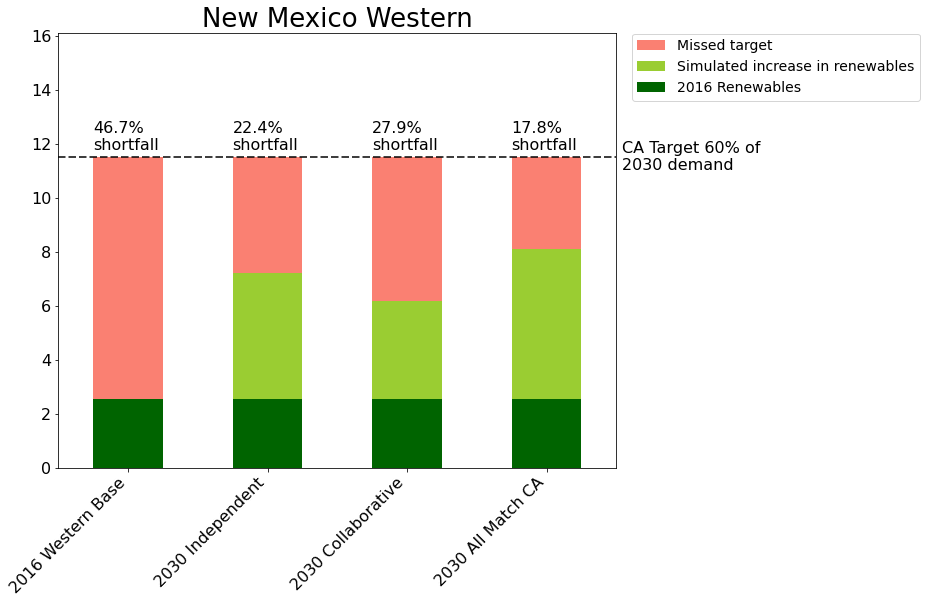

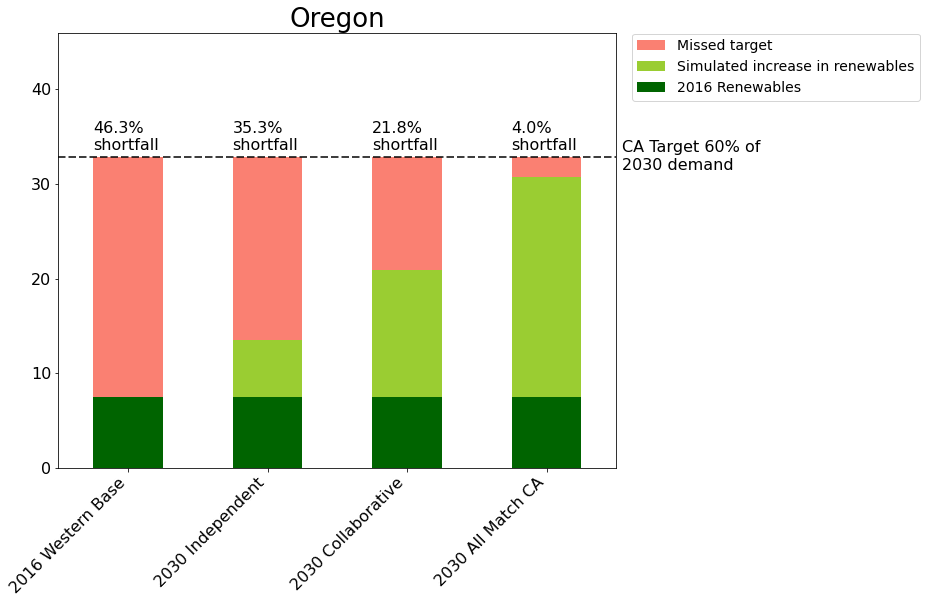

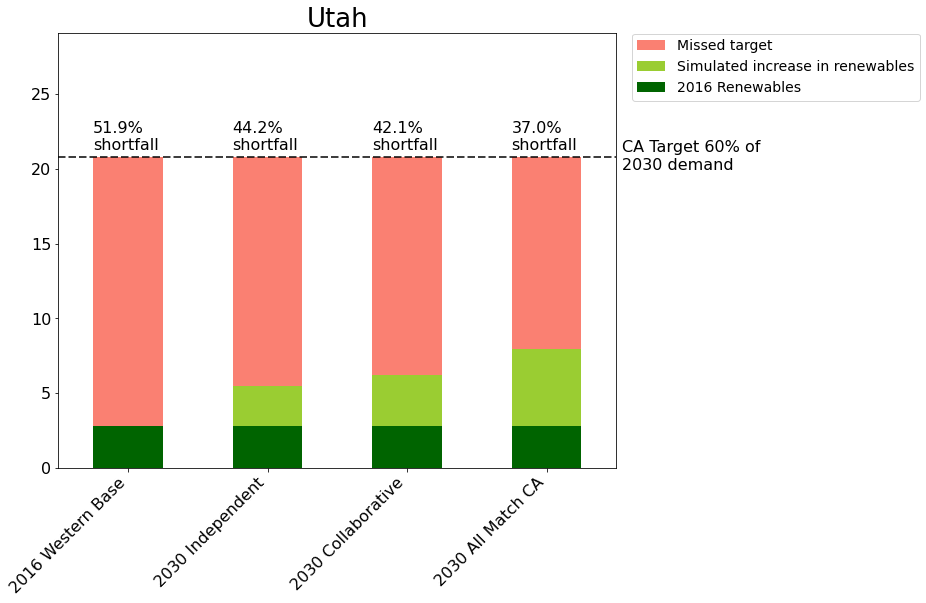

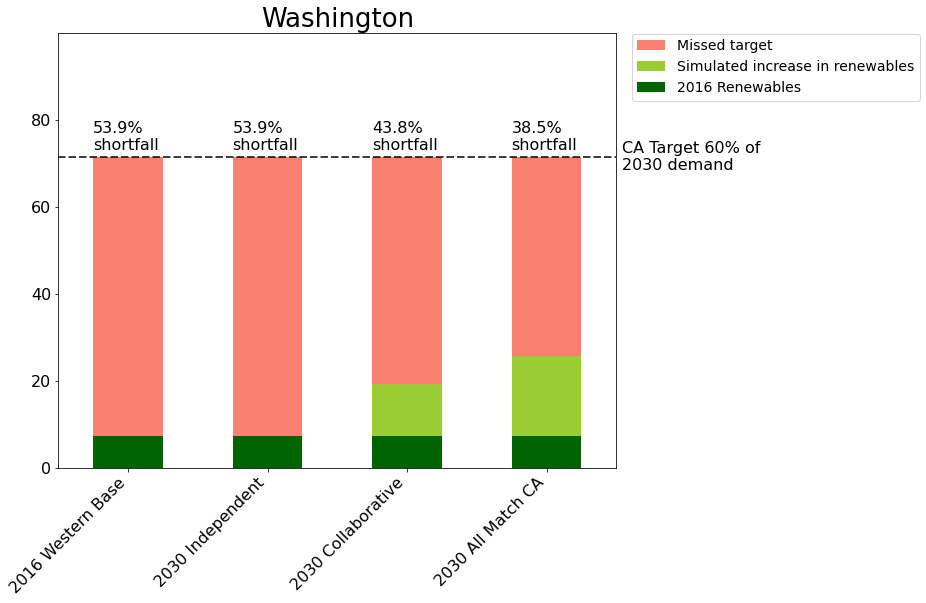

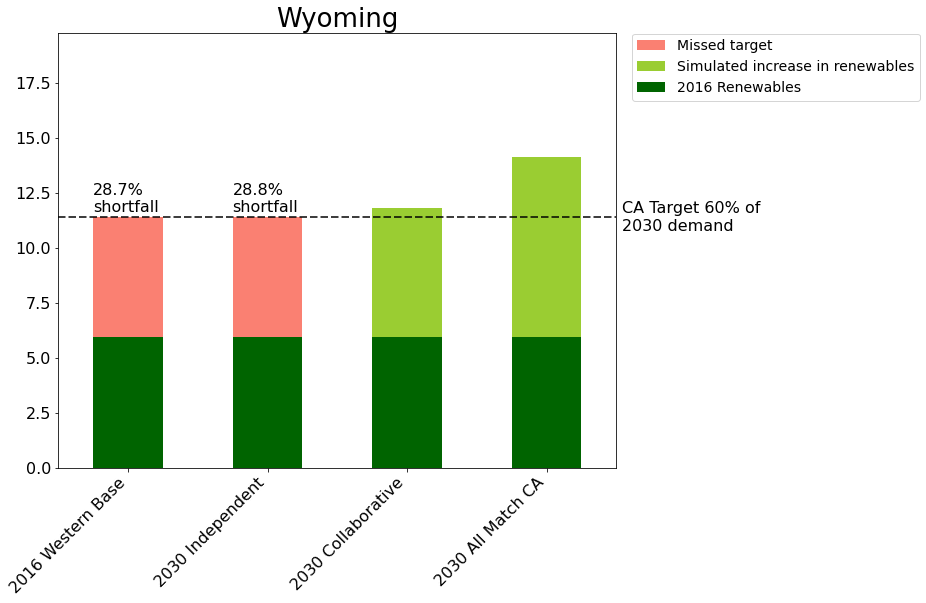

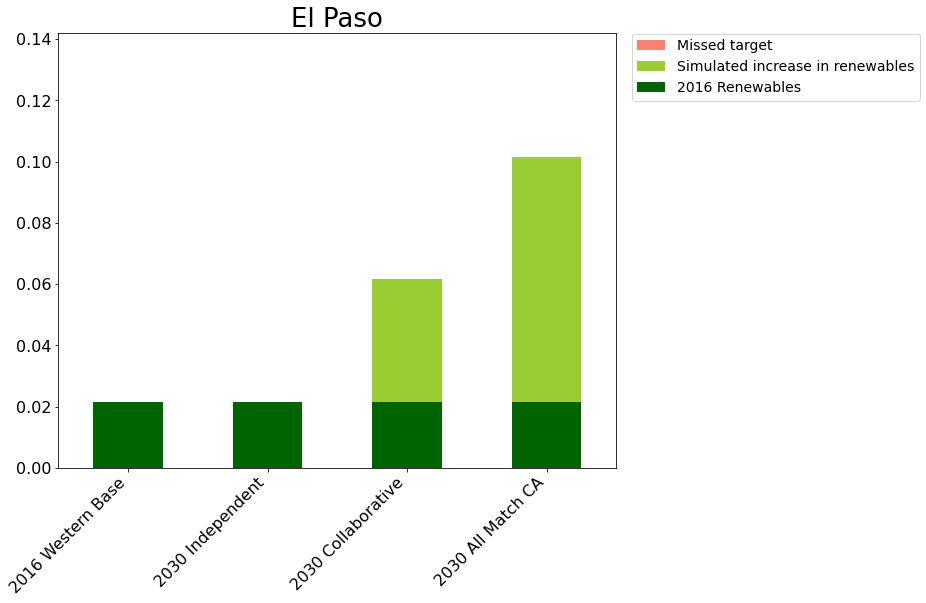

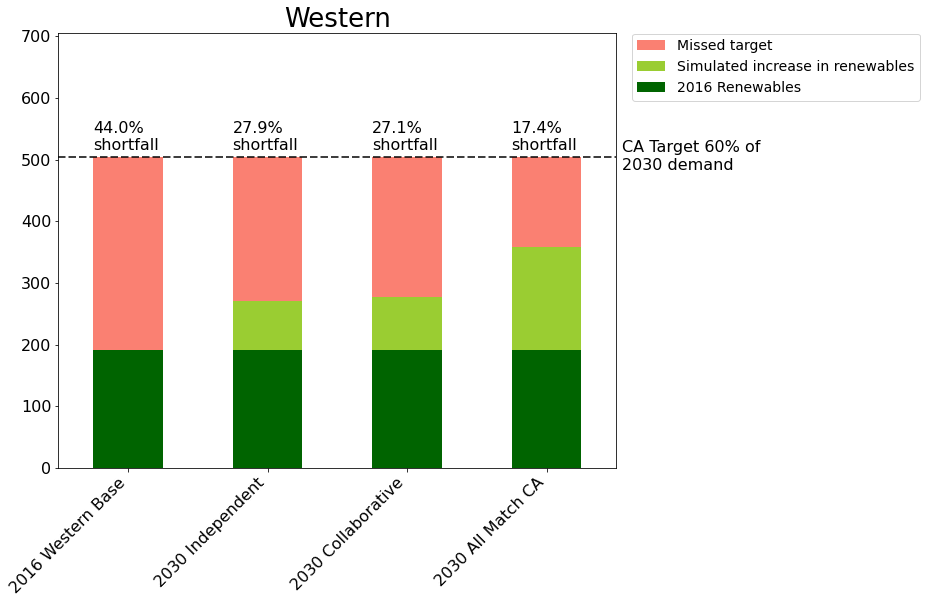

In [12]:
f = io.StringIO()
with redirect_stdout(f):
    plot_shortfall('Western',
                   time,
                   ['87', '91', '93', '89'],
                   ['2016 Western Base', '2030 Independent', '2030 Collaborative', '2030 All Match CA'],
                   is_match_CA=True,
                   has_collaborative_scenarios=['93'])
plt.show()